<a href="https://colab.research.google.com/github/akshayasuresh8/Credit-Card-Fraud-Detection/blob/main/Final_Combined_CC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Combined Anomaly Detection Methods
This notebook includes various anomaly detection methods including AutoEncoder, Isolation Forest, CBLOF, DBSCAN, GMM, Histogram-Based Outlier Detection, KMeans, LOF, OneClassSVM, PCA, and Subspace Outlier Detection.

## Methods Included:
- AutoEncoder
- Isolation Forest
- CBLOF
- DBSCAN
- GMM
- Histogram-Based Outlier Detection
- KMeans
- LOF
- OneClassSVM
- PCA
- Subspace Outlier Detection

In [ ]:
# Load dataset
import pandas as pd

# Update the file path to the correct location
data = pd.read_csv('/content/drive/MyDrive/Dataset/Numerical/creditcard.csv')
data.head()

## AutoEncoder

# Auto Encoder

## Imports

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
%config InlineBackend.figure_format = 'retina'
sns.set()

import tensorflow
from tensorflow.keras.layers import Dense,LSTM
from tensorflow.keras.models import Model
from tensorflow.keras import models,layers,activations,losses,optimizers,metrics
from tensorflow.keras.callbacks import EarlyStopping

## Load dataset

In [ ]:
df.columns.values

array(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9',
       'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18',
       'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27',
       'V28', 'Amount', 'Class'], dtype=object)

In [ ]:
df.shape

(284807, 31)

## Analysis

In [ ]:
print("Distribuition of Normal(0) and Frauds(1): ")
count_classes = pd.value_counts(df['Class'], sort=True)
count_classes

Distribuition of Normal(0) and Frauds(1): 


Class
0    284315
1       492
Name: count, dtype: int64

Text(0, 0.5, 'Fraquency')

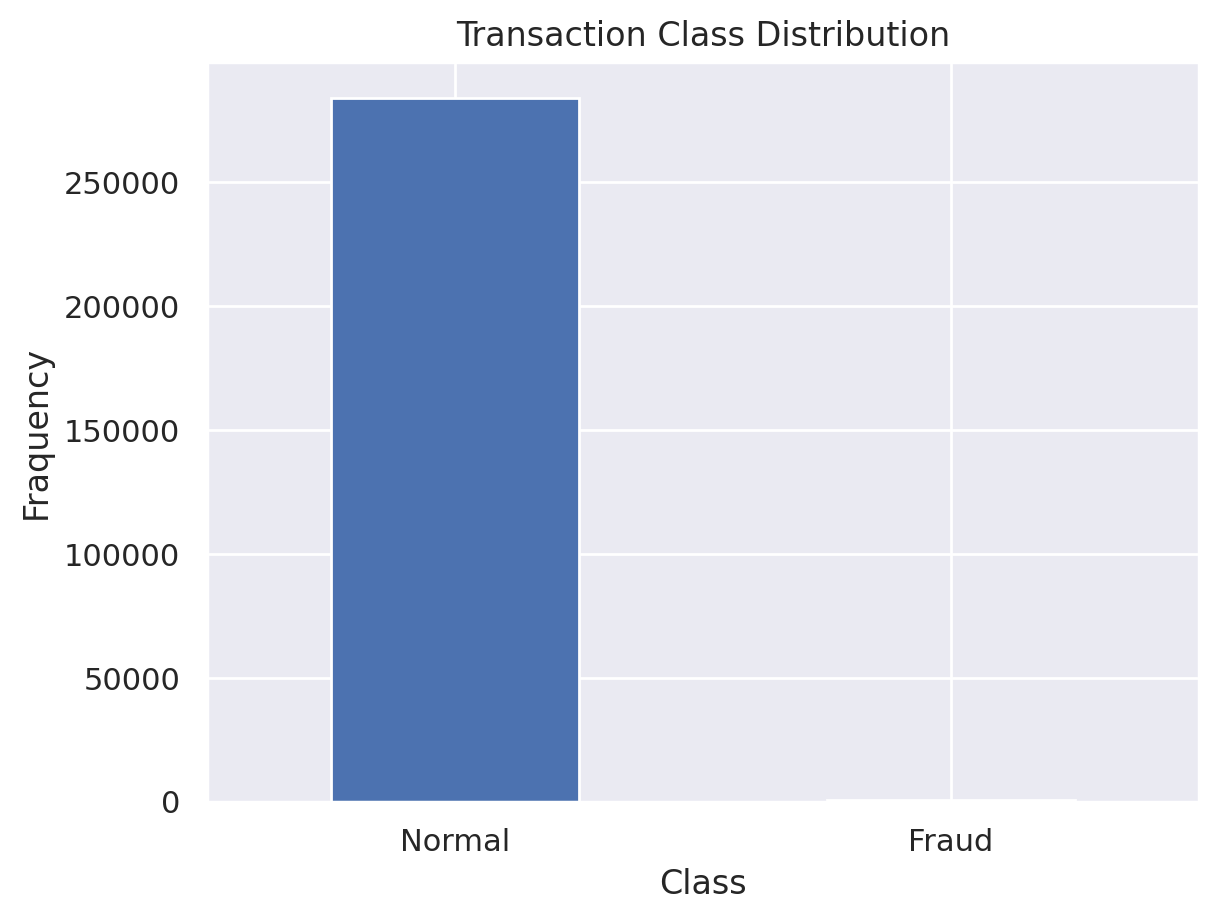

In [ ]:
LABELS = ["Normal", "Fraud"]

count_classes.plot(kind="bar", rot=0)
plt.title("Transaction Class Distribution")
# Set labels on x-axis
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Fraquency")

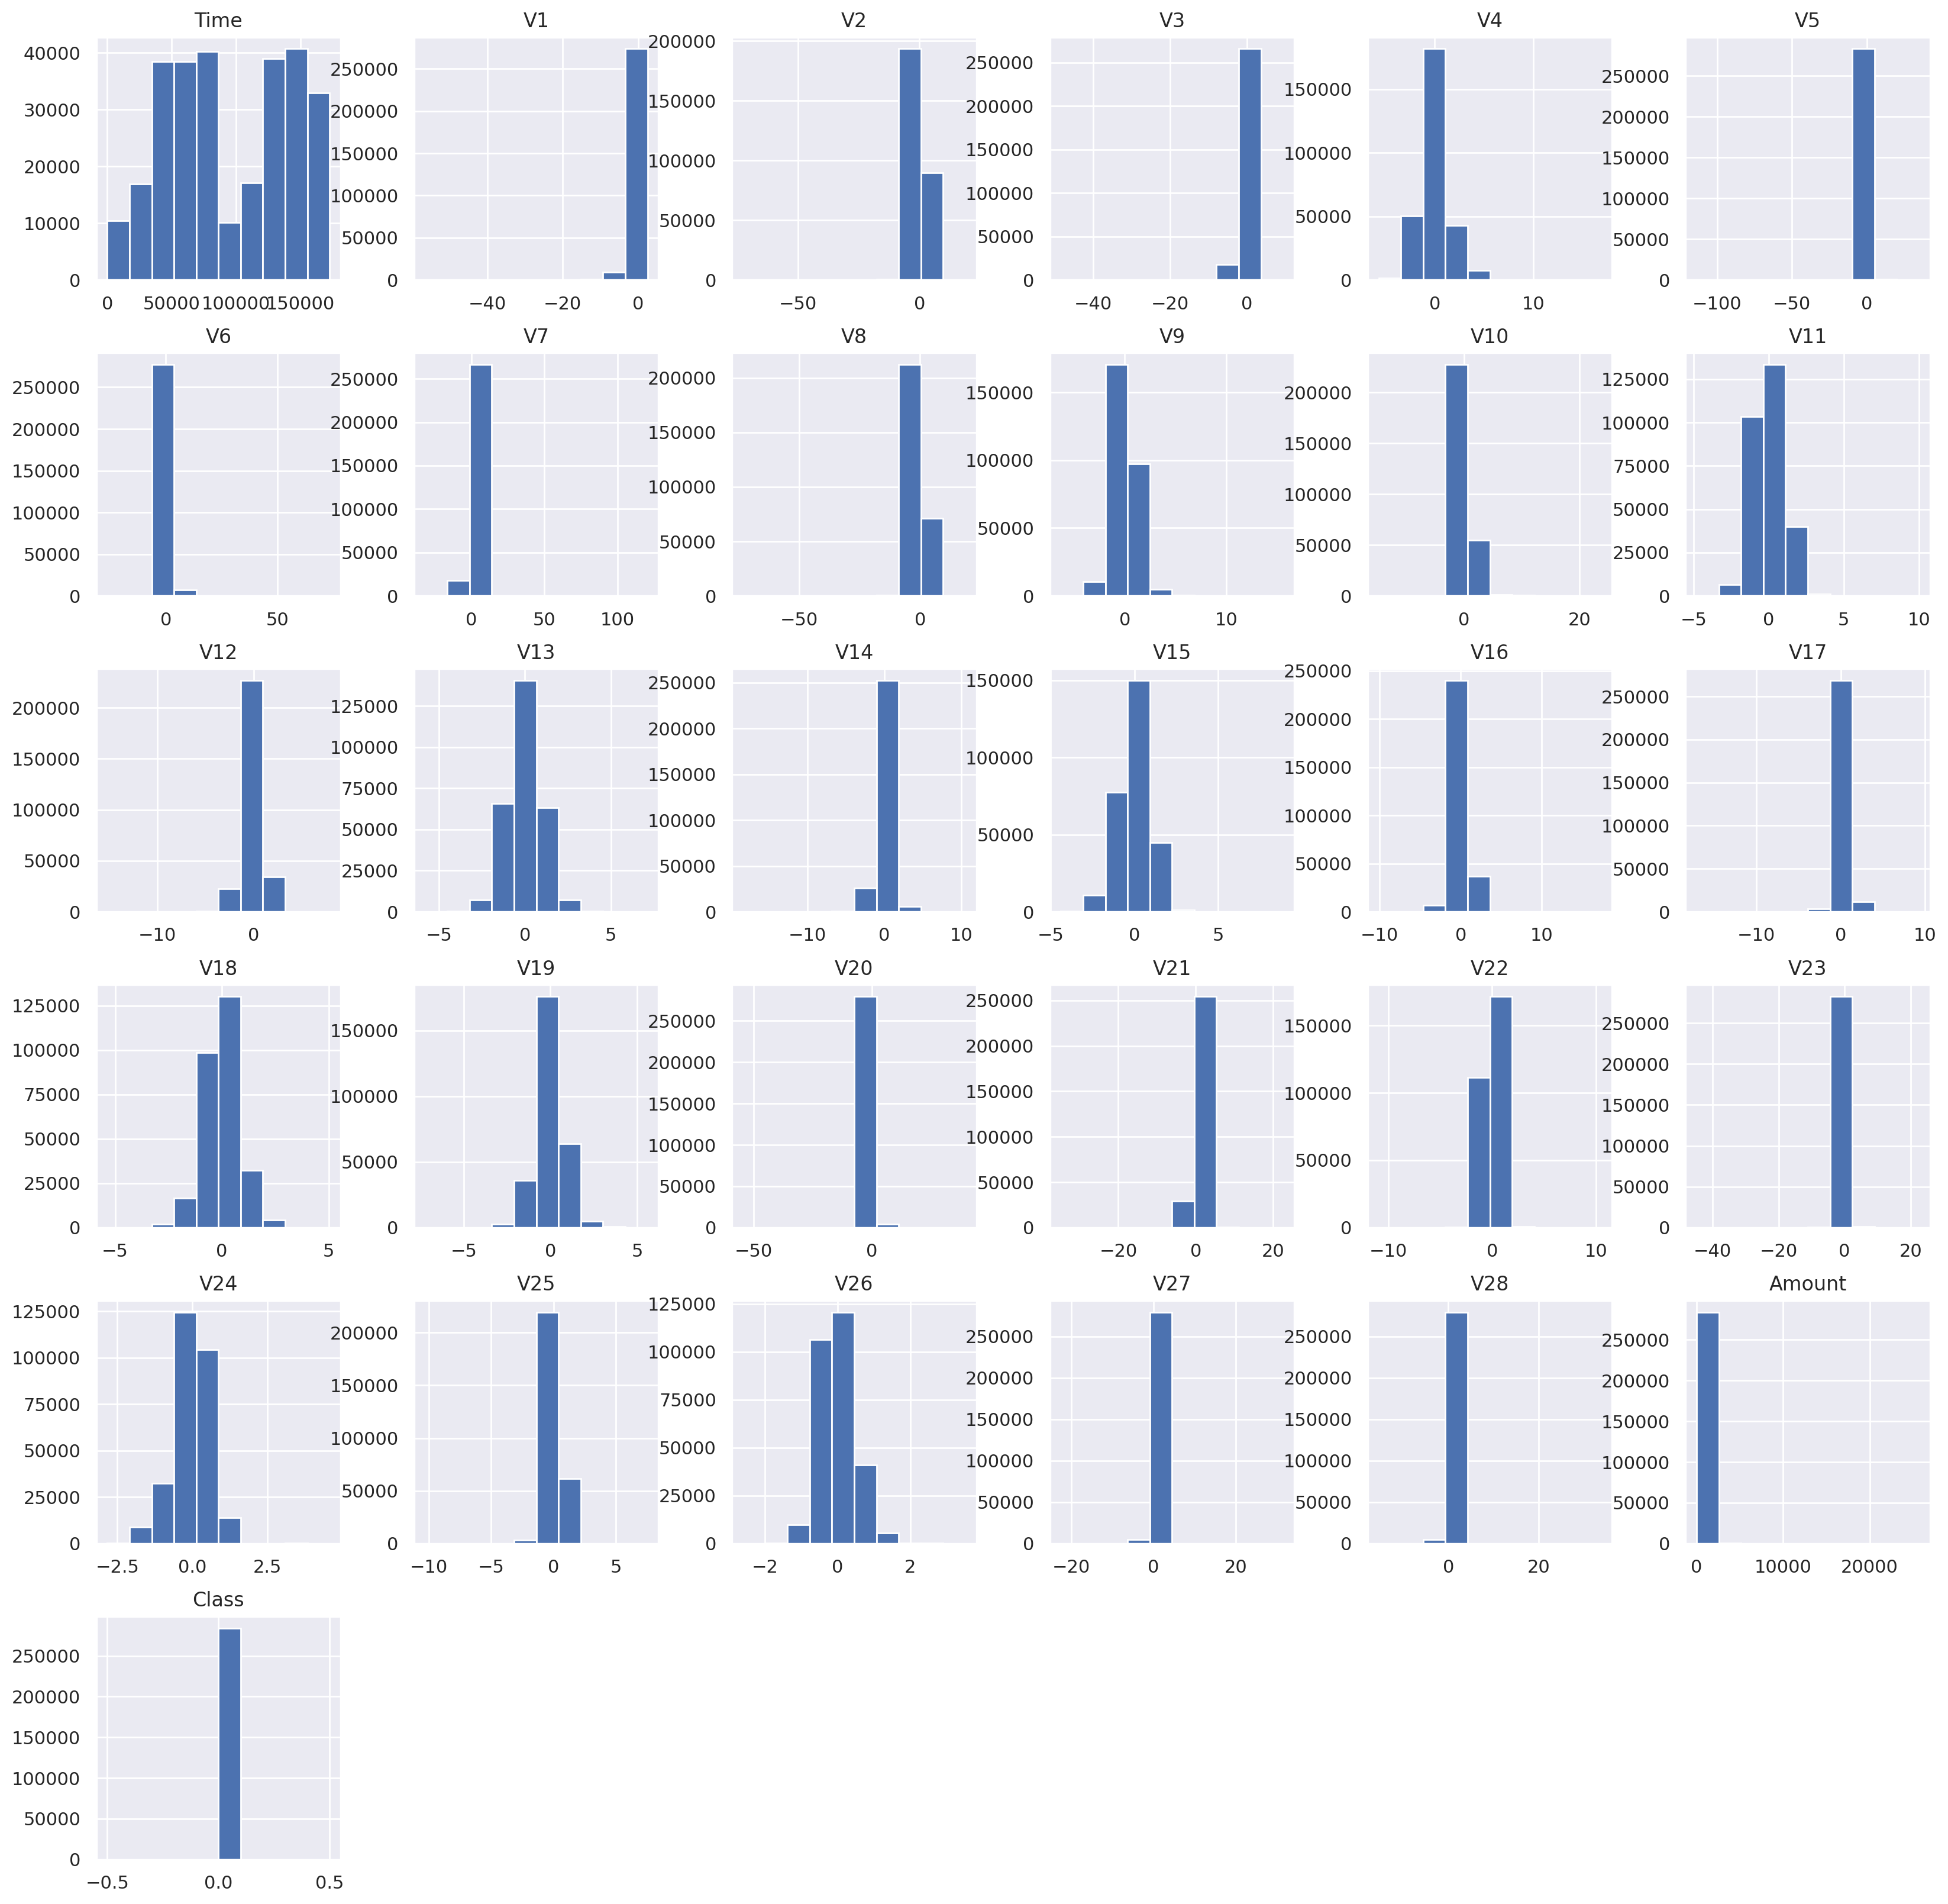

In [ ]:
### Normal transaction
df[df.Class == 0].hist(figsize = (20,20))
plt.show()

here time is given in the seconds so we need to change that in minute and hour, and then we will do some feature selection

In [ ]:
timedelta = pd.to_timedelta(df['Time'], unit='s')
df['Time_min'] = (timedelta.dt.components.minutes).astype(int)
df['Time_hour'] = (timedelta.dt.components.hours).astype(int)

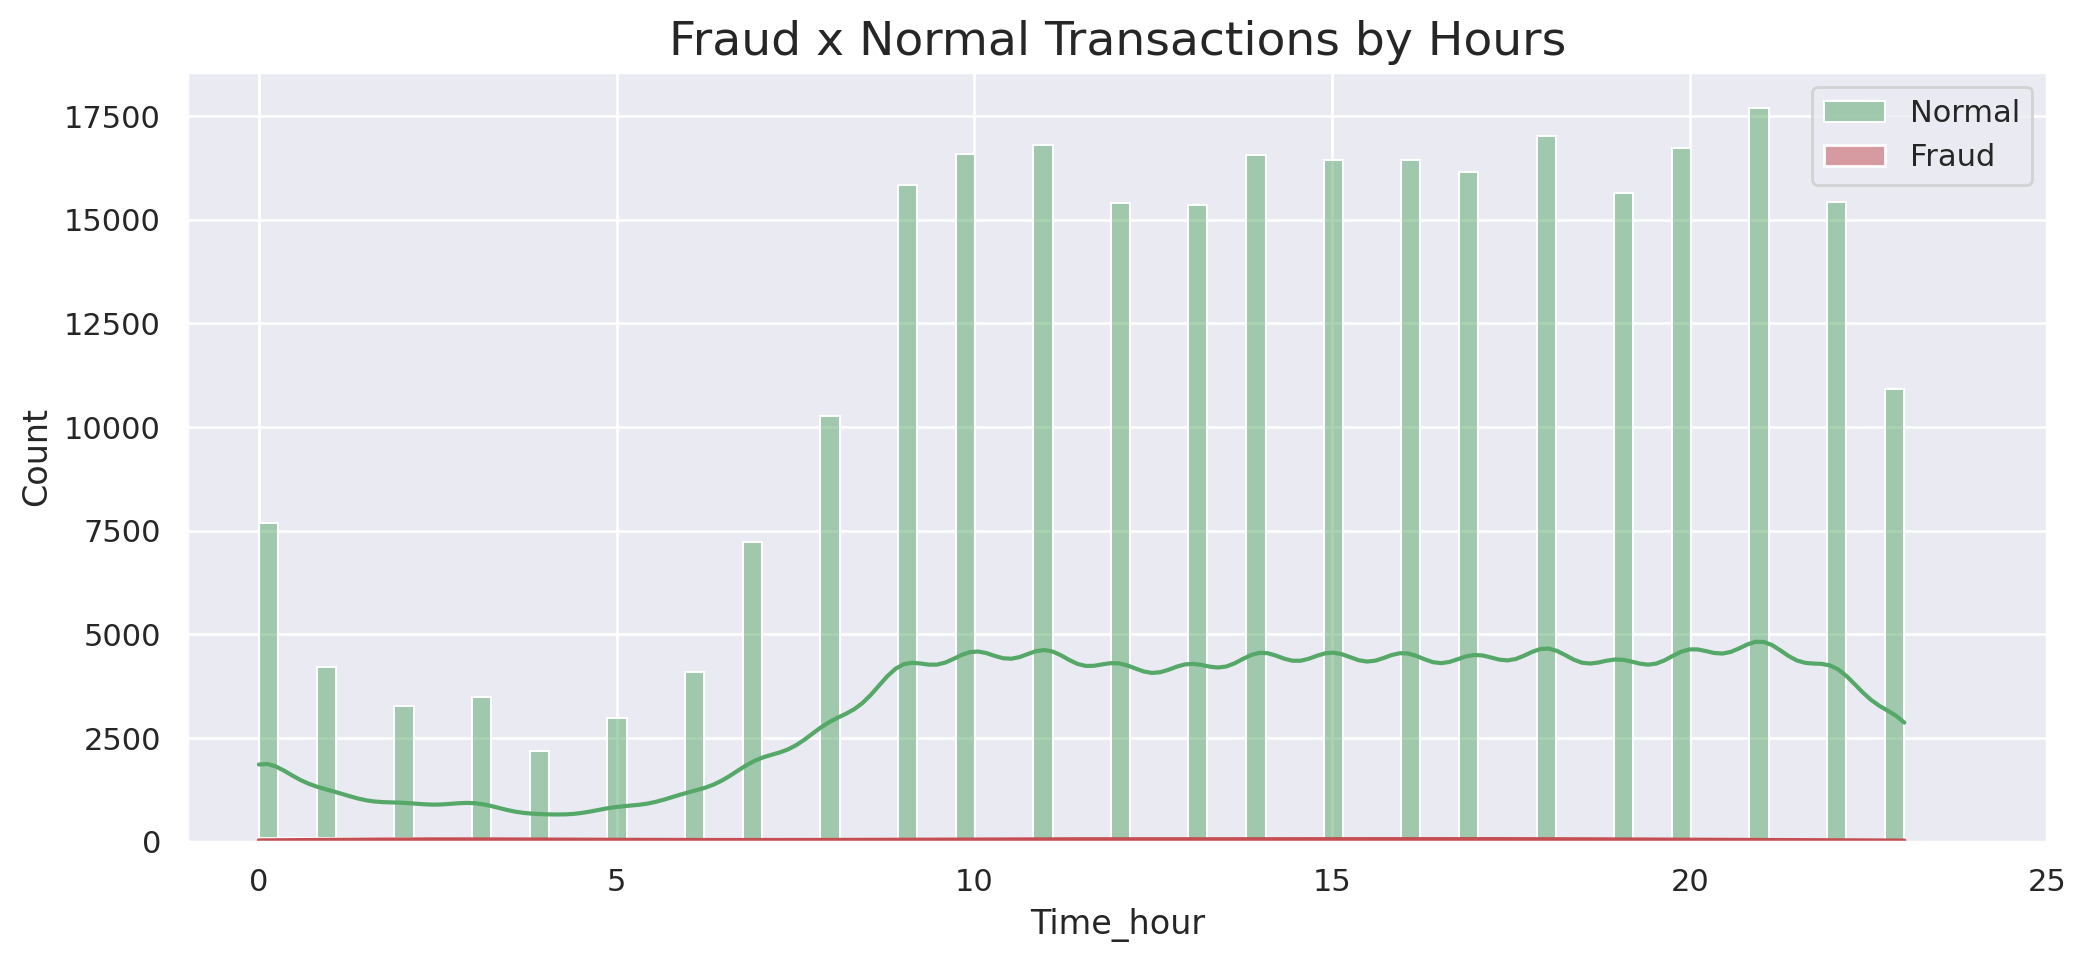

In [ ]:
plt.figure(figsize=(12, 5))
sns.histplot(df[df['Class'] == 0]["Time_hour"],  color='g', kde=True, label='Normal')
sns.histplot(df[df['Class'] == 1]["Time_hour"], color='r', kde=True, label='Fraud')
plt.title('Fraud x Normal Transactions by Hours', fontsize=17)
plt.xlim([-1, 25])
plt.legend()
plt.show()

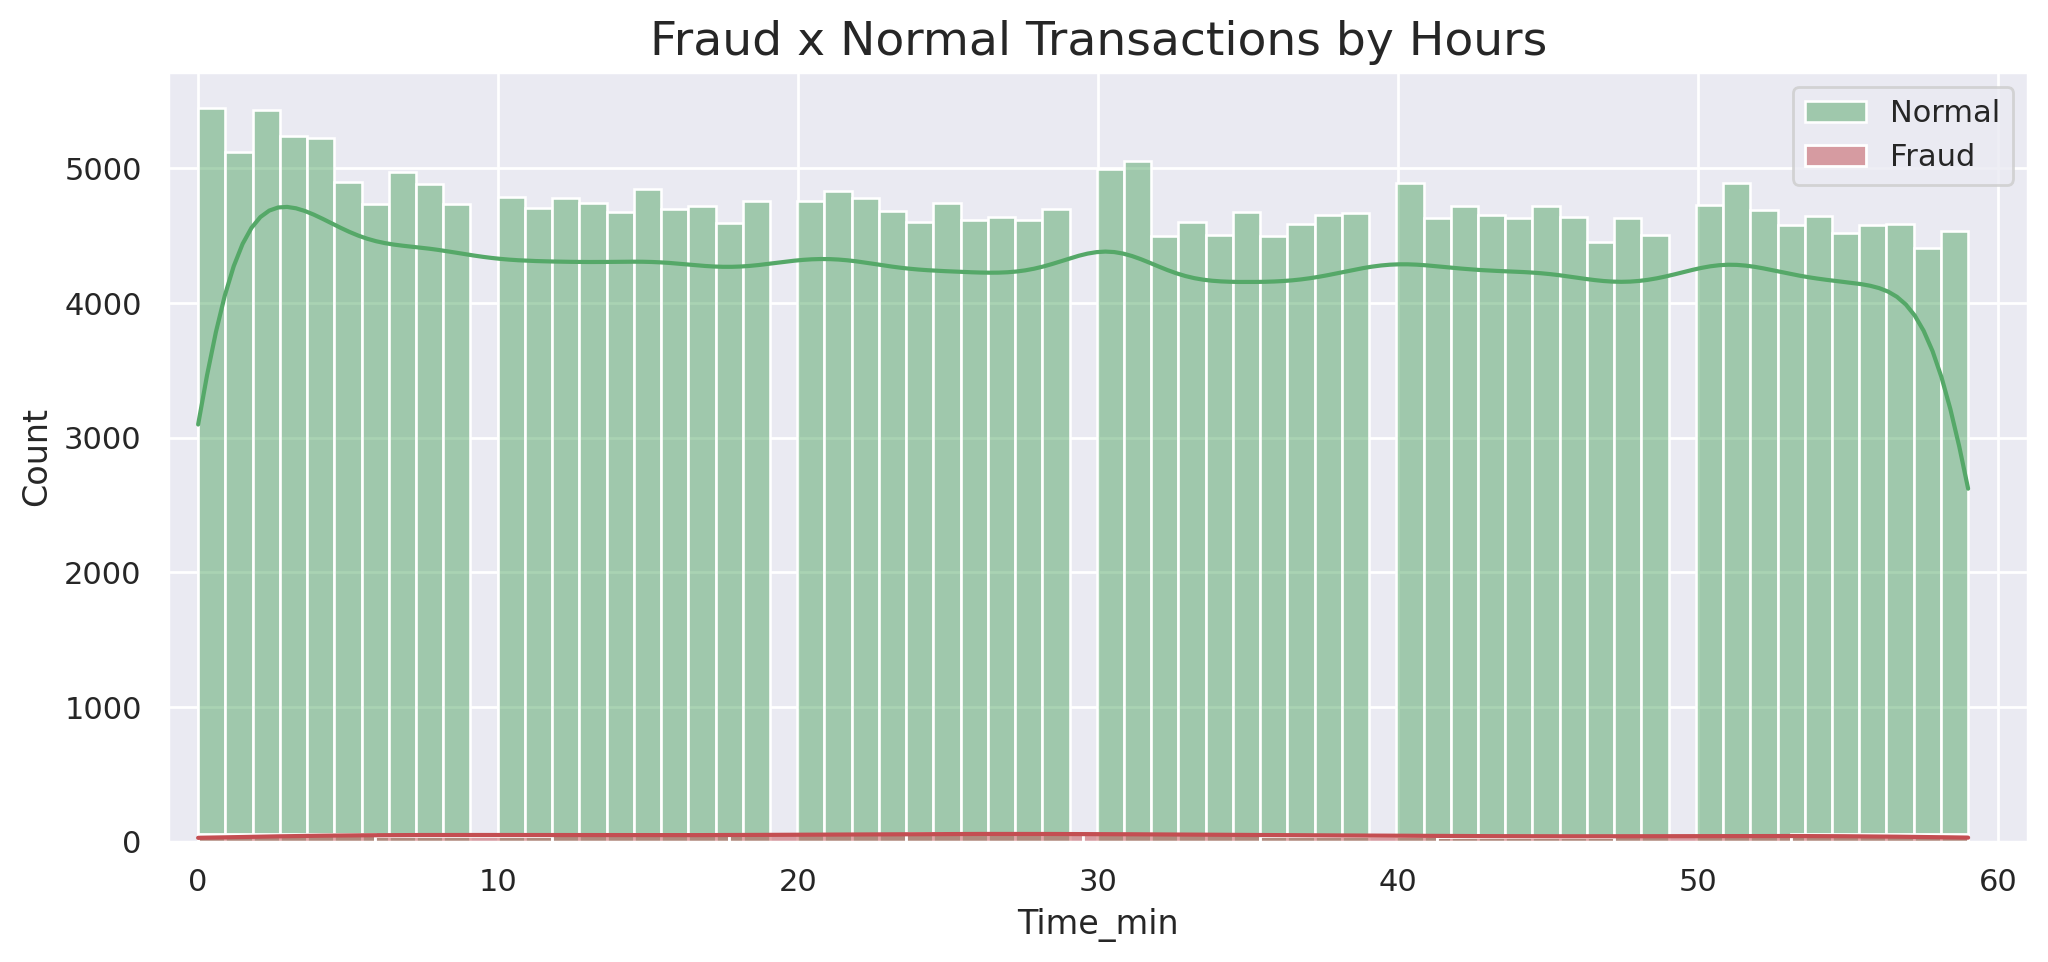

In [ ]:
plt.figure(figsize=(12, 5))
sns.histplot(df[df['Class'] == 0]["Time_min"],  color='g', kde=True, label='Normal')
sns.histplot(df[df['Class'] == 1]["Time_min"], color='r', kde=True, label='Fraud')
plt.title('Fraud x Normal Transactions by Hours', fontsize=17)
plt.xlim([-1, 61])
plt.legend()
plt.show()

<ipython-input-11-036521616790>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col][frauds], bins = 50, color='g') #Will receive the "semi-salmon" violin
<ipython-input-11-036521616790>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col][normals], bins = 50, color='r') #Will receive 

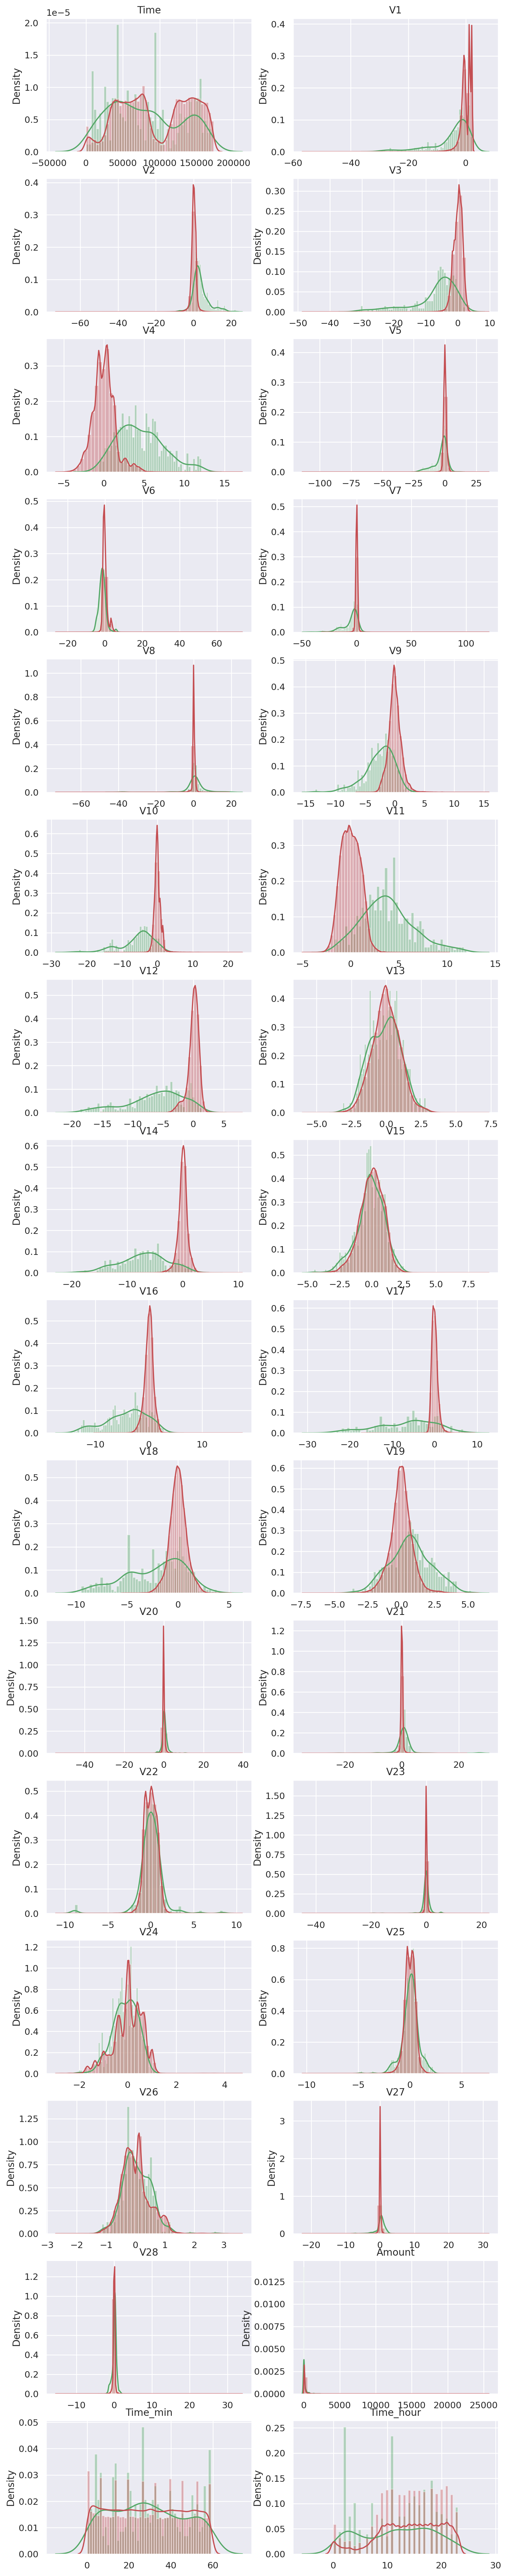

In [ ]:
import matplotlib.gridspec as gridspec # to do the grid of plots #  gridspec work same as plt.subplots
columns  = df.iloc[:,df.columns  != 'Class'].columns
frauds = df.Class == 1
normals = df.Class == 0
grid = gridspec.GridSpec(17, 2)
plt.figure(figsize=(10,15*4))

for n, col in enumerate(df[columns]):
    ax = plt.subplot(grid[n])
    sns.distplot(df[col][frauds], bins = 50, color='g') #Will receive the "semi-salmon" violin
    sns.distplot(df[col][normals], bins = 50, color='r') #Will receive the "ocean" color
    ax.set_ylabel('Density')
    ax.set_title(str(col))
    ax.set_xlabel('')
plt.show()

## Data Preprocessing

The columns listed below seems irrelevant

In [ ]:
df_selected = df.drop(['V15','V17','V24','V27','Time_hour','Time','Time_min'], axis = 1)

In [ ]:
df_selected.shape

(284807, 26)

### Data Splitting

In [ ]:
df_training, df_testing = train_test_split(df_selected,test_size = 0.2, random_state = 42,stratify = df_selected.Class)

In [ ]:
df_testing.Class.value_counts()

Class
0    56864
1       98
Name: count, dtype: int64

In [ ]:
train_data,validation_data,train_lable, validation_lable = train_test_split(df_training.loc[:,df_training.columns != 'Class'],df_training.Class,test_size = 0.2, stratify  = df_training.Class, random_state = 42)

### Scale Dataset

In [ ]:
##### here we are going to use min max scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_scaled = scaler.fit(train_data)
train_data_normalised = data_scaled.transform(train_data)
validation_data_normalised = data_scaled.transform(validation_data)

test_data = df_testing.loc[:, df_testing.columns != 'Class']
test_lable = df_testing.Class
test_data_normalised = data_scaled.transform(test_data)

In [ ]:
print(f"train_data_normalised.shape: {train_data_normalised.shape}")
print(f"validation_data_normalised.shape: {validation_data_normalised.shape}")
print(f"test_data_normalised.shape: {test_data_normalised.shape}")

train_data_normalised.shape: (182276, 25)
validation_data_normalised.shape: (45569, 25)
test_data_normalised.shape: (56962, 25)


### Data Formatting

In [ ]:
# lets change the labels with boolean
train_lable,validation_lable, test_lable = train_lable.astype(bool), validation_lable.astype(bool), test_lable.astype(bool)

In [ ]:
# now  lets seperate the normal and fraud data out of training dataset
normal_train_data = train_data_normalised[~train_lable] # normal transactions out of train_data_normalised
normal_test_data = test_data_normalised[~test_lable] # normal transactions out of test_data_normalised
normal_validation_data = validation_data_normalised[~validation_lable]

In [ ]:
print(len(normal_train_data))
print(len(normal_test_data))
print(len(normal_validation_data))

181961
56864
45490


In [ ]:
fraud_train_data = train_data_normalised[train_lable]
fraud_test_data = test_data_normalised[test_lable]
fraud_validation_data = validation_data_normalised[validation_lable]

In [ ]:
print(len(fraud_train_data))
print(len(fraud_test_data))
print(len(fraud_validation_data))

315
98
79


## Plot Data

**Normal Data**

In [ ]:
normal_train_data[0].shape

(25,)

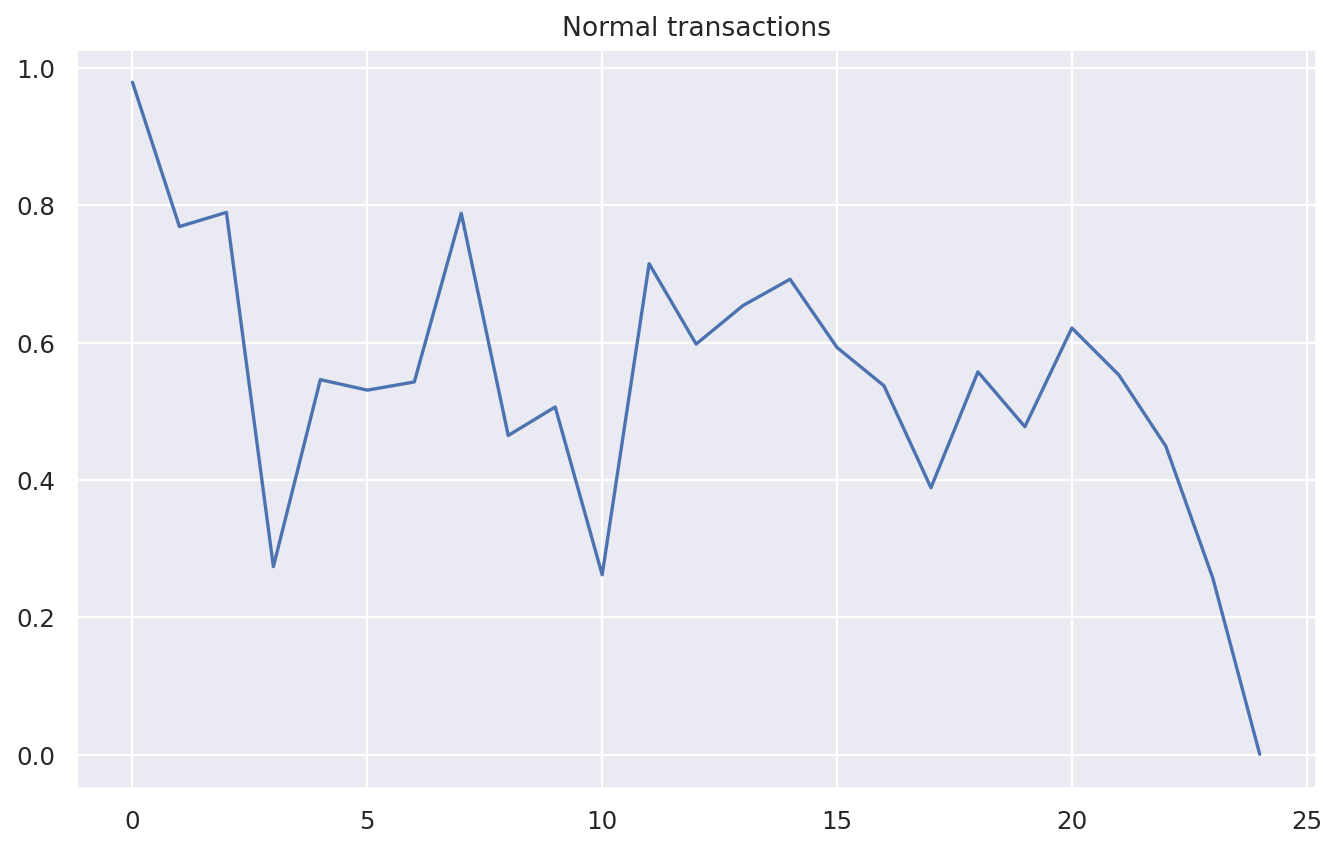

In [ ]:
from matplotlib.pyplot import figure

figure(figsize=(10, 6), dpi=80)
plt.plot(np.arange(25), normal_train_data[1])
plt.title('Normal transactions')

plt.show()

**Fraud Data**

In [ ]:
fraud_train_data[2]

array([0.86313861, 0.82236022, 0.60757087, 0.61178208, 0.51190726,
       0.5049505 , 0.46397614, 0.82124406, 0.30748151, 0.35697646,
       0.71079904, 0.29589388, 0.80944407, 0.30165222, 0.41927119,
       0.5202625 , 0.71738895, 0.39369728, 0.58151548, 0.53001624,
       0.61770724, 0.52496163, 0.50082531, 0.24652224, 0.        ])

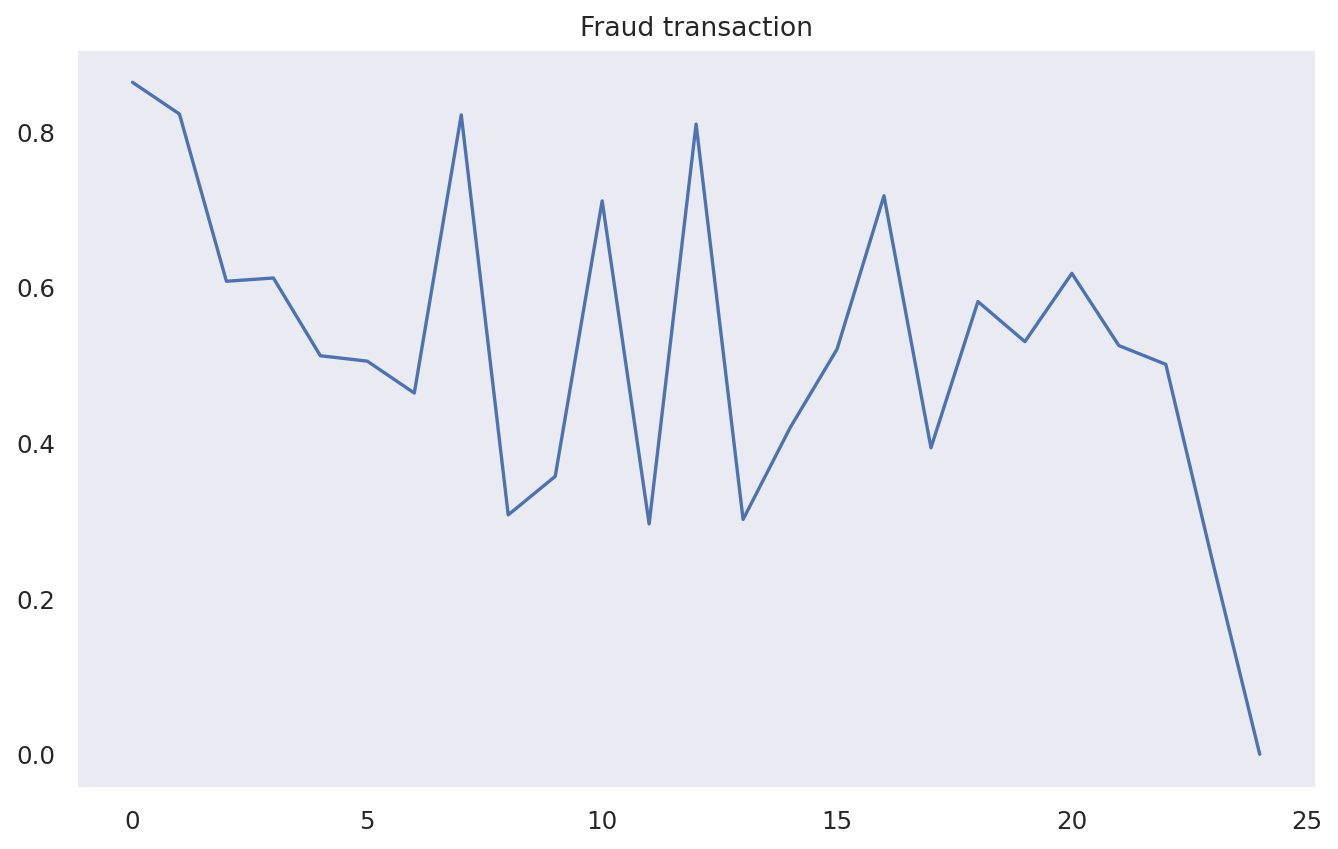

In [ ]:
#Lets plot one from fraud transaction
figure(figsize=(10, 6), dpi=80)

plt.plot(np.arange(25), fraud_train_data[2])
plt.grid()
plt.title('Fraud transaction')
plt.show()

## Auto-Encoder

**Encoder Design**

In [ ]:
n_features = len(train_data.columns)
encoder = models.Sequential(name='encoder')
encoder.add(layer=layers.Dense(units=200, activation=activations.relu, input_shape=[n_features]))
encoder.add(layers.Dropout(0.1))
encoder.add(layer=layers.Dense(units=100, activation=activations.relu))
encoder.add(layer=layers.Dense(units=5, activation=activations.relu))

**Decoder Design**

In [ ]:
decoder = models.Sequential(name='decoder')
decoder.add(layer=layers.Dense(units=100, activation=activations.relu, input_shape=[5]))
decoder.add(layer=layers.Dense(units=200, activation=activations.relu))
decoder.add(layers.Dropout(0.1))
decoder.add(layer=layers.Dense(units=n_features, activation=activations.sigmoid))

In [ ]:
autoencoder = models.Sequential([encoder, decoder])
autoencoder.compile(loss=losses.MSE, optimizer=optimizers.Adam(), metrics=[metrics.mean_squared_error])

This took about 4 mins

In [ ]:
es = EarlyStopping(monitor='val_loss', min_delta=0.00001, patience=5,restore_best_weights=True)
history = autoencoder.fit(x=normal_train_data, y=normal_train_data, epochs=100, verbose=1, validation_data=(normal_validation_data, normal_validation_data), callbacks=[es])

Epoch 1/100
5687/5687 [==============================] - 19s 3ms/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 5.7271e-04 - val_mean_squared_error: 5.7271e-04
Epoch 2/100
5687/5687 [==============================] - 17s 3ms/step - loss: 5.6706e-04 - mean_squared_error: 5.6706e-04 - val_loss: 4.6406e-04 - val_mean_squared_error: 4.6406e-04
Epoch 3/100
5687/5687 [==============================] - 17s 3ms/step - loss: 5.0529e-04 - mean_squared_error: 5.0529e-04 - val_loss: 4.4238e-04 - val_mean_squared_error: 4.4238e-04
Epoch 4/100
5687/5687 [==============================] - 18s 3ms/step - loss: 4.7070e-04 - mean_squared_error: 4.7070e-04 - val_loss: 4.0180e-04 - val_mean_squared_error: 4.0180e-04
Epoch 5/100
5687/5687 [==============================] - 17s 3ms/step - loss: 4.4745e-04 - mean_squared_error: 4.4745e-04 - val_loss: 4.1738e-04 - val_mean_squared_error: 4.1738e-04
Epoch 6/100
5687/5687 [==============================] - 17s 3ms/step - loss: 4.3346e-04 - mean_sq

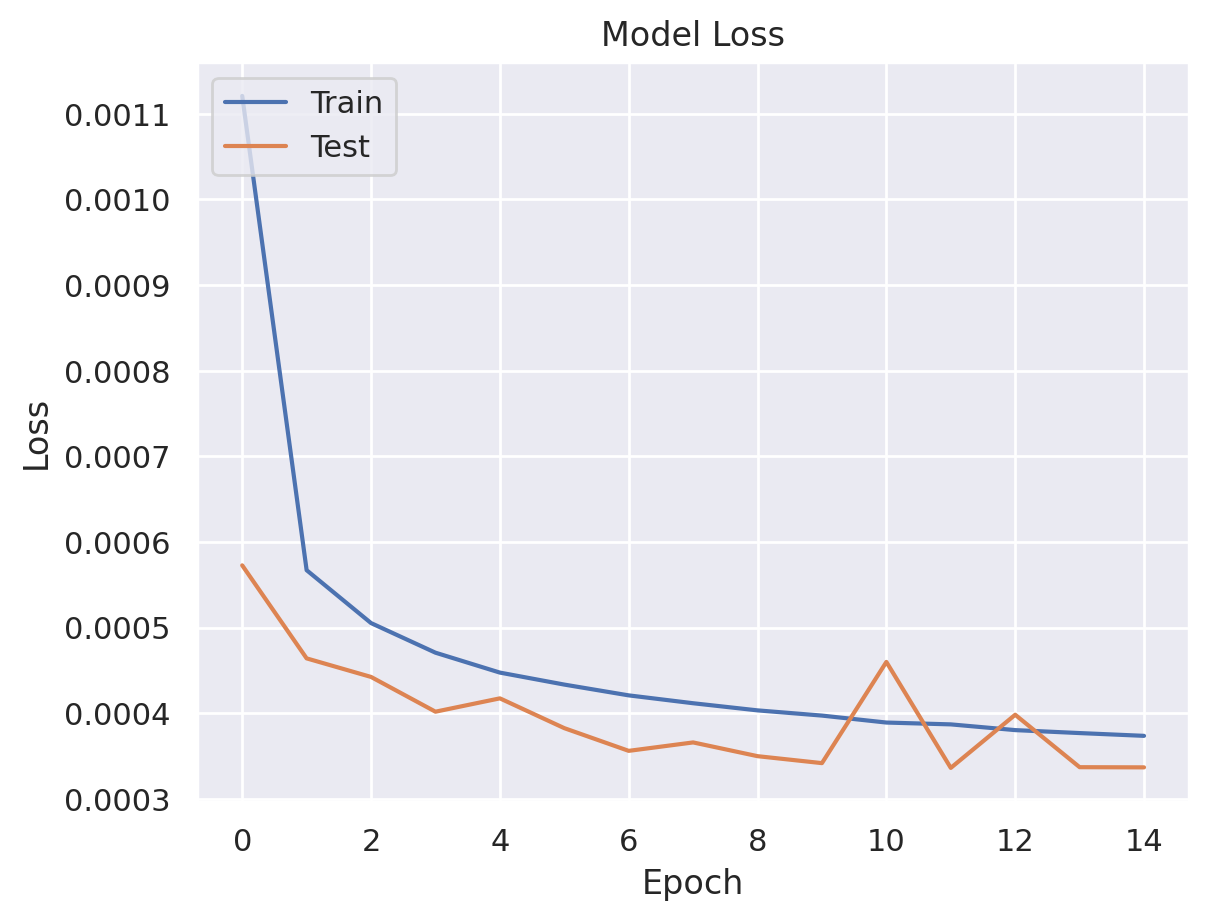

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
# Define a function in order to plot the original ECG and reconstructed ones and also show the error
def plot(data, n):
  dec_img = autoencoder.predict(data) # this will decode or reconstruct
  plt.plot(data[n], 'b')
  plt.plot(dec_img[n], 'r')
  plt.fill_between(np.arange(25), data[n], dec_img[n], color = 'lightcoral')
  plt.legend(labels=['Input', 'Reconstruction', 'Error'])
  plt.show()

1777/1777 [==============================] - 3s 2ms/step


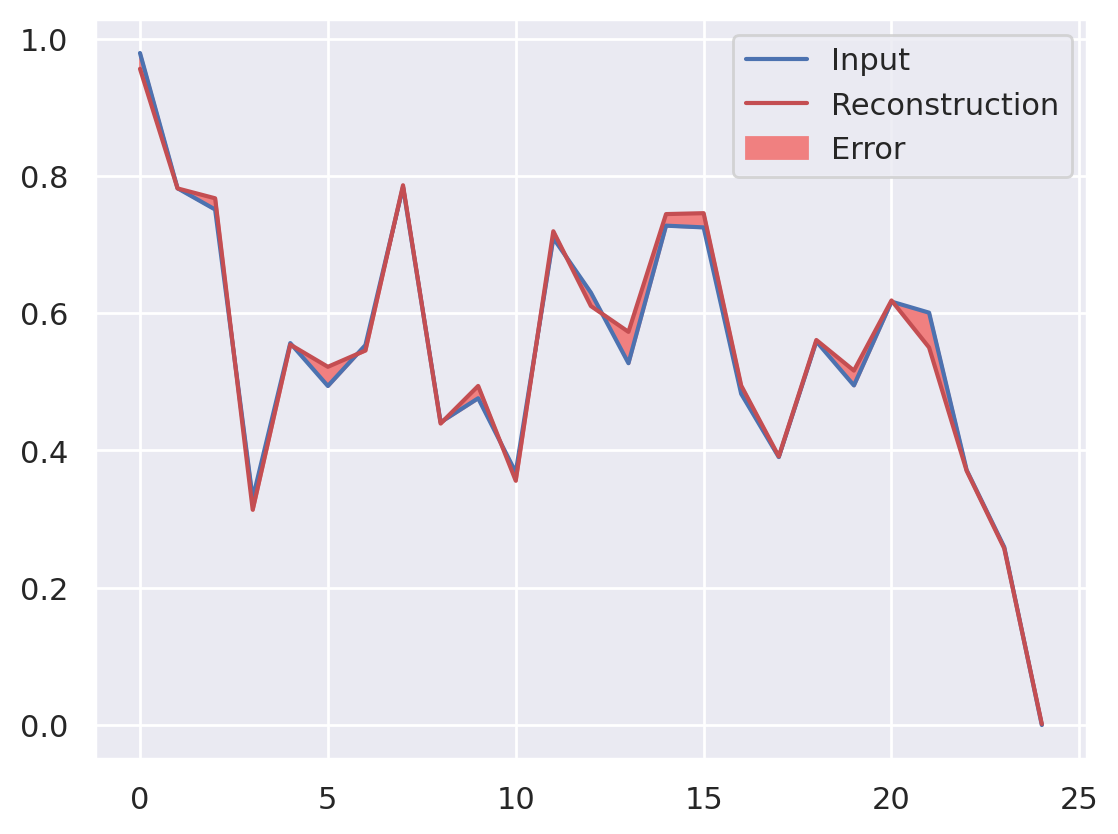

4/4 [==============================] - 0s 3ms/step


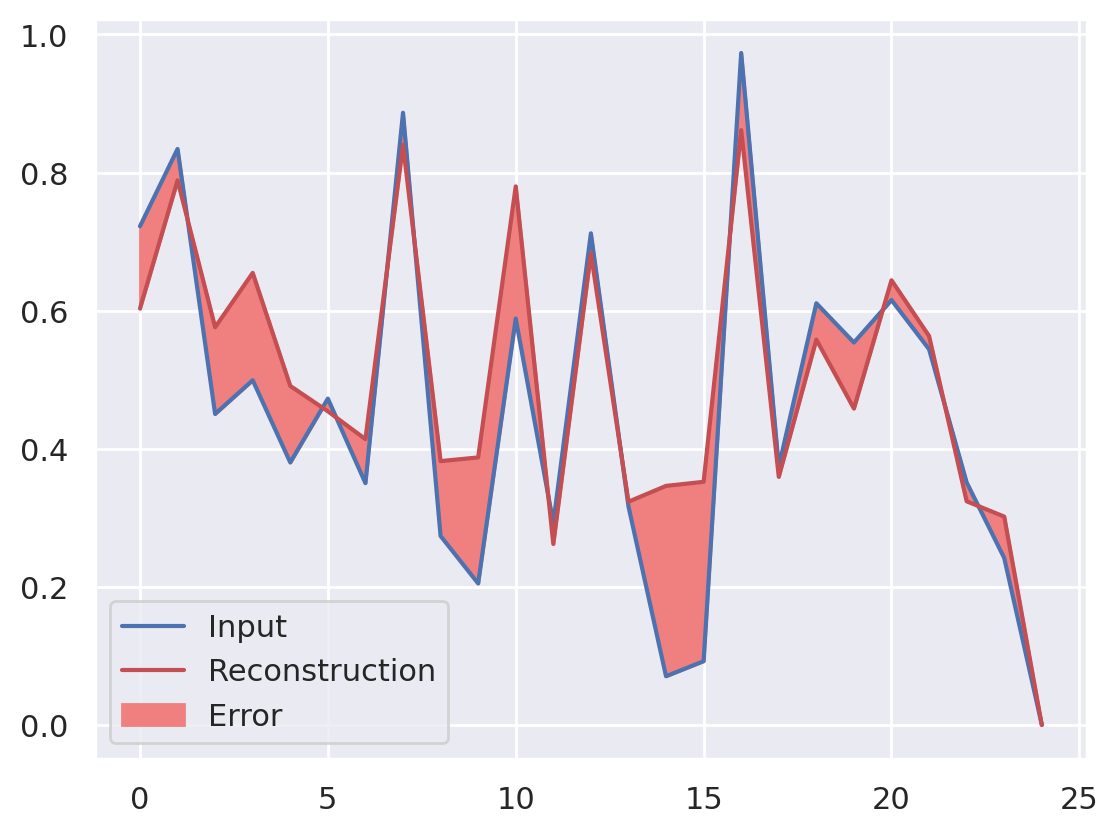

In [ ]:
plot(normal_test_data, 4) # here n shows the index of ecg samples
plot(fraud_test_data, 4)

## Find a threshold to detect Anomalies

In [ ]:
### calculating the train error  in legit transactions
reconstructed = autoencoder.predict(normal_train_data)
train_normal_loss = losses.mae(reconstructed, normal_train_data).numpy()
np.mean(train_normal_loss)

plt.hist(train_normal_loss, bins = 50)
plt.title('error normal train loss')
plt.show()

5687/5687 [==============================] - 8s 1ms/step


0.011665440663836913

10/10 [==============================] - 0s 3ms/step
0.056994176270862666


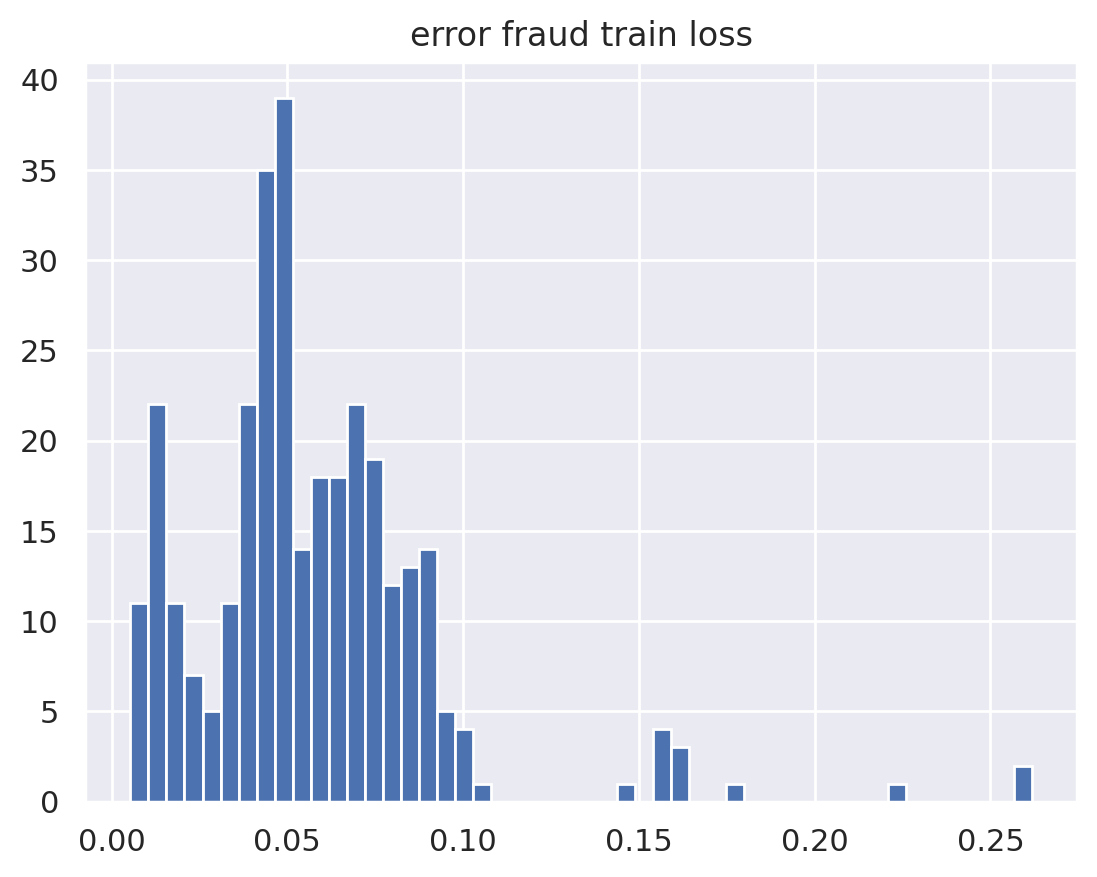

In [ ]:
### calculating the train error  in fraud transactions
reconstructed = autoencoder.predict(fraud_train_data)
train_fraud_loss = losses.mae(reconstructed, fraud_train_data).numpy()
print(np.mean(train_fraud_loss))
plt.hist(train_fraud_loss, bins = 50)
plt.title('error fraud train loss')
plt.show()

In [ ]:
Fraud = df.Class.sum()
total = len(df)
fraud_percentage = (Fraud/total)*100
fraud_percentage
# so lets say that 1% of transactions are fraud so lets find the threshold

0.1727485630620034

In [ ]:
# calcualting the error in the whole train data
reconstructed = autoencoder.predict(train_data_normalised)
train_loss = losses.mae(reconstructed, train_data_normalised).numpy()

5697/5697 [==============================] - 8s 1ms/step


There are two ways to set our threshold
1. set up by using percentile (suppose we have 2% of fraud transaction so our aim will be filter 2% probable data)
2. set up by using distribution and try to find the outliers

In [ ]:
# we are assuming that we have 1% of fraud transaction here
cut_off_1 = np.percentile(train_loss, 99)
cut_off_1

0.03580329744104729

In [ ]:
cut_off_2 = np.mean(train_loss) + 5*np.std(train_loss)
cut_off_2
# 2std division covers 97% of the distribution and here i have taken 3 std division

0.04438798079807685

if error is greater than this value we would say fraud transaction if lesser than cut-off means legitimate transaction

### Prediction on our TEST data

In [ ]:
reconstructed = autoencoder.predict(test_data_normalised)
errors = losses.mae(reconstructed,test_data_normalised)
len(errors)
predicted = []
for error in errors:
    if error > cut_off_1:
        predicted.append(1)
    else:
        predicted.append(0)

1781/1781 [==============================] - 3s 1ms/step


In [ ]:
np.sort(errors)[::-1]

array([0.17023848, 0.16082922, 0.15561536, ..., 0.00296099, 0.00284606,
       0.00258549])

In [ ]:
predicted_fraud_cases = np.array(predicted).sum()
actual_fraud_cases = test_lable.sum()
print('predicted_fruad_cases =>'.format(), predicted_fraud_cases, 'true fraud cases =>'.format(), actual_fraud_cases)

predicted_fruad_cases => 596 true fraud cases => 98


In [ ]:
# From booliean Map back to 1 and 0
true_lable = test_lable.map({True:1,False:0})

## Conclusion

In [ ]:
### classification report
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(true_lable, predicted))
print(confusion_matrix(true_lable, predicted))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56864
           1       0.13      0.82      0.23        98

    accuracy                           0.99     56962
   macro avg       0.57      0.90      0.61     56962
weighted avg       1.00      0.99      0.99     56962

[[56348   516]
 [   18    80]]


4/4 [==============================] - 0s 4ms/step


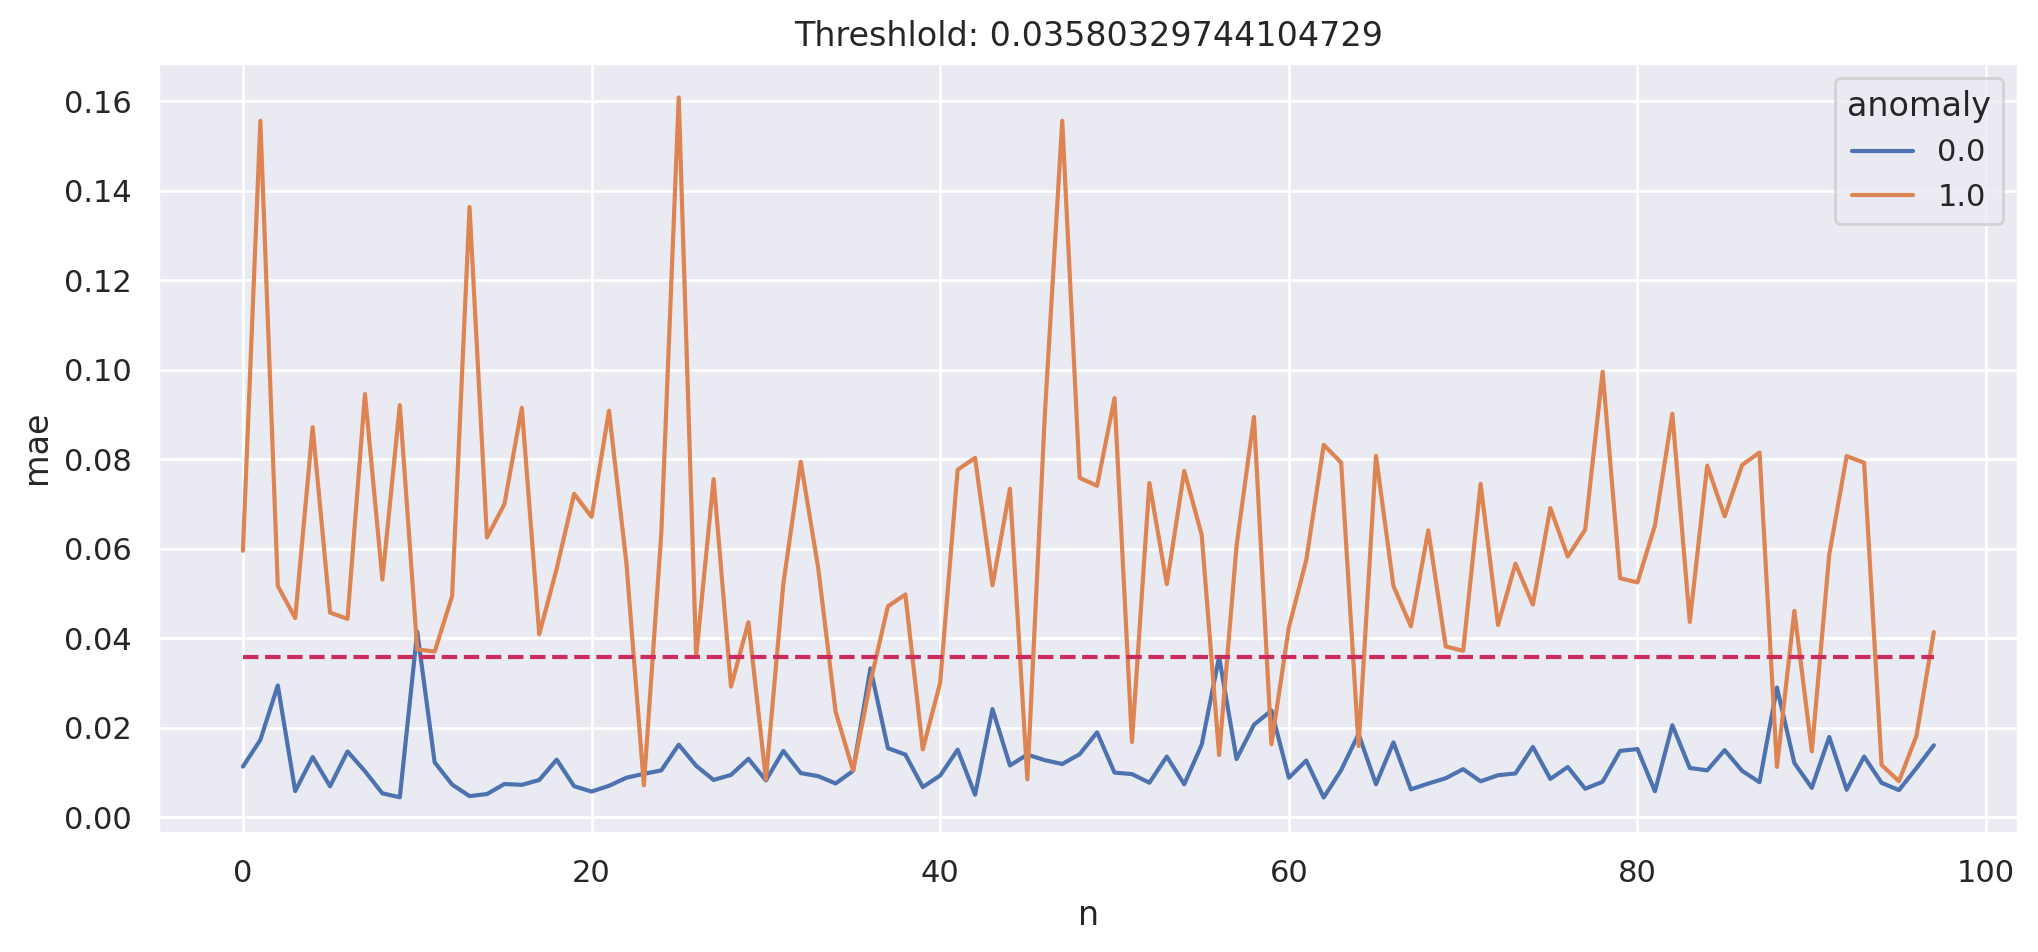

In [ ]:
from matplotlib import lines
plot_samples = 98
plt.figure(figsize=(12,5))

# normal event
n_features = 25
real_x = normal_test_data[:plot_samples]
predicted_x = autoencoder.predict(x=real_x)
normal_events_mae = losses.mae(real_x, predicted_x)
normal_events_df = pd.DataFrame({
	'mae': normal_events_mae,
	'n': np.arange(0, plot_samples),
	'anomaly': np.zeros(plot_samples)})


# abnormal event
abnormal_x = fraud_test_data[:plot_samples]
predicted_x = autoencoder.predict(x=abnormal_x)
abnormal_events_mae = losses.mae(abnormal_x, predicted_x)
abnormal_events_df = pd.DataFrame({
	'mae': abnormal_events_mae,
	'n': np.arange(0, plot_samples),
	'anomaly': np.ones(plot_samples)})
abnormal_events_df

mae_df = pd.concat([normal_events_df, abnormal_events_df])
plot = sns.lineplot(x=mae_df.n, y=mae_df.mae, hue=mae_df.anomaly)

line = lines.Line2D(
	xdata=np.arange(0, plot_samples),
	ydata=np.full(plot_samples, cut_off_1),
	color='#CC2B5E',
	linewidth=1.5,
	linestyle='dashed')

plot.add_artist(line)
plt.title('Threshlold: {threshold}'.format(threshold=cut_off_1))
plt.show()

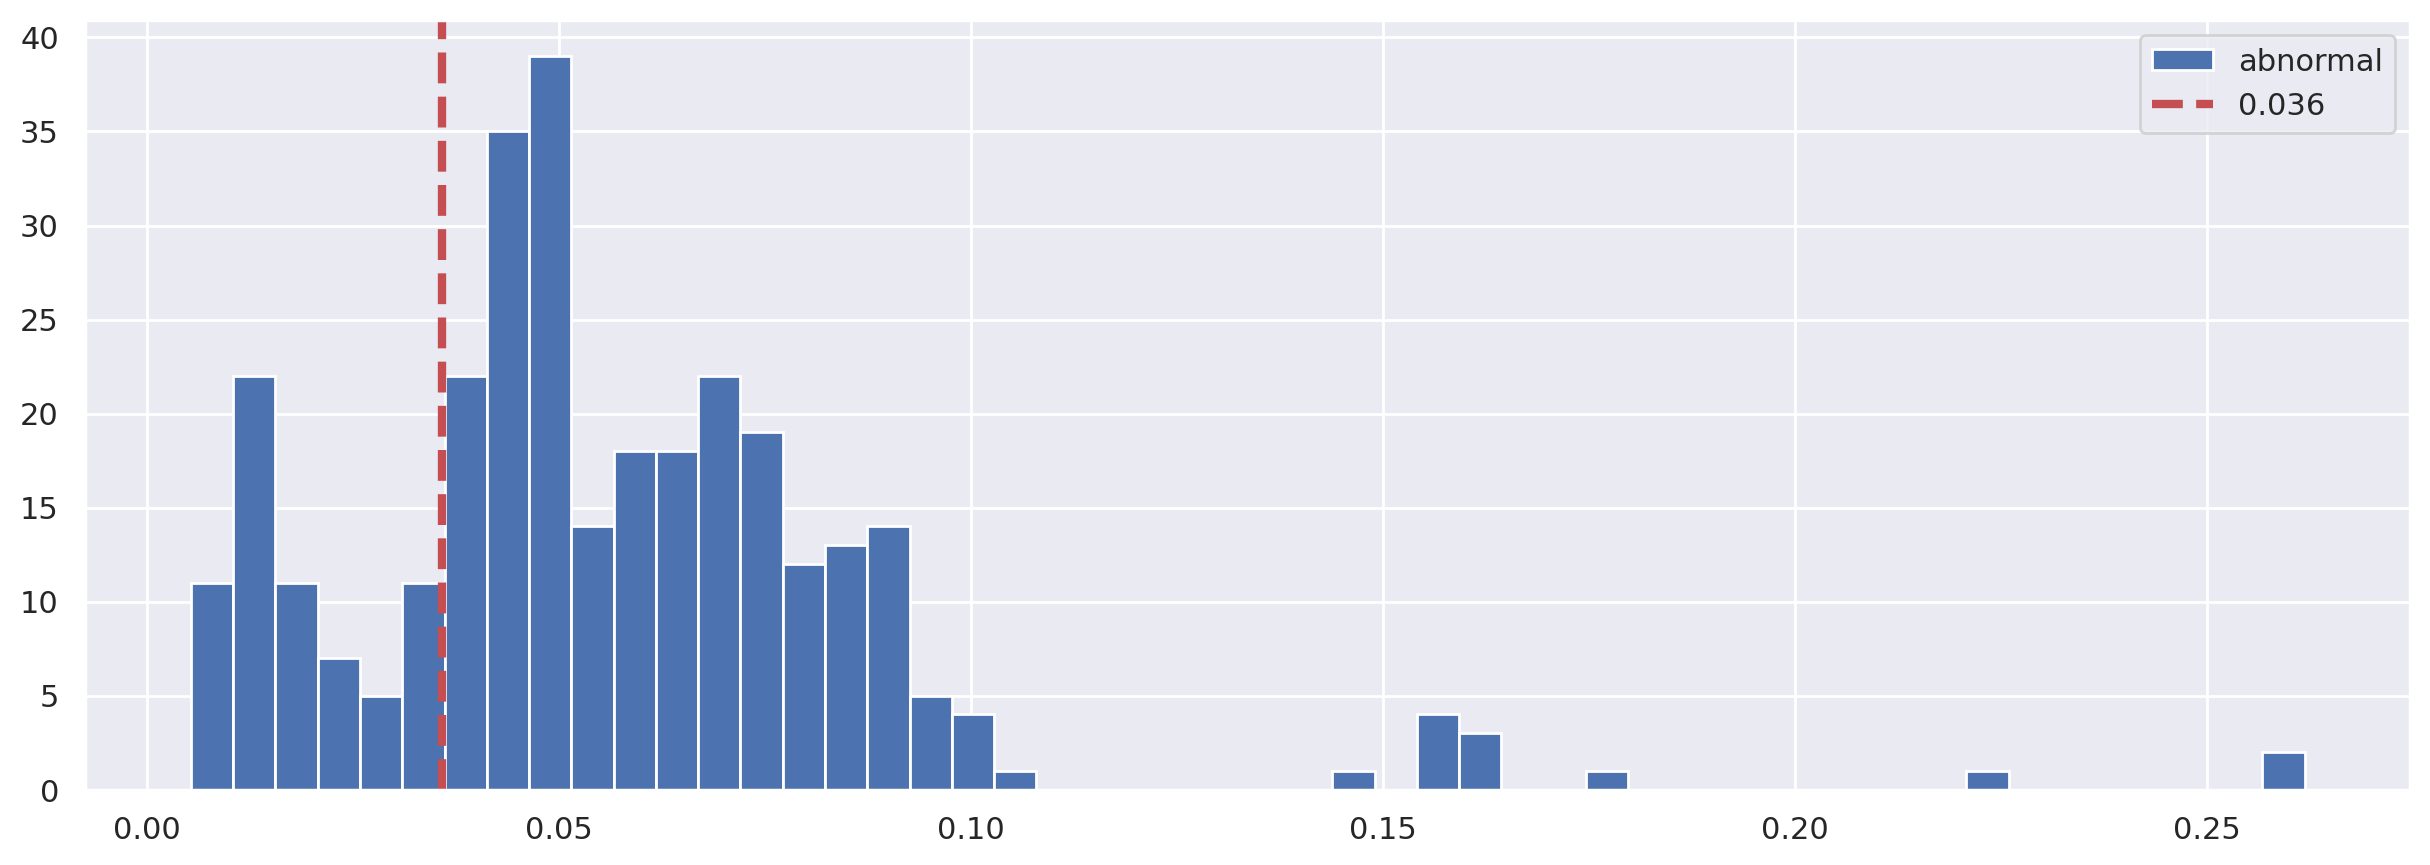

In [ ]:
plt.figure(figsize=(15,5))

# plt.hist(train_normal_loss, bins = 50, label = 'normal')
plt.hist(train_fraud_loss, bins = 50, label = 'abnormal')
plt.axvline(cut_off_1, color = 'r', linewidth = 3, linestyle = 'dashed', label = '{:0.3f}'.format(cut_off_1))
plt.legend(loc = 'upper right')
plt.show()

## Isolation Forest

# Method 2

**What is Isolation Forest**

The IsolationForest ‘isolates’ observations by randomly selecting a feature and then randomly selecting a split value between the maximum and minimum values of the selected feature.

The logic argument goes: isolating anomaly observations is easier because only a few conditions are needed to separate those cases from the normal observations. On the other hand, isolating normal observations require more conditions. Therefore, an anomaly score can be calculated as the number of conditions required to separate a given observation.

The way that the algorithm constructs the separation is by first creating isolation trees, or random decision trees. Then, the score is calculated as the path length to isolate the observation.

## Imports

In [ ]:
import os
import numpy as np
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

## Load datset

Class
0    284315
1       492
Name: count, dtype: int64


<Axes: xlabel='Class'>

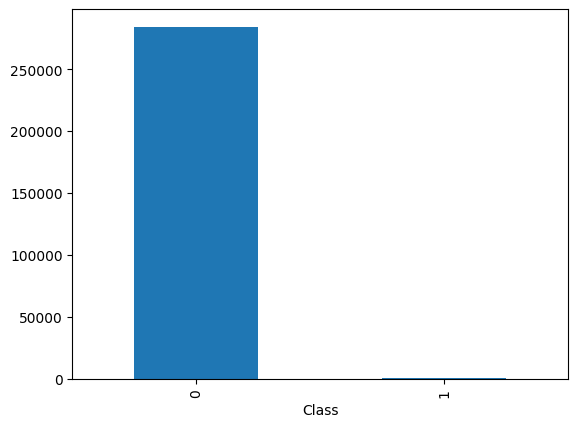

In [ ]:
print(df.Class.value_counts())
df.Class.value_counts().plot(kind='bar')

## Data formating

In [ ]:
seed = 1337

def get_data(df, clean_train=True):
  """
      clean_train=True returns a train sample that only contains clean samples.
      Otherwise, it will return a subset of each class in train and test (10% outlier)
  """
  clean = df[df.Class == 0].copy().reset_index(drop=True)
  fraud = df[df.Class == 1].copy().reset_index(drop=True)
  print(f'Clean Samples: {len(clean)}, Fraud Samples: {len(fraud)}')

  if clean_train:
      train, test_clean = train_test_split(clean, test_size=len(fraud), random_state=seed)
      print(f'Train Samples: {len(train)}')

      test = pd.concat([test_clean, fraud]).reset_index(drop=True)

      print(f'Test Samples: {len(test)}')

      # shuffle the test data
      test.sample(frac=1, random_state=seed).reset_index(drop=True)

      train_X, train_y = train.loc[:, ~train.columns.isin(['Class'])], train.loc[:, train.columns.isin(['Class'])]
      test_X, test_y = test.loc[:, ~test.columns.isin(['Class'])], test.loc[:, test.columns.isin(['Class'])]
  else:
      clean_train, clean_test = train_test_split(clean, test_size=int(len(fraud)+(len(fraud)*0.9)), random_state=seed)
      fraud_train, fraud_test = train_test_split(fraud, test_size=int(len(fraud)*0.1), random_state=seed)

      train_samples = pd.concat([clean_train, fraud_train]).reset_index(drop=True)
      test_samples = pd.concat([clean_test, fraud_test]).reset_index(drop=True)

      # shuffle
      train_samples.sample(frac=1, random_state=seed).reset_index(drop=True)

      print(f'Train Samples: {len(train_samples)}')
      test_samples.sample(frac=1, random_state=seed).reset_index(drop=True)

      print(f'Test Samples: {len(test_samples)}')
      train_X, train_y = train_samples.loc[:, ~train_samples.columns.isin(['Class'])], train_samples.loc[:, train_samples.columns.isin(['Class'])]
      test_X, test_y = test_samples.loc[:, ~test_samples.columns.isin(['Class'])], test_samples.loc[:, test_samples.columns.isin(['Class'])]

  return train_X, train_y, test_X, test_y

Clean Samples: 284315, Fraud Samples: 492
Train Samples: 283823
Test Samples: 984


In [ ]:
train_X, train_y, test_X, test_y = get_data(df)

Clean Samples: 284315, Fraud Samples: 492
Train Samples: 283823
Test Samples: 984


## Train on only Normal dataset

In [ ]:
model = IsolationForest(random_state=seed)
model.fit(train_X)

IsolationForest(random_state=1337)

In [ ]:
def predict(X):
    test_yhat = model.predict(X)
    # values are -1 and 1 (-1 for outliers and 1 for inliers), thus we will map it to 0 (inlier) and 1 (outlier) as this is our target variable
    test_yhat = np.array([1 if y == -1 else 0 for y in test_yhat])
    return test_yhat

In [ ]:
test_yhat = predict(test_X)

In [ ]:
def get_confusion_matrix(test_y, test_yhat):
  cm = confusion_matrix(test_y, test_yhat)

  fig, ax = plt.subplots(1, 1,figsize=(10,10))

  tick_labels = ['Normal','Fraudulent']

  # calculate output
  total = np.sum(cm)

  # Actually True
  tp = cm[0][0]
  fn = cm[0][1]

  # Actually false
  fp = cm[1][0]
  tn = cm[1][1]

  tp_o = np.round((tp / total)*100,3)
  fn_o = np.round((fn / total)*100,3)
  fp_o = np.round((fp / total)*100,3)
  tn_o = np.round((tn / total)*100,3)

  tp_c = np.round(max((tp / (tp + fn)), 0.0)*100,3)
  fn_c = np.round(max((fn / (tp + fn)), 0.0)*100,3)
  fp_c = np.round(max((fp / (fp + tn)), 0.0)*100,3)
  tn_c = np.round(max((tn / (fp + tn)), 0.0)*100,3)

  labels = np.array([
      [f'TP\nCount: {tp}\nOverall: {tp_o}%\nTPR: {tp_c}%',
       f'FN (Type 2)\nCount: {fn}\nOverall: {fn_o}%\nFNR: {fn_c}%'],
      [f'FP (Type 1)\nCount: {fp}\nOverall: {fp_o}%\nFPR: {fp_c}%',
       f'TN\nCount: {tn}\nOverall: {tn_o}%\nTNR: {tn_c}%']
      ])

  sns.heatmap(cm, ax=ax, annot=labels, fmt='', cmap=plt.cm.RdYlBu)

  ax.set_title('Confusion Matrix', fontsize=14)

  ax.set_xticklabels(tick_labels, fontsize=14, rotation=0)
  ax.set_xlabel('Predicted', fontsize=20)
  ax.set_yticklabels(tick_labels, fontsize=14, rotation=0)
  ax.set_ylabel('Actual', fontsize=20)

  plt.show()

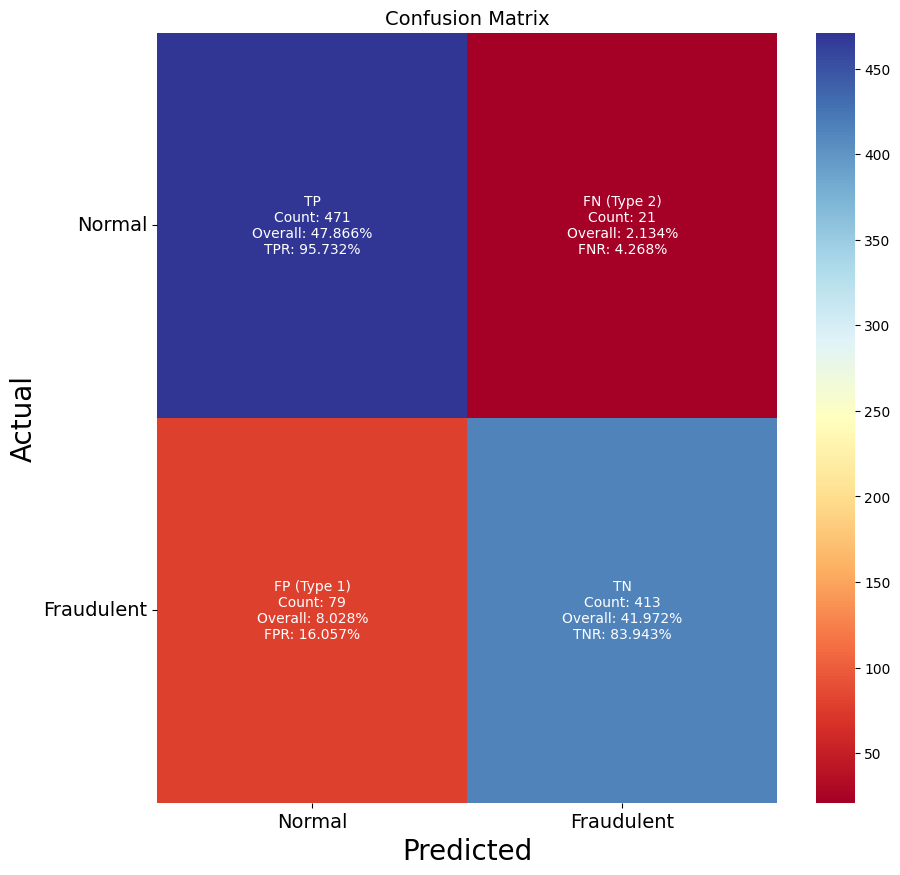

In [ ]:
get_confusion_matrix(test_y, test_yhat)

In [ ]:
def get_classification_report(test_y, test_yhat):
    labels = ['Normal','Fraudulent']
    print(classification_report(test_y, test_yhat, target_names=labels))

In [ ]:
get_classification_report(test_y, test_yhat)

              precision    recall  f1-score   support

      Normal       0.86      0.96      0.90       492
  Fraudulent       0.95      0.84      0.89       492

    accuracy                           0.90       984
   macro avg       0.90      0.90      0.90       984
weighted avg       0.90      0.90      0.90       984



## Training on Both Normal and fraud dataset

In [ ]:
train_X, train_y, test_X, test_y = get_data(df, clean_train=False)

Clean Samples: 284315, Fraud Samples: 492
Train Samples: 283824
Test Samples: 983


In [ ]:
model = IsolationForest(random_state=seed)
model.fit(train_X, train_y)

In [ ]:
test_yhat = predict(test_X)

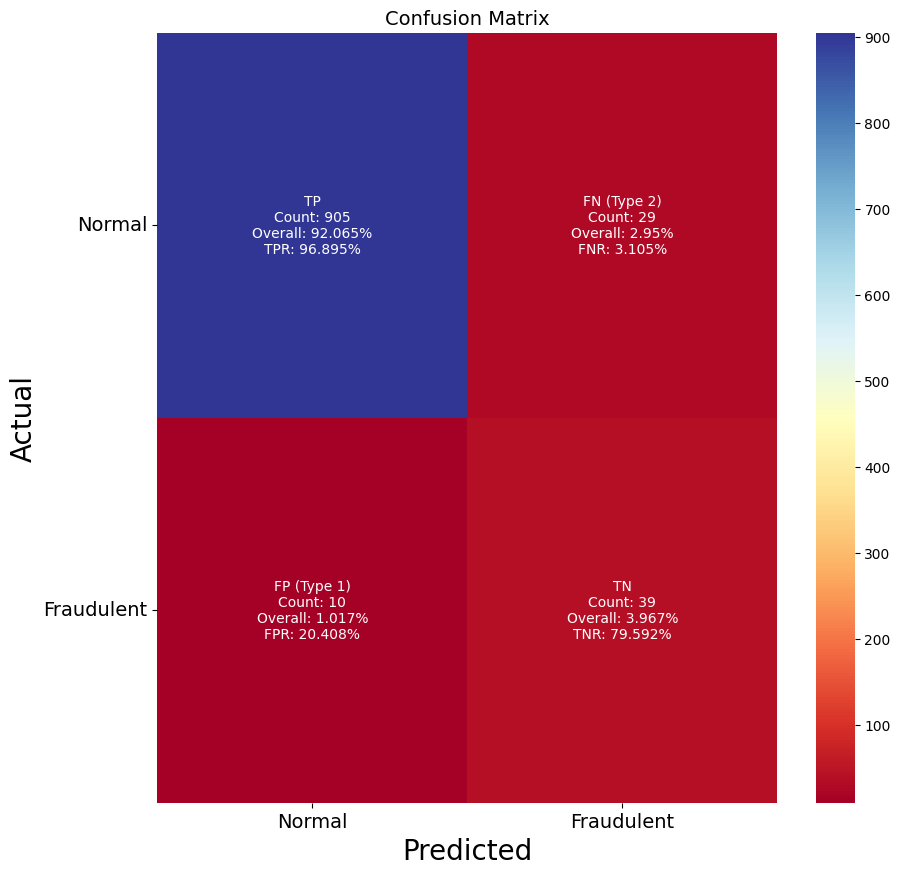

In [ ]:
get_confusion_matrix(test_y, test_yhat)

In [ ]:
get_classification_report(test_y, test_yhat)

              precision    recall  f1-score   support

      Normal       0.99      0.97      0.98       934
  Fraudulent       0.57      0.80      0.67        49

    accuracy                           0.96       983
   macro avg       0.78      0.88      0.82       983
weighted avg       0.97      0.96      0.96       983



Here, when we train on both normal and fruad dataset the prediction becomes worse

## CBLOF

# CBLOF

## Import

In [ ]:
!pip install pyod

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.8/163.8 kB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyod: filename=pyod-2.0.1-py3-none-any.whl size=193267 sha256=f51d7973432287793dd26a12ad3261f9a1372fa6dccbd99ab5b622f0cf33c130
  Stored in directory: /root/.cache/pip/wheels/94/75/88/b853cf33b0053b0a001dca55b74d515048b7656e736364eb57
Successfully built pyod


In [ ]:
import pandas as pd
from pyod.models.cblof import CBLOF
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

## Load Dataset

Seperate Labels from feature value

In [ ]:
# Separate features and labels
X = data.drop(['Class', 'Time'], axis=1)
y = data['Class']

Scale the feature values

In [ ]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Fitting data into models

In [ ]:
# Initialize the CBLOF model
cblof = CBLOF(contamination=0.0017, random_state=42)

In [ ]:
# Fit the model
cblof.fit(X_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


CBLOF(alpha=0.9, beta=5, check_estimator=False, clustering_estimator=None,
   contamination=0.0017, n_clusters=8, n_jobs=None, random_state=42,
   use_weights=False)

In [ ]:
# Get the outlier scores
y_pred = cblof.labels_  # binary labels (0: inliers, 1: outliers)
y_scores = cblof.decision_scores_  # raw outlier scores

In [ ]:
len(y_pred[y_pred==1])

485

In [ ]:
y_scores

array([2.94239611, 2.5304031 , 5.95090084, ..., 4.26433481, 5.64534081,
       3.07509567])

In [ ]:
# Evaluate the model
print(confusion_matrix(y, y_pred))
print(classification_report(y, y_pred))

[[283944    371]
 [   378    114]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.24      0.23      0.23       492

    accuracy                           1.00    284807
   macro avg       0.62      0.62      0.62    284807
weighted avg       1.00      1.00      1.00    284807



## DBSCAN

# CreditCard Fraud Detection

## Import packages

In [ ]:
import numpy as np
import pandas as pd
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score
from pylab import rcParams
import itertools

rcParams['figure.figsize'] = 14, 8

# Answer to the Ultimate Question of Life, the Universe, and Everything
RANDOM_SEED = 42

LABELS = ["Normal", "Fraud"]

## Load Dataset

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

## Data Analysis

In [ ]:
data.isnull().values.any()

False

In [ ]:
count_classes = pd.value_counts(data['Class'], sort=True)
count_classes

Class
0    284315
1       492
Name: count, dtype: int64

Now plot Transaction class distribution

Text(0, 0.5, 'Fraquency')

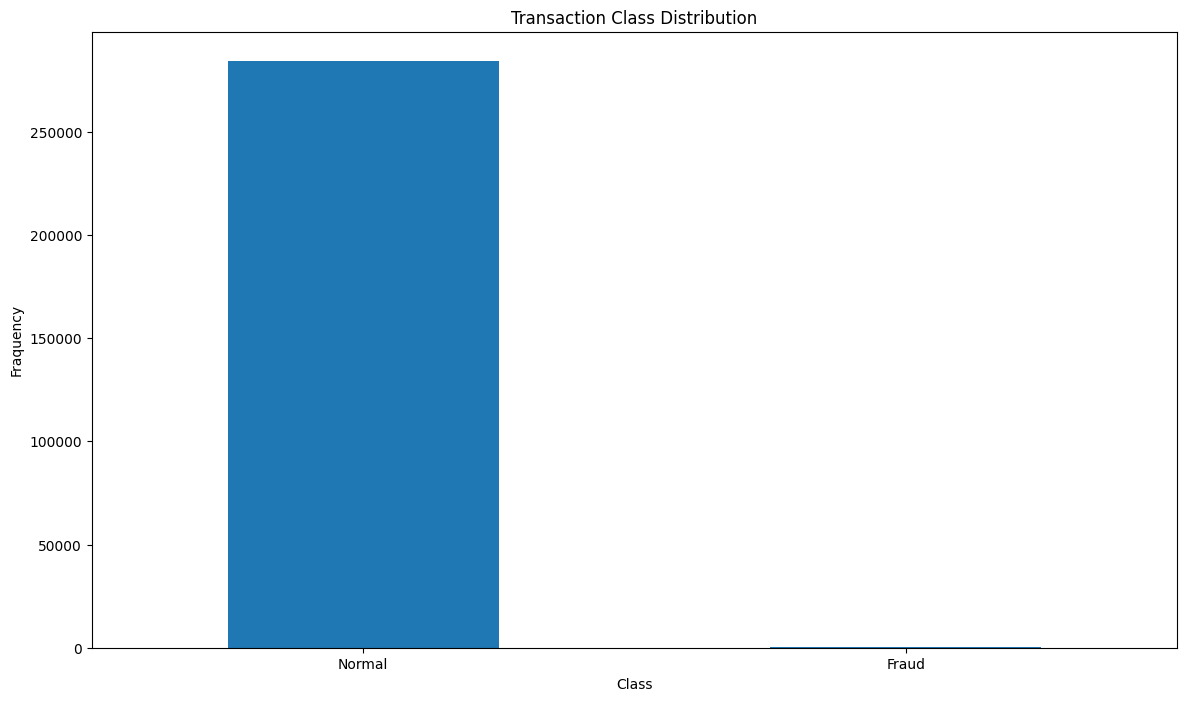

In [ ]:
count_classes.plot(kind="bar", rot=0)
plt.title("Transaction Class Distribution")
# Set labels on x-axis
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Fraquency")

From the above figure we can see that this is an extremely imbalanced dataset

In [ ]:
## separate the Fraud and the Normal dataset for future reference
Fraud = data[data['Class'] == 1]
Normal = data[data['Class'] == 0]

print(Fraud.shape, Normal.shape)

(492, 31) (284315, 31)


In [ ]:
# Statistics of Amount of Fraud Transactions
Fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [ ]:
# Statistics of Amount of Normal Transactions
Normal.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

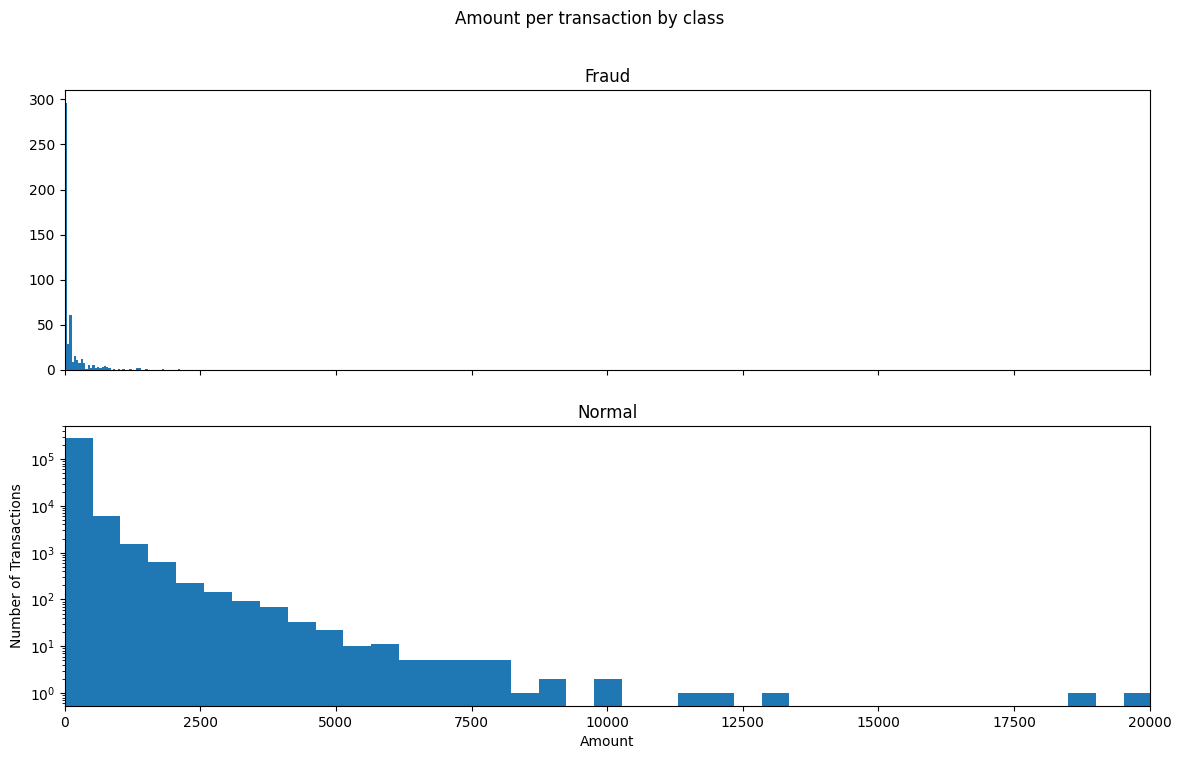

In [ ]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')
ax1.hist(Fraud.Amount, bins=50)
ax1.set_title('Fraud')
ax2.hist(Normal.Amount, bins=50)
ax2.set_title('Normal')
plt.xlabel('Amount')
plt.ylabel('Number of Transactions')
# sets the limit of x-axis unit from 0 to 20000
plt.xlim((0, 20000))
# make the y-axis unit in logarithmic scale
plt.yscale('log')
plt.show()

Now let's check how many fraudulent transaction occur in difference time frame

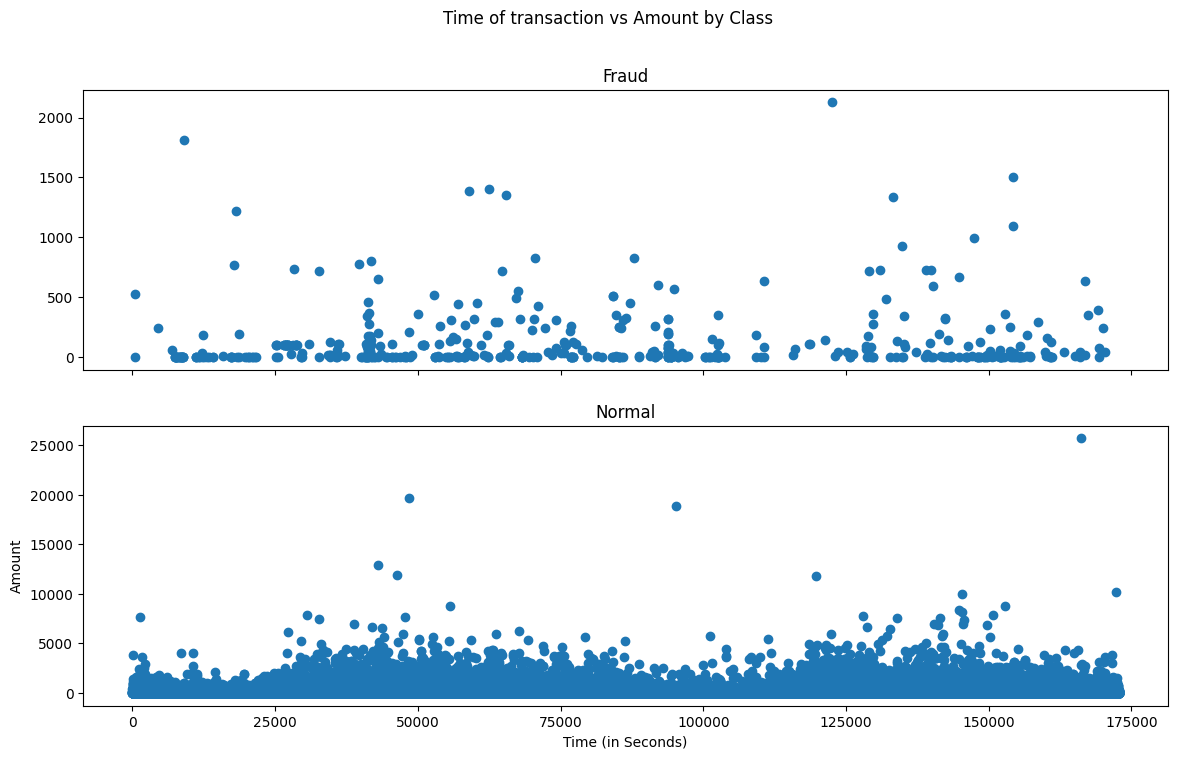

In [ ]:
# Create 2 graphs as 2 rows and 1 common column
# between below two graphs share x-axis as common
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle("Time of transaction vs Amount by Class")

# Plot time against amount for fraud transaction
ax1.scatter(Fraud.Time, Fraud.Amount)
ax1.set_title('Fraud')

# Plot time against amount for Normal transaction
ax2.scatter(Normal.Time, Normal.Amount)
ax2.set_title('Normal')

# Set X-axis label and y axis label and show the result
plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

## Data Sampling

In [ ]:

# Take a sample of data
data_sample = data.sample(frac=0.1, random_state=1)
# data_sample = data

data_sample.shape

(28481, 31)

In [ ]:
# Now we do the rest operation with this sample data to reduce processing
Fraud = data_sample[data_sample['Class']==1]
Valid = data_sample[data_sample['Class']==0]

# Find the ration of Outlier to Normal
outlier_fraction = len(Fraud)/float(len(Valid))

print(outlier_fraction)
print(len(Fraud))
print(len(Valid))

0.0017234102419808666
49
28432


In [ ]:
# Create independent and dependent features

# create a list of column names
columns = data_sample.columns.to_list()

# Filter the columns to remove data we do not want
columns = [c for c in columns if c not in ['Class','V15','V17','V24','V27','Time']]

# Define a random state
# state = np.random.RandomState(42)

X = data_sample[columns]
Y = data_sample['Class']

# print(state)
print(X.columns)
print(X.shape)
print(Y.shape)

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V16', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23',
       'V25', 'V26', 'V28', 'Amount'],
      dtype='object')
(28481, 25)
(28481,)


## Scaling

In [ ]:
##### here we are going to use min max scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_scaled = scaler.fit(X)
X_scaled = data_scaled.transform(X)

In [ ]:
X_scaled

array([[9.29498718e-01, 7.74794449e-01, 8.82407521e-01, ...,
        4.12739768e-01, 3.93704186e-01, 9.10638856e-05],
       [9.24765464e-01, 8.00659204e-01, 9.23629134e-01, ...,
        4.62584143e-01, 3.87232946e-01, 1.00729885e-04],
       [9.36343571e-01, 7.98175390e-01, 9.13609189e-01, ...,
        4.69847331e-01, 3.88555792e-01, 4.52775744e-05],
       ...,
       [9.36405459e-01, 7.97379056e-01, 9.27956944e-01, ...,
        3.67421101e-01, 3.91497770e-01, 9.97124111e-04],
       [8.60268518e-01, 8.35101773e-01, 8.14745122e-01, ...,
        4.54496116e-01, 3.98982561e-01, 4.68037848e-05],
       [9.72059154e-01, 7.87137641e-01, 8.61865994e-01, ...,
        4.78382054e-01, 3.85550098e-01, 9.83896954e-04]])

In [ ]:
Y.shape

(28481,)

## Method to find min_sample

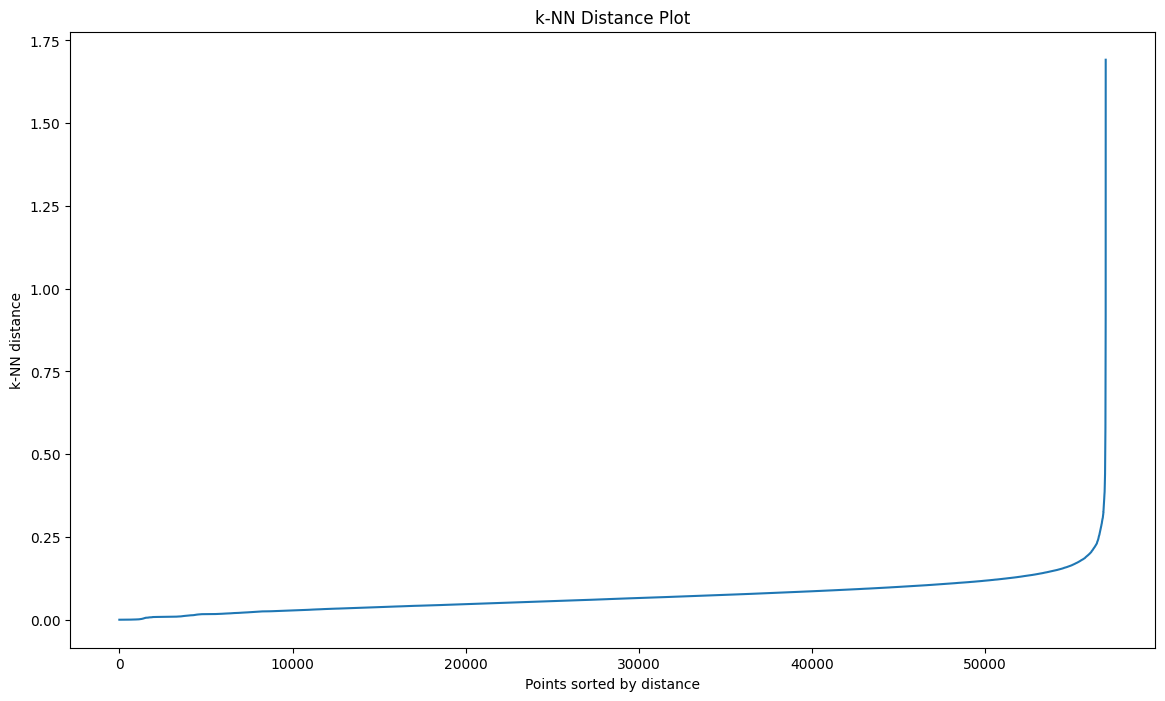

In [ ]:
from sklearn.neighbors import NearestNeighbors


# Step 1: Calculate the k-nearest neighbors
k = 4  # k is usually set to min_samples - 1
nearest_neighbors = NearestNeighbors(n_neighbors=k)
neighbors = nearest_neighbors.fit(X_scaled)
distances, indices = neighbors.kneighbors(X_scaled)

# Step 2: Sort the distances (4th column)
distances = np.sort(distances[:, k-1], axis=0)

# Step 3: Plot the distances
plt.plot(distances)
plt.ylabel('k-NN distance')
plt.xlabel('Points sorted by distance')
plt.title('k-NN Distance Plot')
plt.show()

# The "elbow" point is a good candidate for `eps`

## DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
# Create DBSCAN object
dbscan = DBSCAN(eps=0.25, min_samples=5)

In [ ]:
# Fitting the model
model = dbscan.fit(X_scaled)

In [ ]:
# classification result as labels
labels = model.labels_

In [ ]:
# Find unique values
unique_values = np.unique(labels)

# Print unique values
print(unique_values)

[-1  0  1  2]


Can't really plot because this cannot be represented in 2D

### Conclusion

In [ ]:
outlier_indices = np.where(labels == -1)[0]
print(len(outlier_indices))

277


In [ ]:
"""ONLY RUN THIS ONCE"""
#Reshape the prediction values to 0 for Valid transactions , 1 for Fraud transactions
prediction = np.where(labels == -1, 1, 0)

In [ ]:
class_names=np.array(['0','1']) # Binary label
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56874
           1       0.19      0.62      0.30        87

    accuracy                           1.00     56961
   macro avg       0.60      0.81      0.65     56961
weighted avg       1.00      1.00      1.00     56961



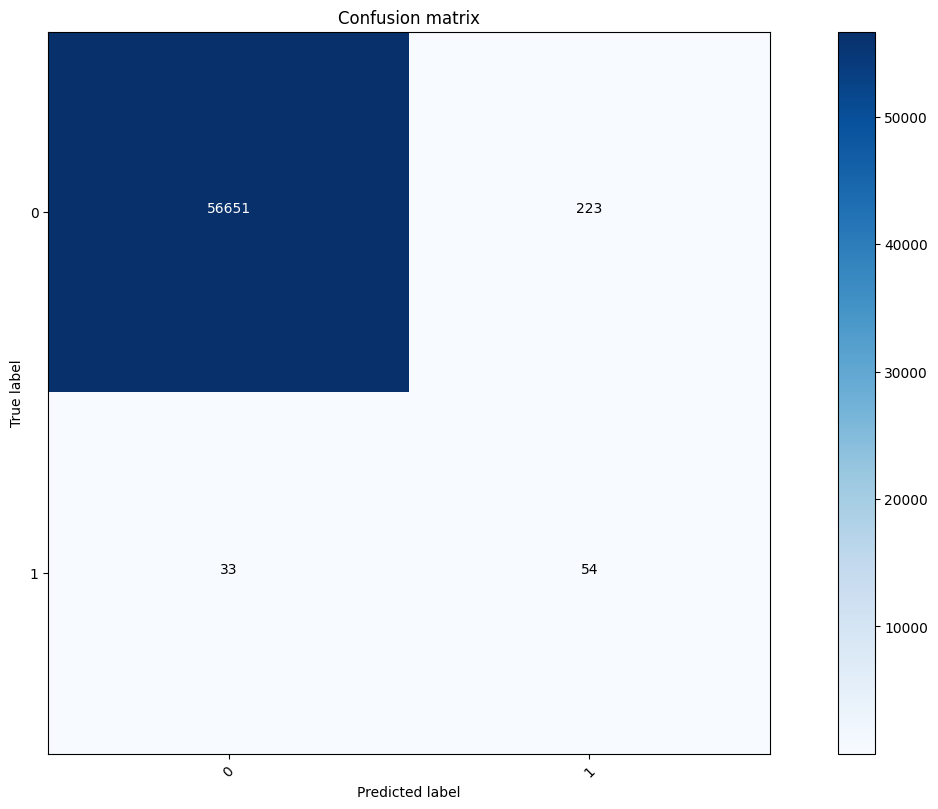

In [ ]:
### classification report
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(Y, prediction))
cm = confusion_matrix(Y, prediction)
plot_confusion_matrix(cm,class_names)

In [ ]:
### classification report
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(Y, prediction))
print(confusion_matrix(Y, prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56874
           1       0.19      0.62      0.30        87

    accuracy                           1.00     56961
   macro avg       0.60      0.81      0.65     56961
weighted avg       1.00      1.00      1.00     56961

[[56651   223]
 [   33    54]]


## OPTICS Based

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import OPTICS
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
data_sample

Time        V1        V2        V3        V4        V5        V6  \
169876  119907.0 -0.611712 -0.769705 -0.149759 -0.224877  2.028577 -2.019887   
127467   78340.0 -0.814682  1.319219  1.329415  0.027273 -0.284871 -0.653985   
137900   82382.0 -0.318193  1.118618  0.969864 -0.127052  0.569563 -0.532484   
21513    31717.0 -1.328271  1.018378  1.775426 -1.574193 -0.117696 -0.457733   
134700   80923.0  1.276712  0.617120 -0.578014  0.879173  0.061706 -1.472002   
...          ...       ...       ...       ...       ...       ...       ...   
2032      1574.0 -0.615776  0.654356  2.618793  0.857434 -0.487340  0.593957   
240932  150813.0 -3.517229  3.326821 -3.590262  0.674769 -0.679266 -0.469516   
3701      3169.0 -0.315540  1.054303  1.484711  1.138262  0.394713 -0.168883   
153365   98752.0 -3.580417  4.100916 -2.577720 -1.476718 -0.006201 -2.008418   
97365    66187.0  1.213349  0.227172 -0.886860  1.345683  2.254592  3.788565   

              V7        V8        V9  ...       V21       V22       V23  \
169876  0.292491 -0.523020  0.358468  ... -0.075208  0.045536  0.380739   
127467  0.321552  0.435975 -0.704298  ... -0.128619 -0.368565  0.090660   
137900  0.706252 -0.064966 -0.463271  ... -0.305402 -0.774704 -0.123884   
21513   0.681867 -0.031641  0.383872  ... -0.220815 -0.419013 -0.239197   
134700  0.373692 -0.287204 -0.084482  ... -0.160161 -0.430404 -0.076738   
...          ...       ...       ...  ...       ...       ...       ...   
2032   -0.095191  0.426786  0.011607  ...  0.010440  0.113631 -0.313035   
240932 -1.135362  2.778095 -2.404956  ...  0.455767  0.388102  0.268986   
3701    0.737923 -0.061284 -0.952381  ...  0.005626  0.094740  0.024370   
153365  0.887262  0.304192  2.879710  ... -0.194866  0.571678 -0.001519   
97365  -0.521816  0.891366 -0.776104  ...  0.102366  0.116553 -0.166854   

             V24       V25       V26       V27       V28  Amount  Class  
169876  0.023440 -2.220686 -0.201146  0.066501  0.221180    1.79      0  
127467  0.401147 -0.261034  0.080621  0.162427  0.059456    1.98      0  
137900 -0.495687 -0.018148  0.121679  0.249050  0.092516    0.89      0  
21513   0.009967  0.232829  0.814177  0.098797 -0.004273   15.98      0  
134700  0.258708  0.552170  0.370701 -0.034255  0.041709    0.76      0  
...          ...       ...       ...       ...       ...     ...    ...  
2032   -0.015388  0.213878 -0.268579  0.117815  0.075734    9.99      0  
240932  0.382692 -0.653335  2.192962 -0.953907 -0.137082    0.76      0  
3701    0.091800 -0.463470 -0.457328  0.194541  0.166039   19.60      0  
153365  0.009117  0.321669  0.034900  0.785417  0.353092    0.92      0  
97365   1.015984  0.755462  0.169925 -0.005633  0.017400   19.34      0  

[28481 rows x 31 columns]

In [ ]:
# Features and labels
X = data_sample.drop(columns=['Class'])
y = data_sample['Class']

In [ ]:
# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Apply the OPTICS algorithm
optics = OPTICS(min_samples=10, xi=0.05, min_cluster_size=0.1)
optics.fit(X_scaled)

OPTICS(min_cluster_size=0.1, min_samples=10)

In [ ]:
# Create labels for the detected clusters
labels = optics.labels_

In [ ]:
# Label anomalies as 1 and normal points as 0
# Noise points are labeled as -1 in OPTICS
anomalies = (labels == -1).astype(int)

In [ ]:

# Generate confusion matrix and classification report
conf_matrix = confusion_matrix(y, anomalies)
class_report = classification_report(y, anomalies, target_names=['Non-Fraud', 'Fraud'])

print(conf_matrix)
print(class_report)

[[28403    29]
 [   46     3]]
              precision    recall  f1-score   support

   Non-Fraud       1.00      1.00      1.00     28432
       Fraud       0.09      0.06      0.07        49

    accuracy                           1.00     28481
   macro avg       0.55      0.53      0.54     28481
weighted avg       1.00      1.00      1.00     28481



## GMM

# Import

In [ ]:
# Data processing
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Model
from sklearn.mixture import GaussianMixture

# Load Dataset

# Sampling Dataset

In [ ]:

# Take a sample of data
data_sample = data.sample(frac=0.1, random_state=1)

data_sample.shape

(28481, 31)

In [ ]:

# Count fraudulent transactions (Class = 1)
num_fraudulent = data_sample['Class'].value_counts().get(1, 0)

# Count normal transactions (Class = 0)
num_normal = data_sample['Class'].value_counts().get(0, 0)

# Calculate the ratio
if num_normal > 0:
    ratio = num_fraudulent / num_normal
else:
    ratio = float('inf')  # Avoid division by zero if there are no normal transactions

print(f'Number of fraudulent transactions: {num_fraudulent}')
print(f'Number of normal transactions: {num_normal}')
print(f'Ratio of fraudulent to normal transactions: {ratio: f}')

Number of fraudulent transactions: 49
Number of normal transactions: 28432
Ratio of fraudulent to normal transactions:  0.001723


# Format Data

In [ ]:
y = data_sample['Class']
X = data_sample.drop(['Time', 'Class'], axis=1)

In [ ]:
len(data_sample[data_sample['Class']==1])

49

# Normalize and scale

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Declare Model

In [ ]:
# Define the range for n_components
n_components_range = range(1, 11)

# Lists to store the BIC and AIC scores
bic_scores = []
aic_scores = []

# Fit GMM for each n_components and calculate BIC and AIC
for n_components in n_components_range:
    gmm = GaussianMixture(n_components=n_components, n_init=5, random_state=42)
    gmm.fit(X_scaled)
    bic_scores.append(gmm.bic(X_scaled))
    aic_scores.append(gmm.aic(X_scaled))

In [ ]:
bic_scores

[2274864.32825385,
 616635.9330906983,
 -827966.8303762106,
 -1002366.490664897,
 -1127474.0523218268,
 -1235496.1383527063,
 -1564334.9994071915,
 -1442879.7223956347,
 -1647161.9536431676,
 -1791326.4751689136]

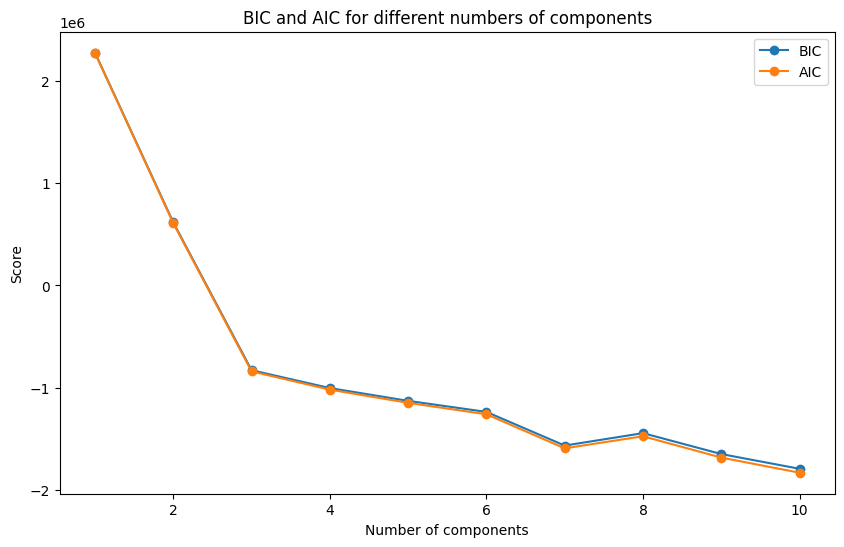

In [ ]:
# Plot BIC and AIC scores
plt.figure(figsize=(10, 6))
plt.plot(n_components_range, bic_scores, label='BIC', marker='o')
plt.plot(n_components_range, aic_scores, label='AIC', marker='o')
plt.xlabel('Number of components')
plt.ylabel('Score')
plt.title('BIC and AIC for different numbers of components')
plt.legend()
plt.show()

In [ ]:
# Fit GMM model
gmm = GaussianMixture(n_components=6, n_init=5, random_state=42)
y_gmm = gmm.fit(X_scaled)

In [ ]:
data_sample

Time        V1        V2        V3        V4        V5        V6  \
169876  119907.0 -0.611712 -0.769705 -0.149759 -0.224877  2.028577 -2.019887   
127467   78340.0 -0.814682  1.319219  1.329415  0.027273 -0.284871 -0.653985   
137900   82382.0 -0.318193  1.118618  0.969864 -0.127052  0.569563 -0.532484   
21513    31717.0 -1.328271  1.018378  1.775426 -1.574193 -0.117696 -0.457733   
134700   80923.0  1.276712  0.617120 -0.578014  0.879173  0.061706 -1.472002   
...          ...       ...       ...       ...       ...       ...       ...   
2032      1574.0 -0.615776  0.654356  2.618793  0.857434 -0.487340  0.593957   
240932  150813.0 -3.517229  3.326821 -3.590262  0.674769 -0.679266 -0.469516   
3701      3169.0 -0.315540  1.054303  1.484711  1.138262  0.394713 -0.168883   
153365   98752.0 -3.580417  4.100916 -2.577720 -1.476718 -0.006201 -2.008418   
97365    66187.0  1.213349  0.227172 -0.886860  1.345683  2.254592  3.788565   

              V7        V8        V9  ...       V23       V24       V25  \
169876  0.292491 -0.523020  0.358468  ...  0.380739  0.023440 -2.220686   
127467  0.321552  0.435975 -0.704298  ...  0.090660  0.401147 -0.261034   
137900  0.706252 -0.064966 -0.463271  ... -0.123884 -0.495687 -0.018148   
21513   0.681867 -0.031641  0.383872  ... -0.239197  0.009967  0.232829   
134700  0.373692 -0.287204 -0.084482  ... -0.076738  0.258708  0.552170   
...          ...       ...       ...  ...       ...       ...       ...   
2032   -0.095191  0.426786  0.011607  ... -0.313035 -0.015388  0.213878   
240932 -1.135362  2.778095 -2.404956  ...  0.268986  0.382692 -0.653335   
3701    0.737923 -0.061284 -0.952381  ...  0.024370  0.091800 -0.463470   
153365  0.887262  0.304192  2.879710  ... -0.001519  0.009117  0.321669   
97365  -0.521816  0.891366 -0.776104  ... -0.166854  1.015984  0.755462   

             V26       V27       V28  Amount  Class      score  \
169876 -0.201146  0.066501  0.221180    1.79      0 -25.278972   
127467  0.080621  0.162427  0.059456    1.98      0  13.893031   
137900  0.121679  0.249050  0.092516    0.89      0  14.206917   
21513   0.814177  0.098797 -0.004273   15.98      0  10.331352   
134700  0.370701 -0.034255  0.041709    0.76      0  70.745910   
...          ...       ...       ...     ...    ...        ...   
2032   -0.268579  0.117815  0.075734    9.99      0  12.849724   
240932  2.192962 -0.953907 -0.137082    0.76      0 -34.794721   
3701   -0.457328  0.194541  0.166039   19.60      0  13.394998   
153365  0.034900  0.785417  0.353092    0.92      0 -44.452282   
97365   0.169925 -0.005633  0.017400   19.34      0  63.767579   

        predicted_class  
169876                0  
127467                0  
137900                0  
21513                 0  
134700                0  
...                 ...  
2032                  0  
240932                0  
3701                  0  
153365                0  
97365                 0  

[28481 rows x 33 columns]

In [ ]:
# Compute scores
score = gmm.score_samples(X_scaled)
data_sample['score'] = score

In [ ]:
# Determine threshold for anomalies
threshold = np.percentile(score, 0.3)
print(f'The threshold of the score is {threshold:.2f}')

The threshold of the score is -79.78


In [ ]:
from sklearn.metrics import roc_curve, f1_score

In [ ]:
# # ROC Curve Method
# fpr, tpr, thresholds = roc_curve(y, score, pos_label=1)
# optimal_idx = np.argmax(tpr - fpr)
# threshold = thresholds[optimal_idx]
# print(f'The optimal threshold based on Youden\'s J statistic is {threshold:.2f}')

In [ ]:
# Assign anomaly labels based on the threshold
data_sample['predicted_class'] = (data_sample['score'] < threshold).astype(int)

In [ ]:
len(data_sample[data_sample['predicted_class']==1])

86

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y, data_sample['predicted_class'])
print('Confusion Matrix:')
print(conf_matrix)

Confusion Matrix:
[[28367    65]
 [   28    21]]


In [ ]:
# Generate classification report
class_report = classification_report(y, data_sample['predicted_class'])
print('Classification Report:')
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.24      0.43      0.31        49

    accuracy                           1.00     28481
   macro avg       0.62      0.71      0.65     28481
weighted avg       1.00      1.00      1.00     28481



## Histogram-Based Outlier Detection

# Method 1

## Imports

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

## Load dataset

In [ ]:
# Separate features and the Class column
data_features = data.drop(columns=['Class', 'Time'])
data_class = data['Class']

In [ ]:
data_features.head()

V1        V2        V3        V4        V5        V6        V7  \
0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10  ...       V20       V21       V22       V23  \
0  0.098698  0.363787  0.090794  ...  0.251412 -0.018307  0.277838 -0.110474   
1  0.085102 -0.255425 -0.166974  ... -0.069083 -0.225775 -0.638672  0.101288   
2  0.247676 -1.514654  0.207643  ...  0.524980  0.247998  0.771679  0.909412   
3  0.377436 -1.387024 -0.054952  ... -0.208038 -0.108300  0.005274 -0.190321   
4 -0.270533  0.817739  0.753074  ...  0.408542 -0.009431  0.798278 -0.137458   

        V24       V25       V26       V27       V28  Amount  
0  0.066928  0.128539 -0.189115  0.133558 -0.021053  149.62  
1 -0.339846  0.167170  0.125895 -0.008983  0.014724    2.69  
2 -0.689281 -0.327642 -0.139097 -0.055353 -0.059752  378.66  
3 -1.175575  0.647376 -0.221929  0.062723  0.061458  123.50  
4  0.141267 -0.206010  0.502292  0.219422  0.215153   69.99  

[5 rows x 29 columns]

## Feature Analysis

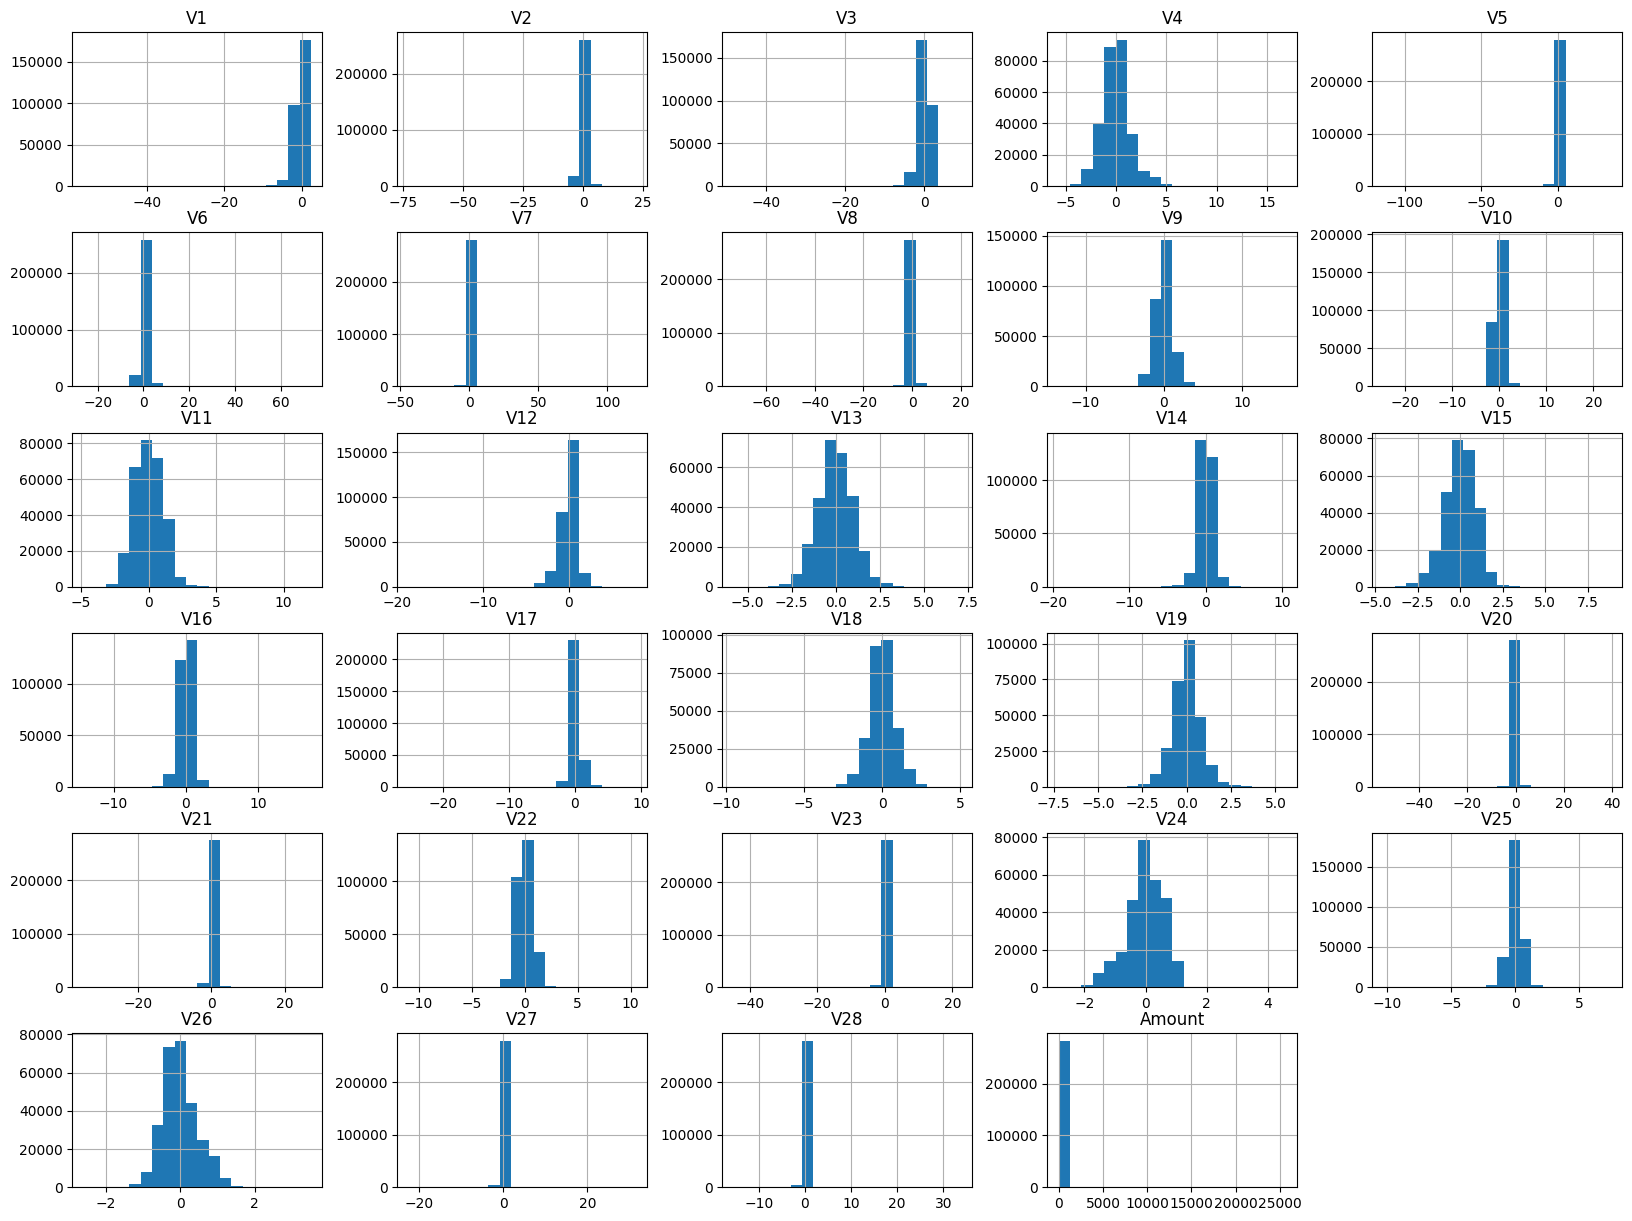

In [ ]:
# Plot histograms for each feature
data_features.hist(bins=20, figsize=(20, 15))
plt.show()

## Anomaly Detection

In [ ]:
# Number of bins
num_bins = 30

# Function to compute histogram and detect anomalies
def detect_anomalies_with_histogram(feature_data, bin_threshold=0.0005):
    # Compute the histogram
    hist, bin_edges = np.histogram(feature_data, bins=num_bins)

    # Determine the total number of data points
    total_points = len(feature_data)

    # Identify bins with low counts as anomalies (e.g., bins with less than bin_threshold percentage of total points)
    anomaly_bins = np.where(hist < bin_threshold * total_points)[0]

    # Collect indices of data points in the anomaly bins
    anomaly_indices = []
    for bin_idx in anomaly_bins:
        # Get indices of data points in this bin
        bin_start = bin_edges[bin_idx]
        bin_end = bin_edges[bin_idx + 1]
        bin_indices = np.where((feature_data >= bin_start) & (feature_data < bin_end))[0]
        anomaly_indices.extend(bin_indices)

    return np.unique(anomaly_indices)

In [ ]:
# Dictionary to hold anomalies for each feature
anomalies_dict = {}

# Detect anomalies for each feature
for feature in data_features.columns:
    anomalies = detect_anomalies_with_histogram(data_features[feature])
    anomalies_dict[feature] = anomalies

# Display anomalies for each feature
# anomalies_dict

## Identify and Count Anomalies

In [ ]:
# Count anomalies for each feature
anomaly_counts = {feature: len(anomalies) for feature, anomalies in anomalies_dict.items()}
anomaly_counts

{'V1': 318,
 'V2': 357,
 'V3': 411,
 'V4': 296,
 'V5': 244,
 'V6': 344,
 'V7': 353,
 'V8': 362,
 'V9': 293,
 'V10': 543,
 'V11': 419,
 'V12': 458,
 'V13': 58,
 'V14': 631,
 'V15': 133,
 'V16': 303,
 'V17': 557,
 'V18': 404,
 'V19': 174,
 'V20': 313,
 'V21': 334,
 'V22': 306,
 'V23': 338,
 'V24': 399,
 'V25': 312,
 'V26': 354,
 'V27': 252,
 'V28': 304,
 'Amount': 203}

In [ ]:
# Initialize an array to hold anomaly flags for each row
num_rows = len(data_features)
anomaly_flags = np.zeros(num_rows, dtype=int)

# Update anomaly flags based on anomalies in each feature
for anomalies in anomalies_dict.values():
    anomaly_flags[anomalies] = 1

anomaly_flags

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
# Count the number of anomalies found
num_anomalies_found = anomaly_flags.sum()

# Display the number of anomalies found
num_anomalies_found

4029

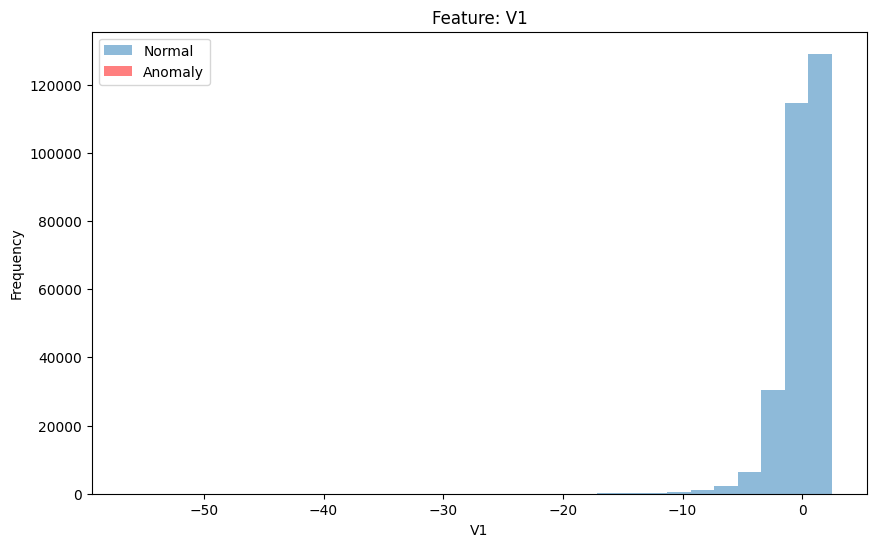

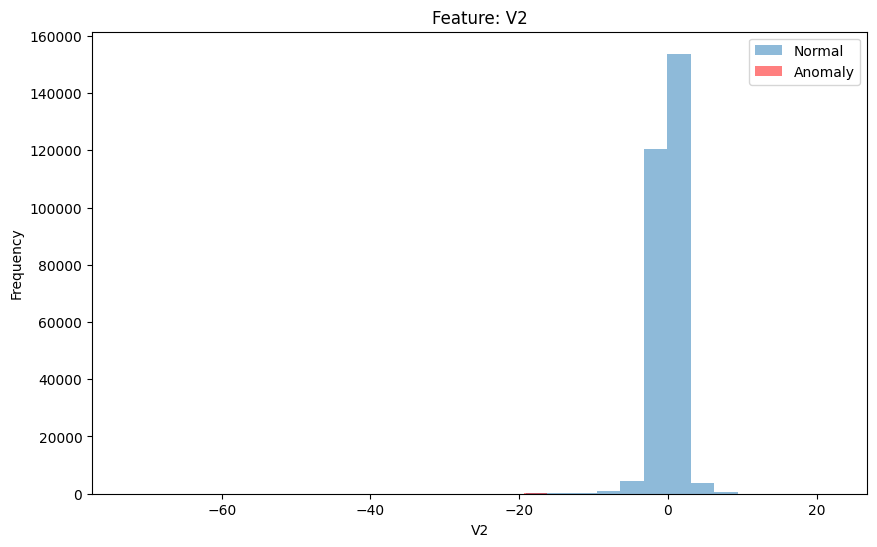

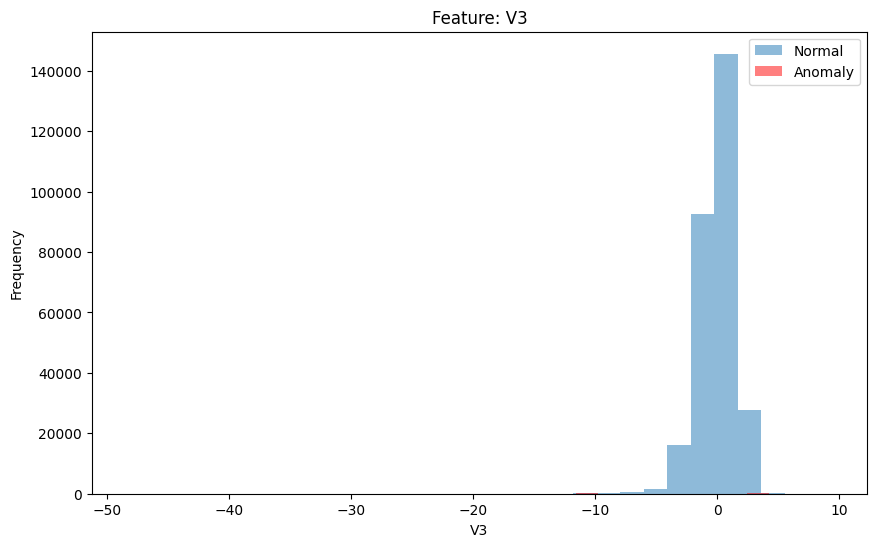

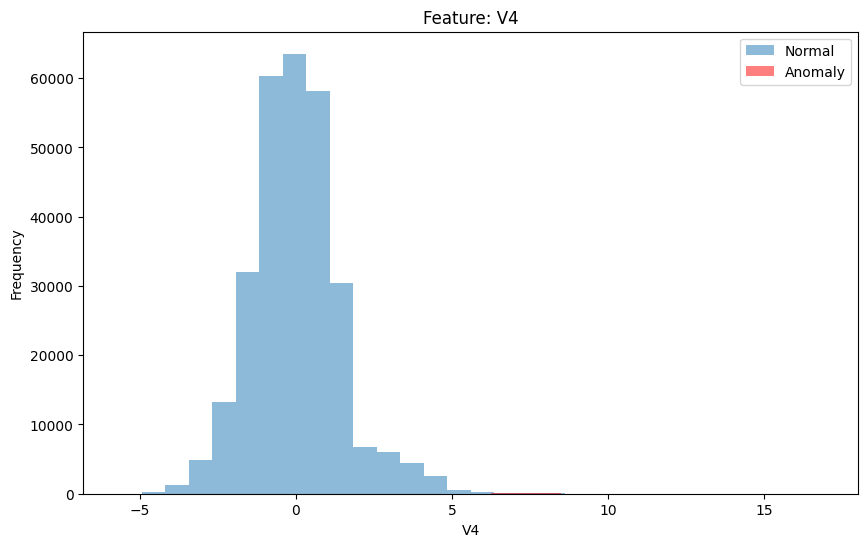

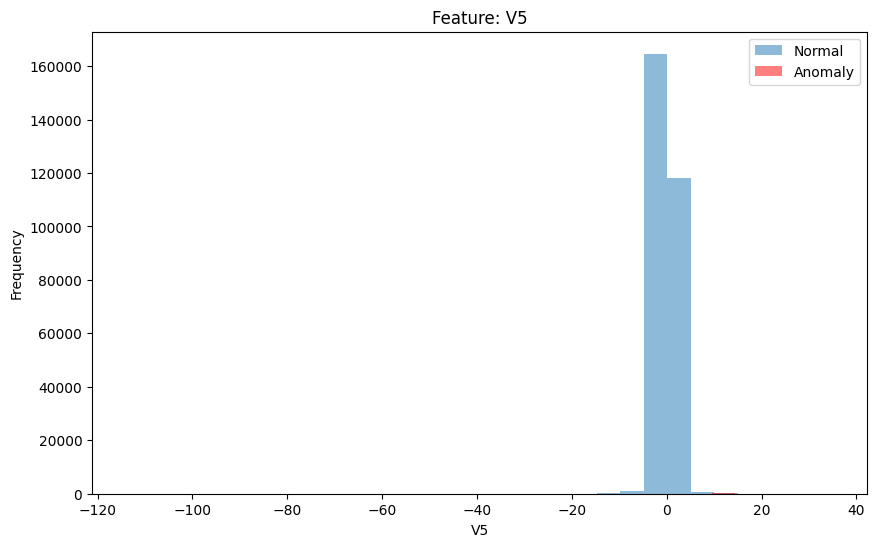

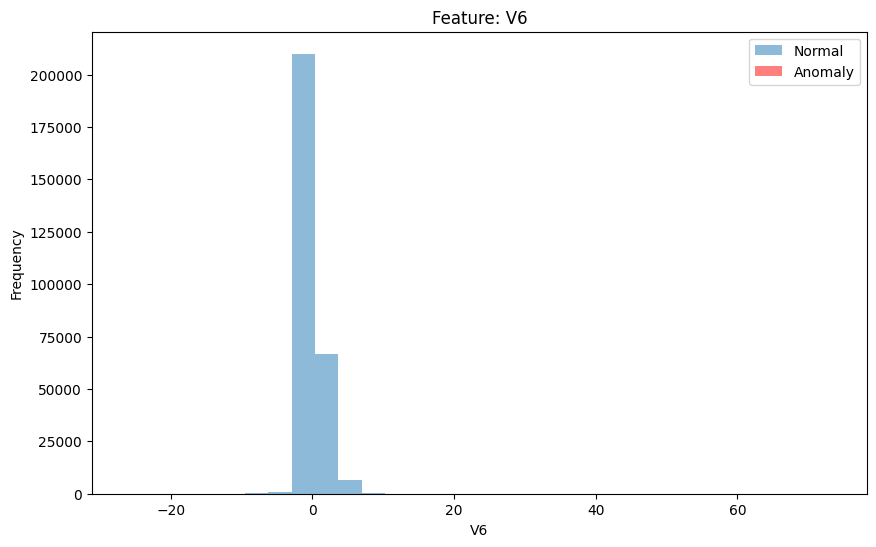

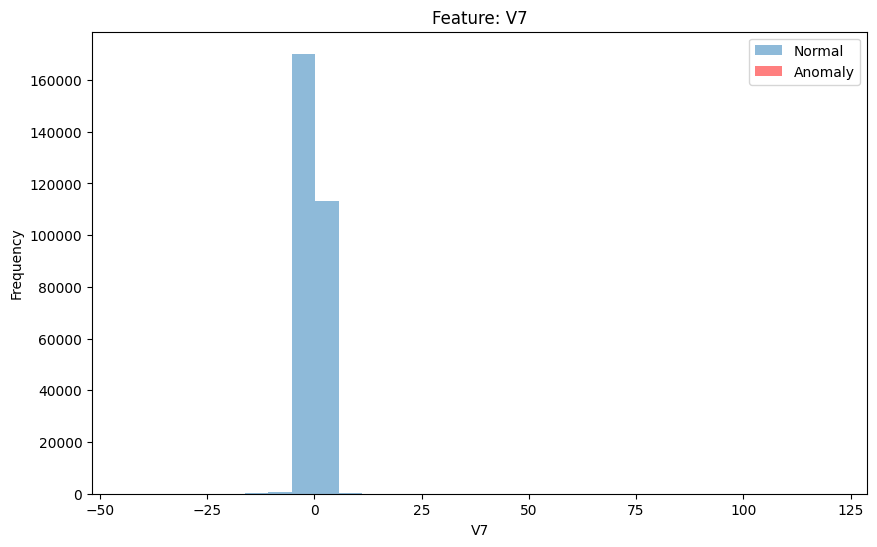

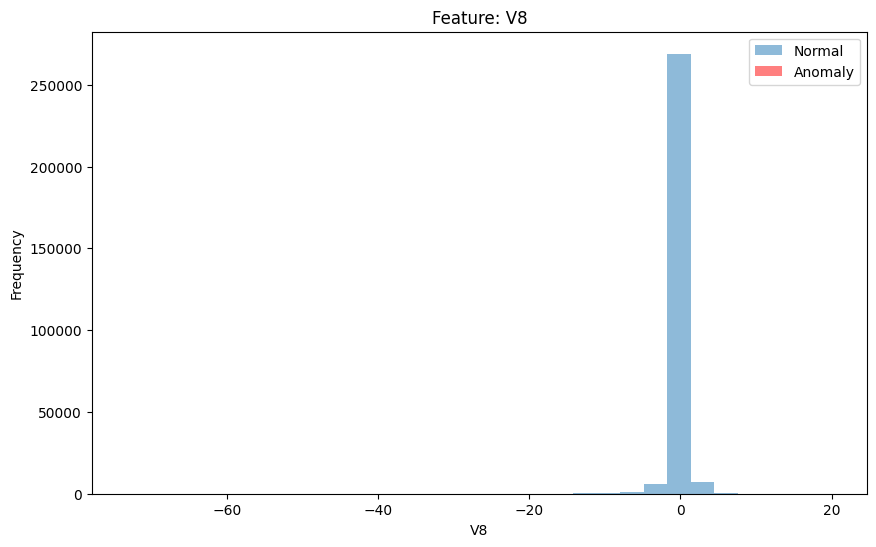

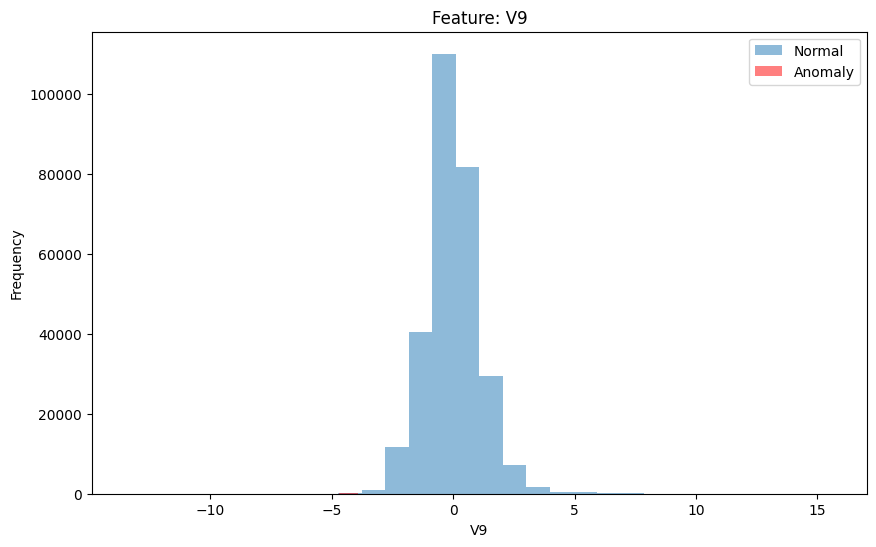

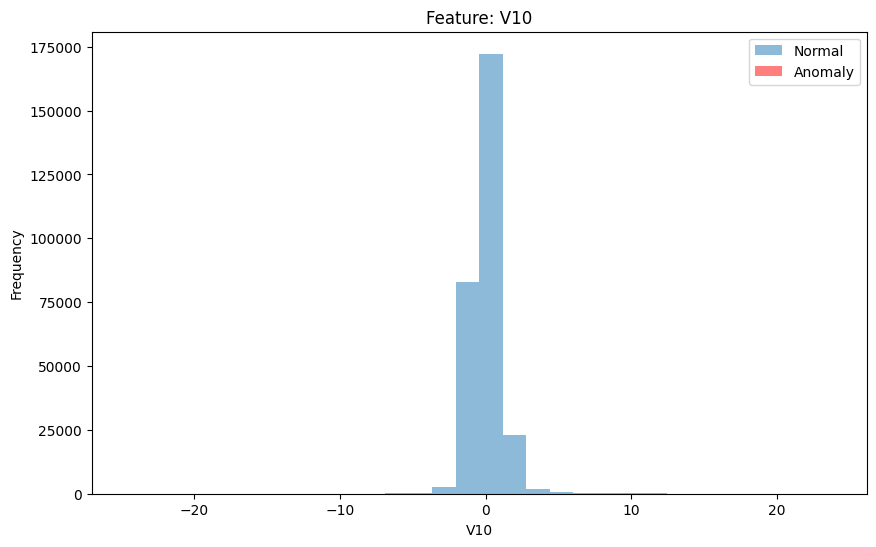

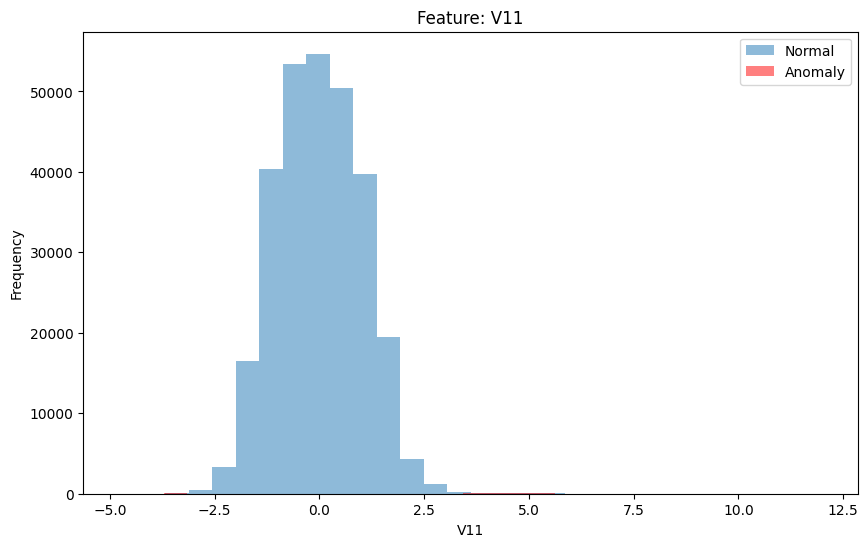

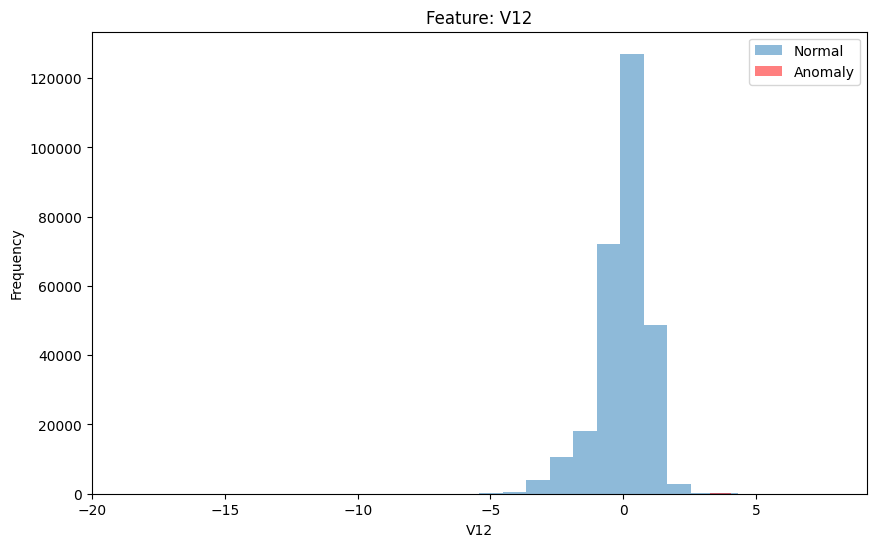

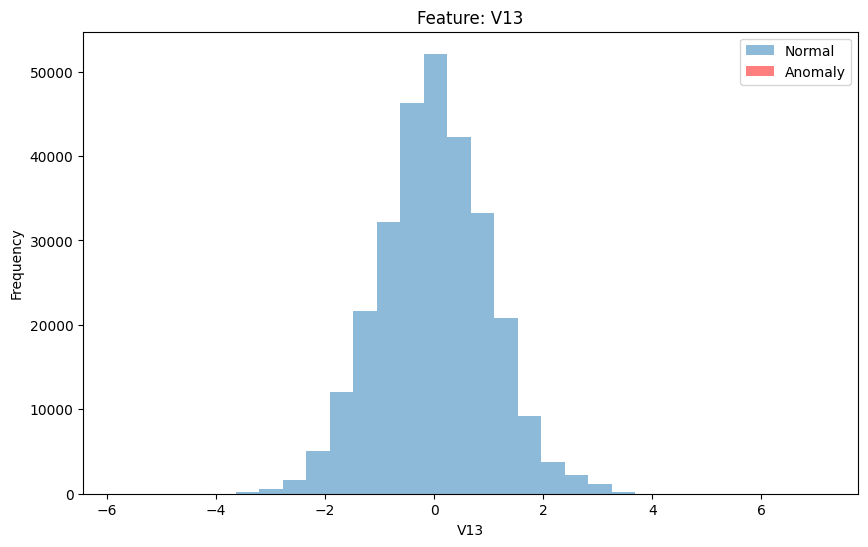

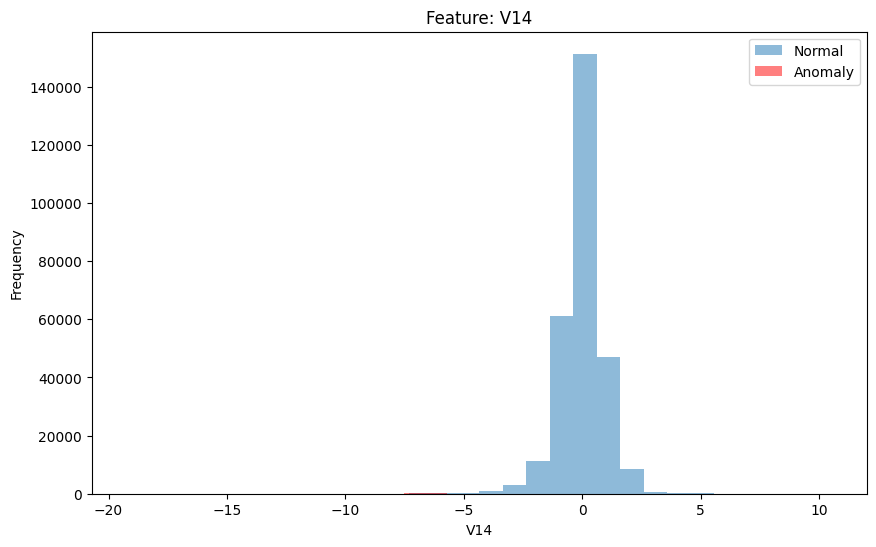

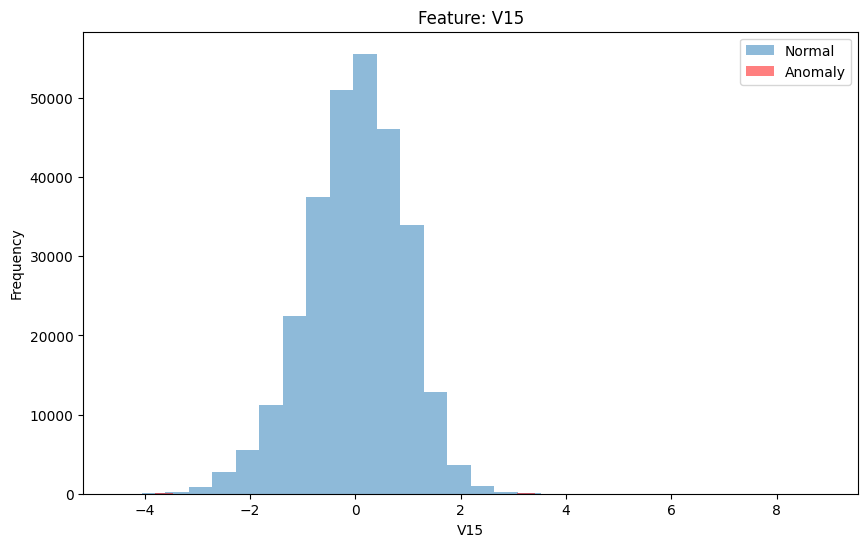

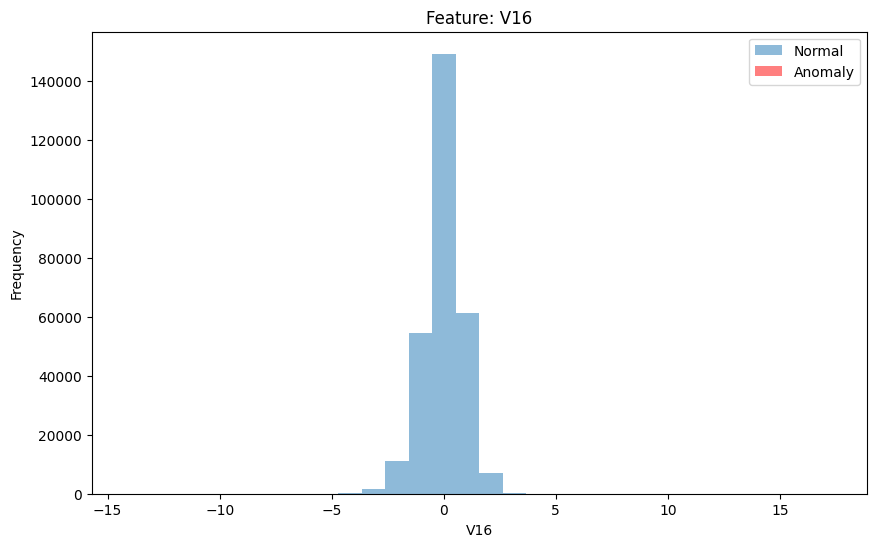

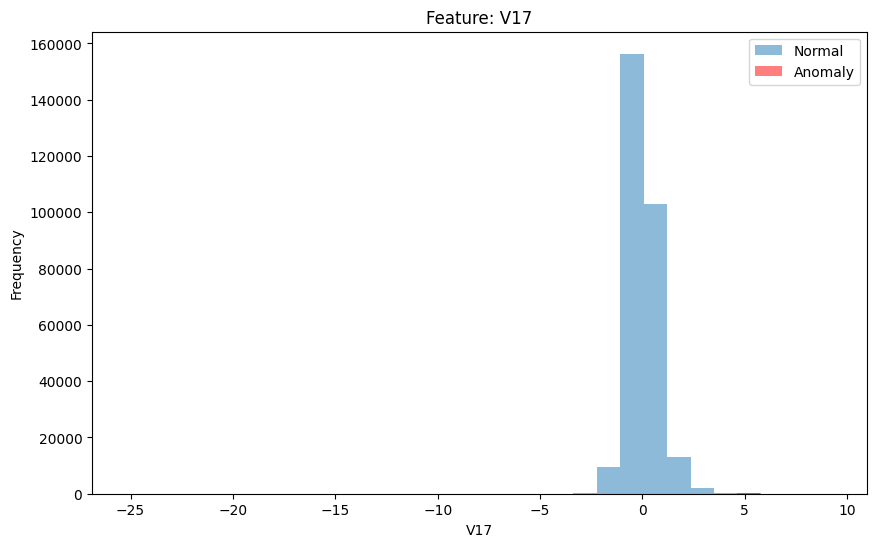

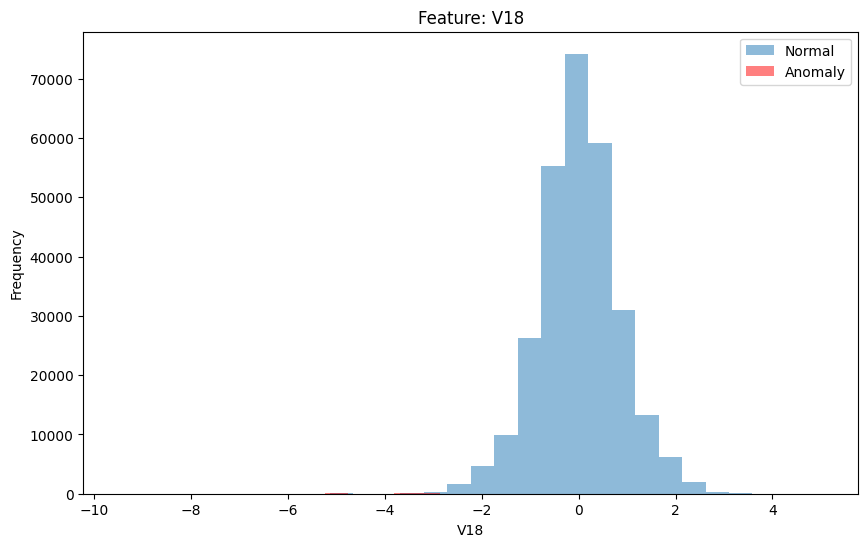

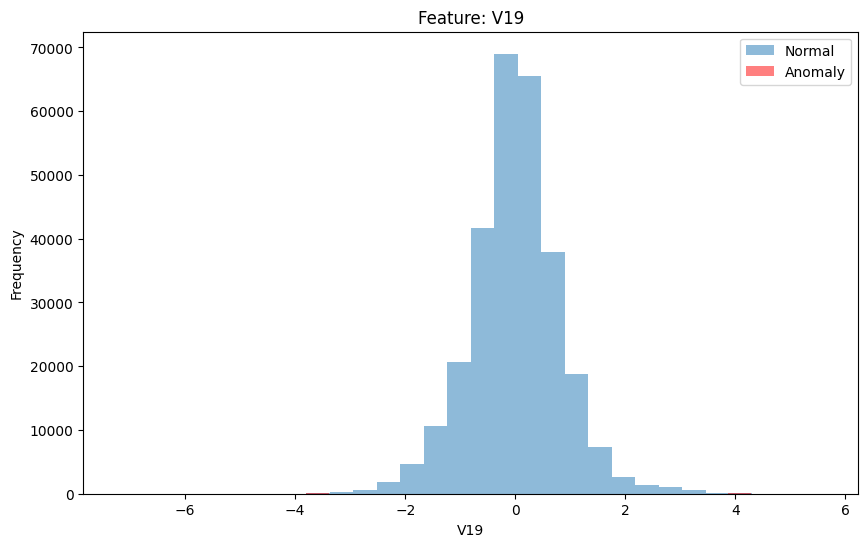

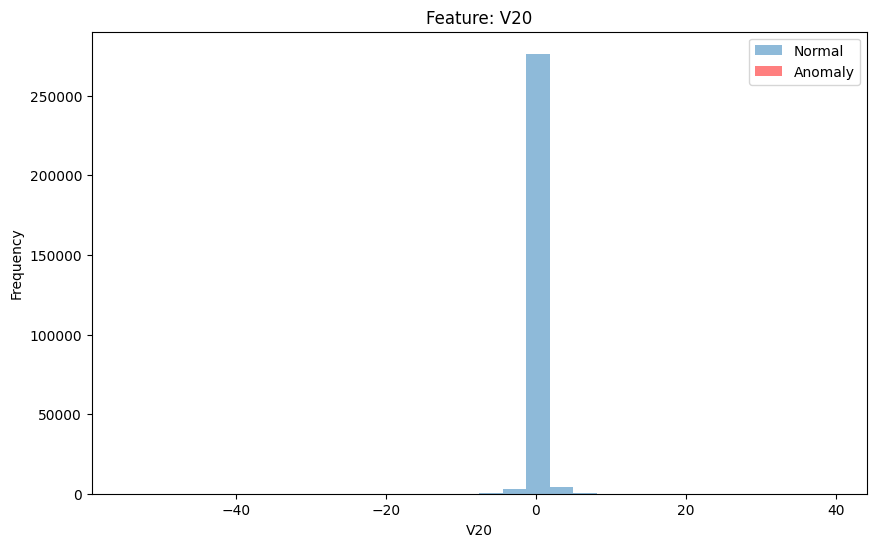

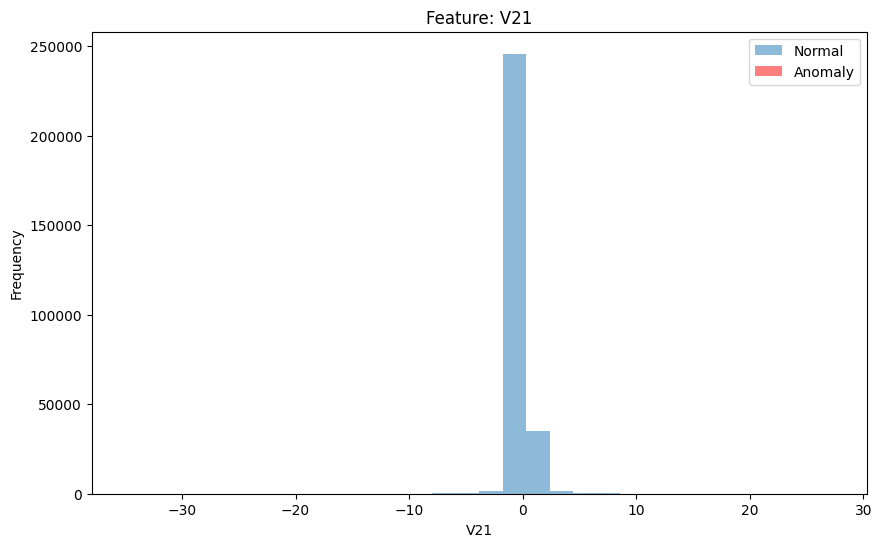

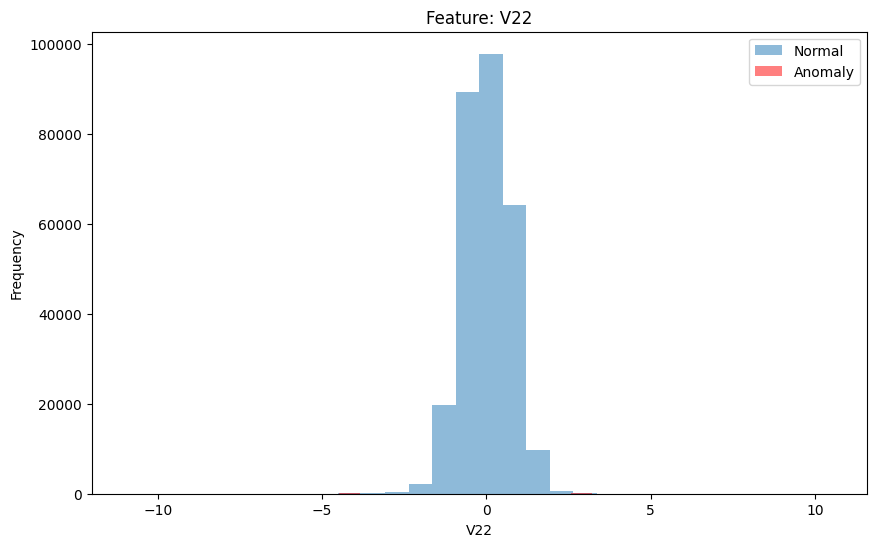

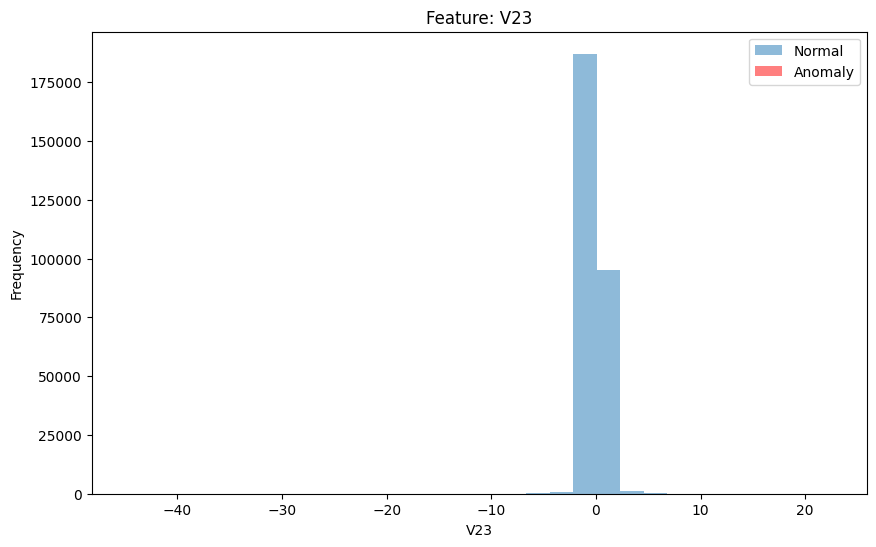

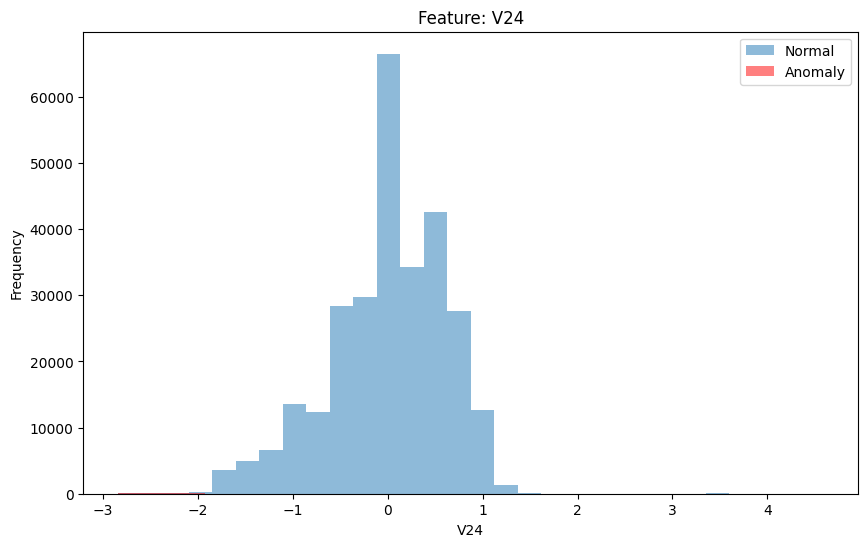

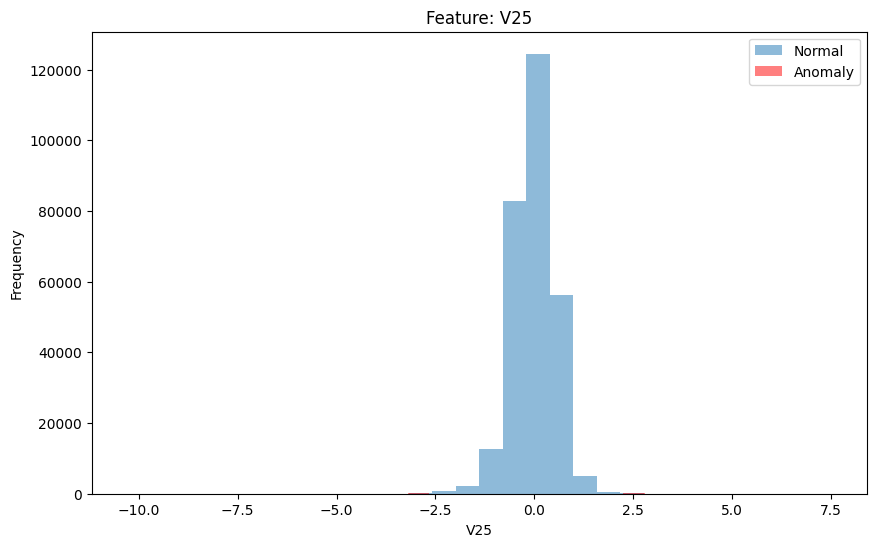

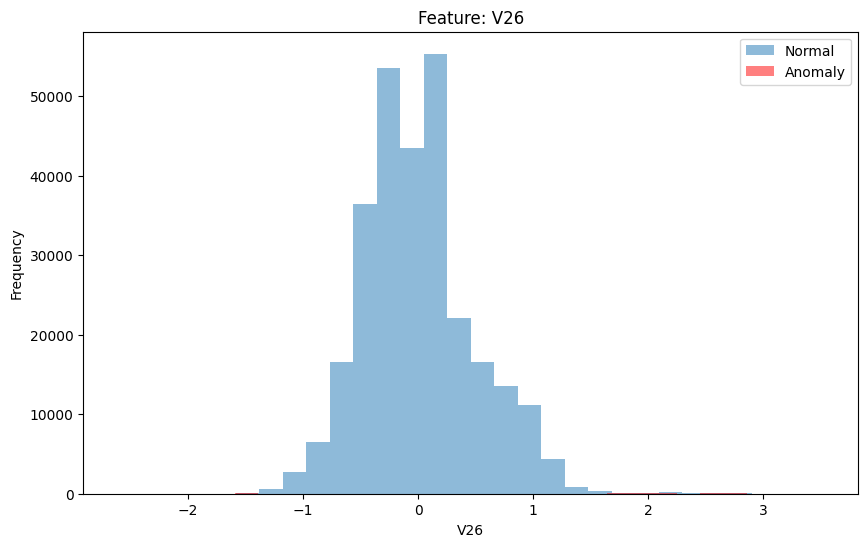

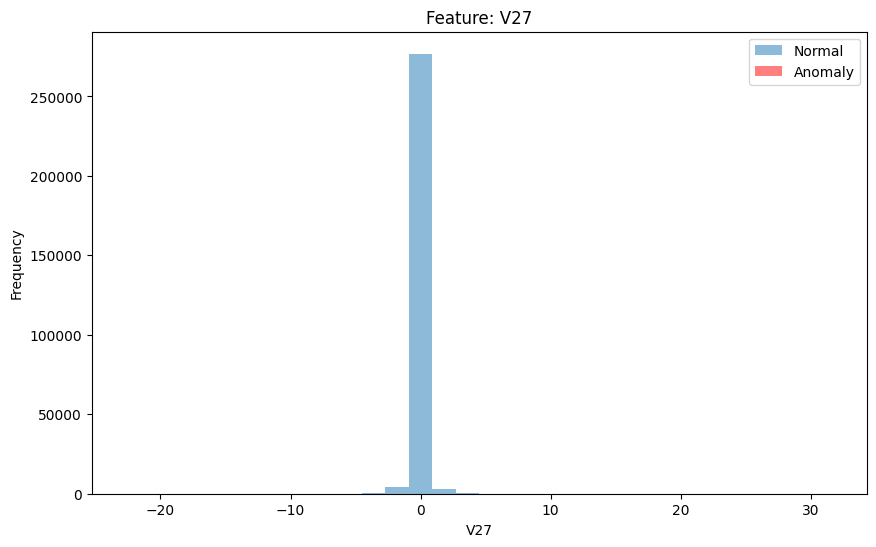

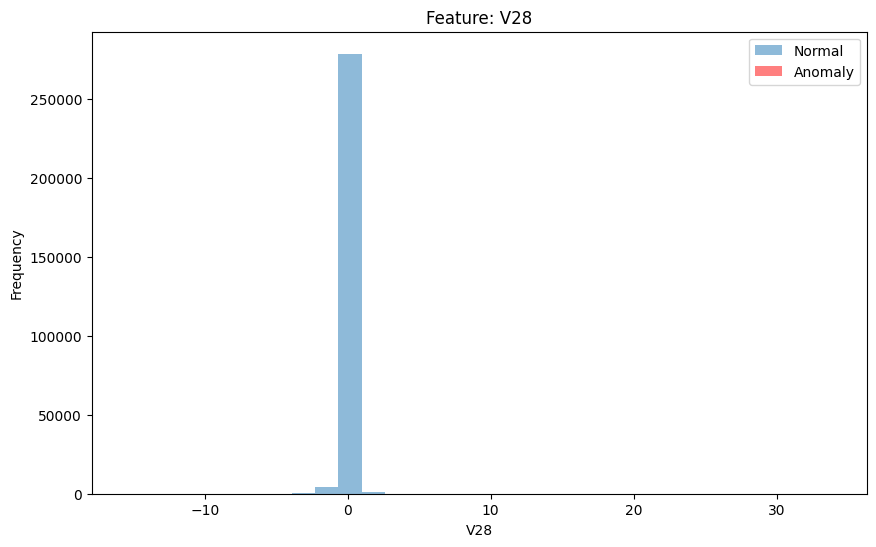

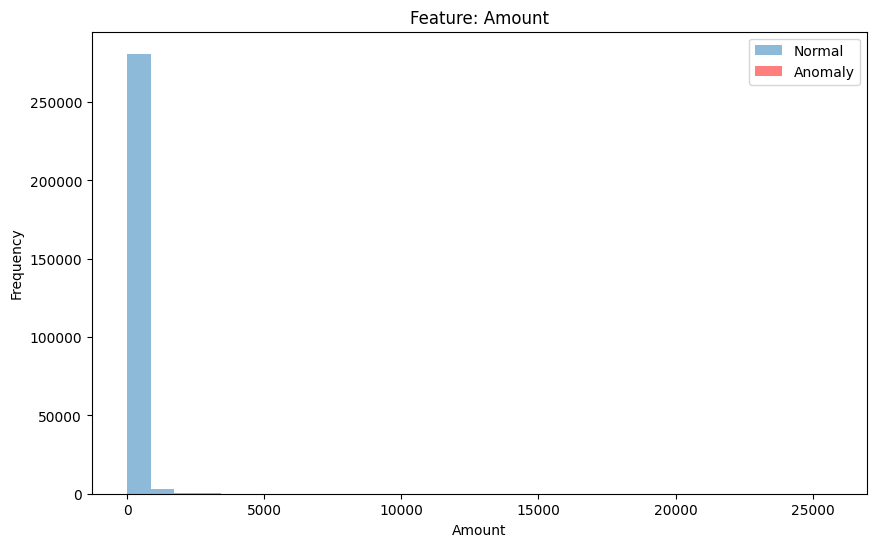

In [ ]:
import matplotlib.pyplot as plt

# Plot selected features with anomalies highlighted
features_to_plot = data_features.columns  # Plot the first four features for simplicity

for feature in features_to_plot:
    anomaly_indices = anomalies_dict[feature]
    plt.figure(figsize=(10, 6))
    plt.hist(data_features[feature], bins=num_bins, alpha=0.5, label='Normal')
    if len(anomaly_indices) > 0:
        plt.hist(data_features[feature].iloc[anomaly_indices], bins=num_bins, alpha=0.5, label='Anomaly', color='red')
    plt.title(f'Feature: {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

In [ ]:
# There is a trade off between precision and recall
# Compare anomaly flags with the original Class column
print(confusion_matrix(data_class, anomaly_flags))
print("//////////STAT////////////")
print(classification_report(data_class, anomaly_flags))

[[280683   3632]
 [    95    397]]
//////////STAT////////////
              precision    recall  f1-score   support

           0       1.00      0.99      0.99    284315
           1       0.10      0.81      0.18       492

    accuracy                           0.99    284807
   macro avg       0.55      0.90      0.58    284807
weighted avg       1.00      0.99      0.99    284807



# Method 2

## Import

In [ ]:
! pip install pyod

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.8/163.8 kB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyod: filename=pyod-2.0.1-py3-none-any.whl size=193267 sha256=d5d7c560ec5b58edb78060d16bc9f3108dbdb32de13ae529719d5c89ef7f1afc
  Stored in directory: /root/.cache/pip/wheels/94/75/88/b853cf33b0053b0a001dca55b74d515048b7656e736364eb57
Successfully built pyod


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from pyod.models.hbos import HBOS
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

## Load dataset

In [ ]:
# Separate features and labels
X = data.drop(columns=['Class', 'Time'])
y = data['Class']

## Scaling the values

In [ ]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Check Distribution

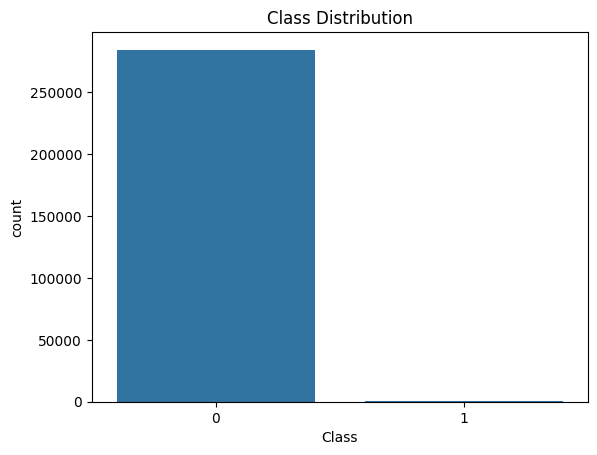

In [ ]:
# Check the distribution of the classes
sns.countplot(x='Class', data=data)
plt.title('Class Distribution')
plt.show()

In [ ]:
len(y)

284807

In [ ]:
# Calculate the total number of instances
total_instances =len(y)

# Calculate the number of anomalous instances
anomalous_instances = len(y[y==1])

# Calculate the contamination fraction
contamination_fraction = anomalous_instances / total_instances
contamination_fraction

0.001727485630620034

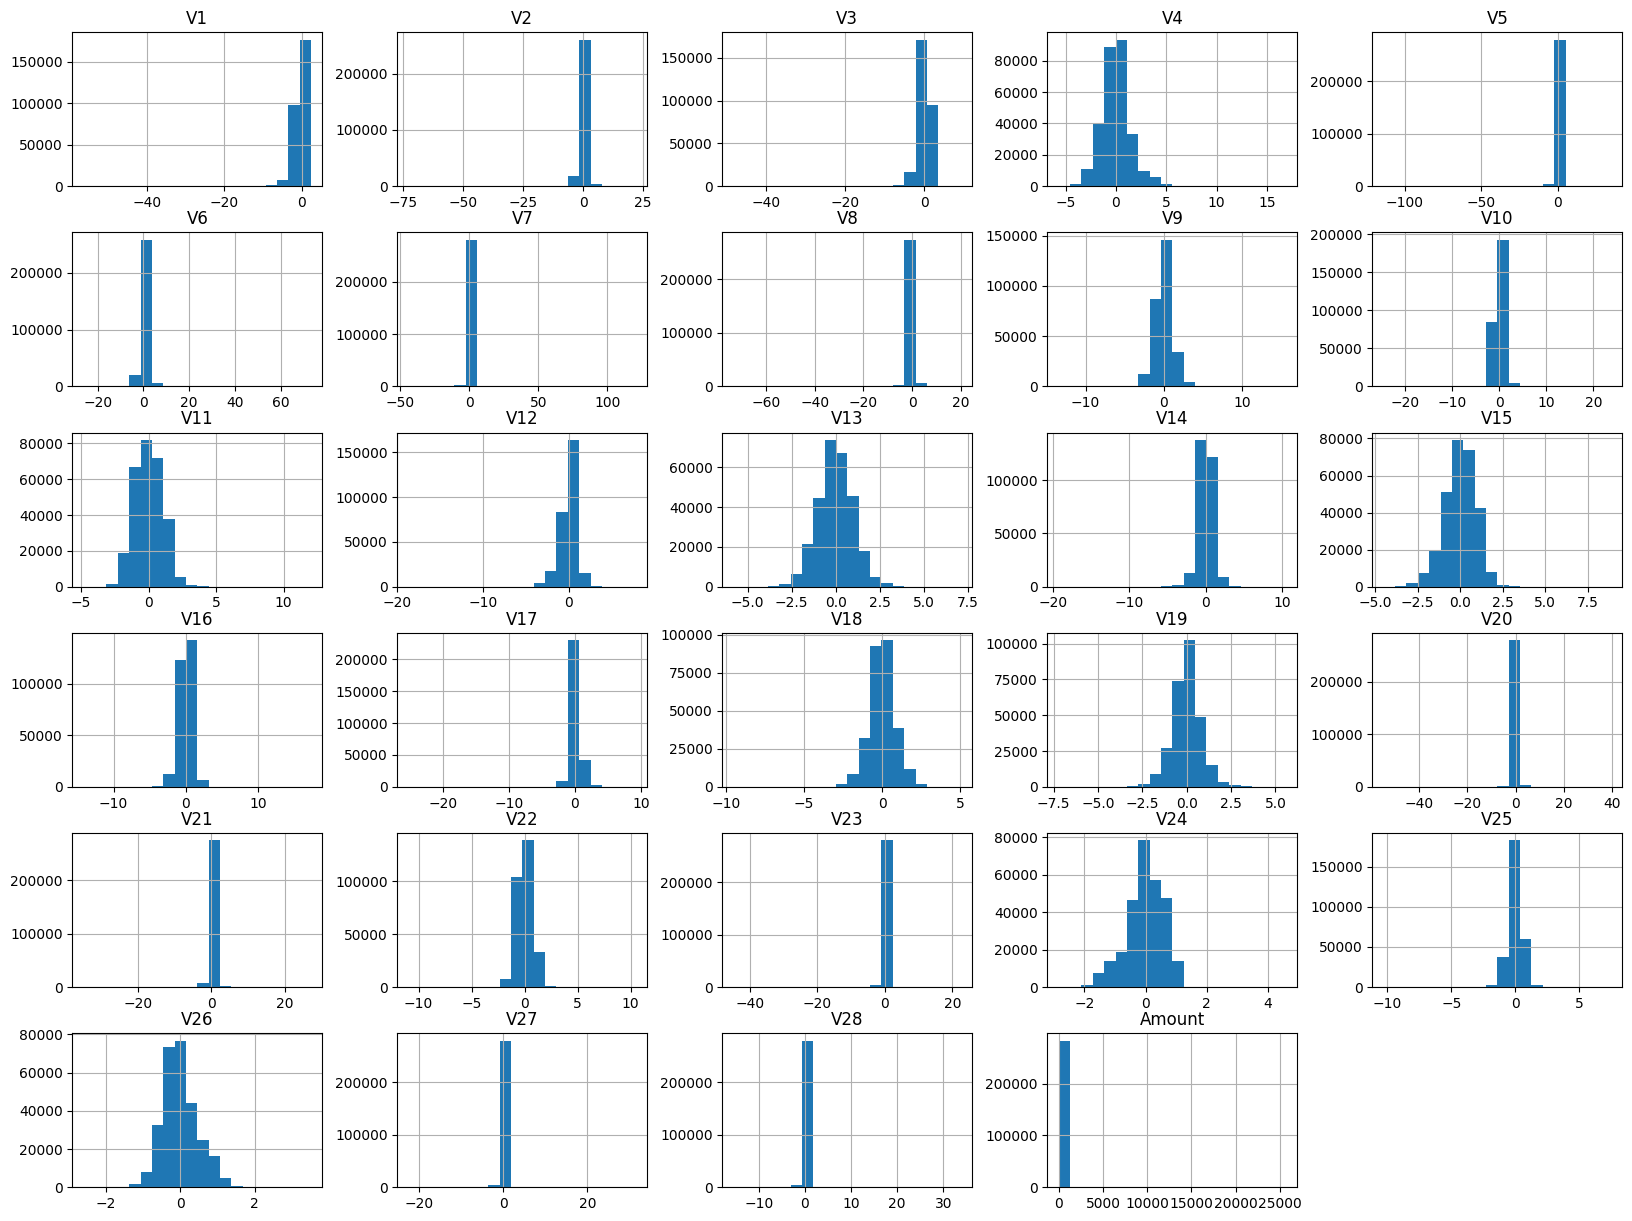

In [ ]:
# Plot histograms for each feature
X.hist(bins=20, figsize=(20, 15))
plt.show()

##  Implement HBOS for Anomaly Detection

In [ ]:
# Initialize the HBOS model
hbos = HBOS(contamination=0.003, n_bins=20)

In [ ]:
# Fit the model
hbos.fit(X_scaled)

HBOS(alpha=0.1, contamination=0.003, n_bins=20, tol=0.5)

In [ ]:
# Get the prediction scores
y_scores = hbos.decision_function(X_scaled)
y_pred = hbos.labels_

In [ ]:
len(y_pred[y_pred == 1])

855

In [ ]:
# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y, y_pred))

print("Classification Report:")
print(classification_report(y, y_pred))

roc_score = roc_auc_score(y, y_scores)
print("ROC AUC Score:", roc_score)

Confusion Matrix:
[[283674    641]
 [   278    214]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.25      0.43      0.32       492

    accuracy                           1.00    284807
   macro avg       0.62      0.72      0.66    284807
weighted avg       1.00      1.00      1.00    284807

ROC AUC Score: 0.9551102285639039


## KMeans

# KMeans Method 1

## Import packages

In [ ]:
import numpy as np
import pandas as pd
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from pylab import rcParams

rcParams['figure.figsize'] = 14, 8

# Answer to the Ultimate Question of Life, the Universe, and Everything
RANDOM_SEED = 42

LABELS = ["Normal", "Fraud"]

## Load Dataset

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

## Data Analysis

In [ ]:
data.describe()

Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271e+00  1.237094e+00  1.194353e+00  1.098632e+00   
min   -1.137433e+02 -2.616051e+01 -4.355724e+01 -7.321672e+01 -1.343407e+01   
25%   -6.915971e-01 -7.682956e-01 -5.540759e-01 -2.086297e-01 -6.430976e-01   
50%   -5.433583e-02 -2.741871e-01  4.010308e-02  2.235804e-02 -5.142873e-02   
75%    6.119264e-01  3.985649e-01  5.704361e-01  3.273459e-01  5.971390e-01   
max    3.480167e+01  7.330163e+01  1.205895e+02  2.000721e+01  1.559499e+01   

       ...           V21           V22           V23           V24  \
count  ...  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   ...  1.654067e-16 -3.568593e-16  2.578648e-16  4.473266e-15   
std    ...  7.345240e-01  7.257016e-01  6.244603e-01  6.056471e-01   
min    ... -3.483038e+01 -1.093314e+01 -4.480774e+01 -2.836627e+00   
25%    ... -2.283949e-01 -5.423504e-01 -1.618463e-01 -3.545861e-01   
50%    ... -2.945017e-02  6.781943e-03 -1.119293e-02  4.097606e-02   
75%    ...  1.863772e-01  5.285536e-01  1.476421e-01  4.395266e-01   
max    ...  2.720284e+01  1.050309e+01  2.252841e+01  4.584549e+00   

                V25           V26           V27           V28         Amount  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  284807.000000   
mean   5.340915e-16  1.683437e-15 -3.660091e-16 -1.227390e-16      88.349619   
std    5.212781e-01  4.822270e-01  4.036325e-01  3.300833e-01     250.120109   
min   -1.029540e+01 -2.604551e+00 -2.256568e+01 -1.543008e+01       0.000000   
25%   -3.171451e-01 -3.269839e-01 -7.083953e-02 -5.295979e-02       5.600000   
50%    1.659350e-02 -5.213911e-02  1.342146e-03  1.124383e-02      22.000000   
75%    3.507156e-01  2.409522e-01  9.104512e-02  7.827995e-02      77.165000   
max    7.519589e+00  3.517346e+00  3.161220e+01  3.384781e+01   25691.160000   

               Class  
count  284807.000000  
mean        0.001727  
std         0.041527  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.000000  

[8 rows x 31 columns]

In [ ]:
data.isnull().values.any()

False

In [ ]:
count_classes = pd.value_counts(data['Class'], sort=True)
count_classes

Class
0    284315
1       492
Name: count, dtype: int64

Now plot Transaction class distribution

Text(0, 0.5, 'Fraquency')

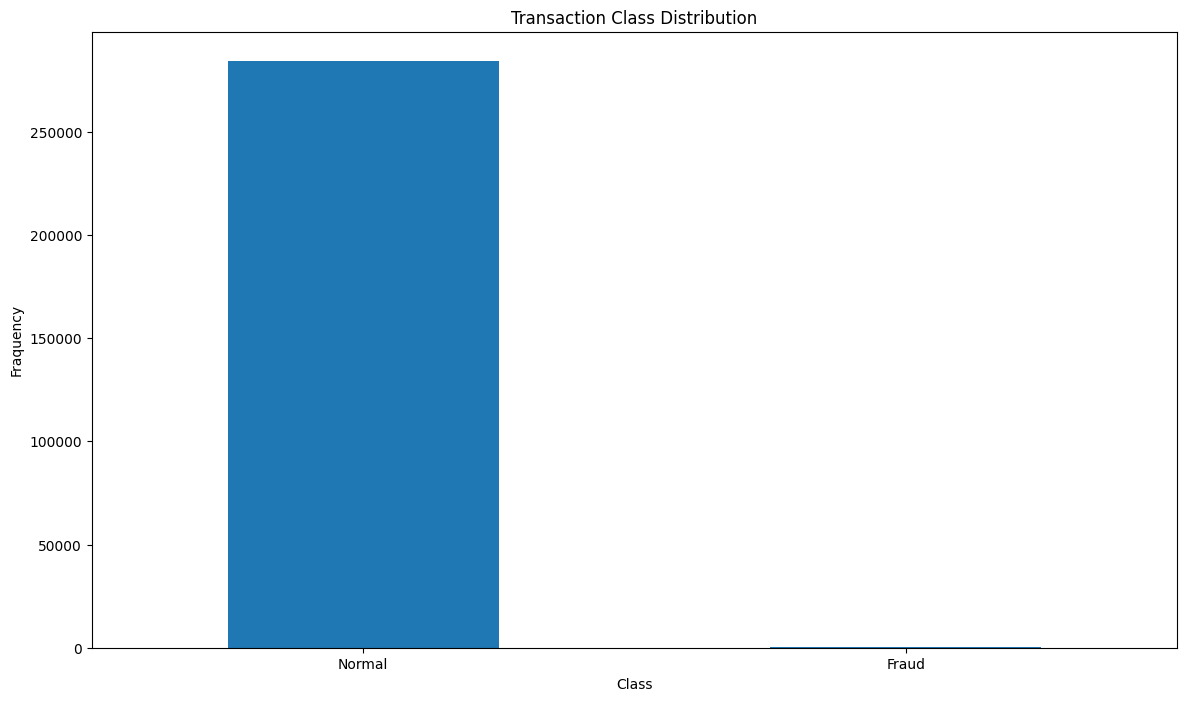

In [ ]:
count_classes.plot(kind="bar", rot=0)
plt.title("Transaction Class Distribution")
# Set labels on x-axis
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Fraquency")

From the above figure we can see that this is an extremely imbalanced dataset

In [ ]:
## separate the Fraud and the Normal dataset for future reference
Fraud = data[data['Class'] == 1]
Normal = data[data['Class'] == 0]

print(Fraud.shape, Normal.shape)

(492, 31) (284315, 31)


In [ ]:
# Statistics of Amount of Fraud Transactions
Fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [ ]:
# Statistics of Amount of Normal Transactions
Normal.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

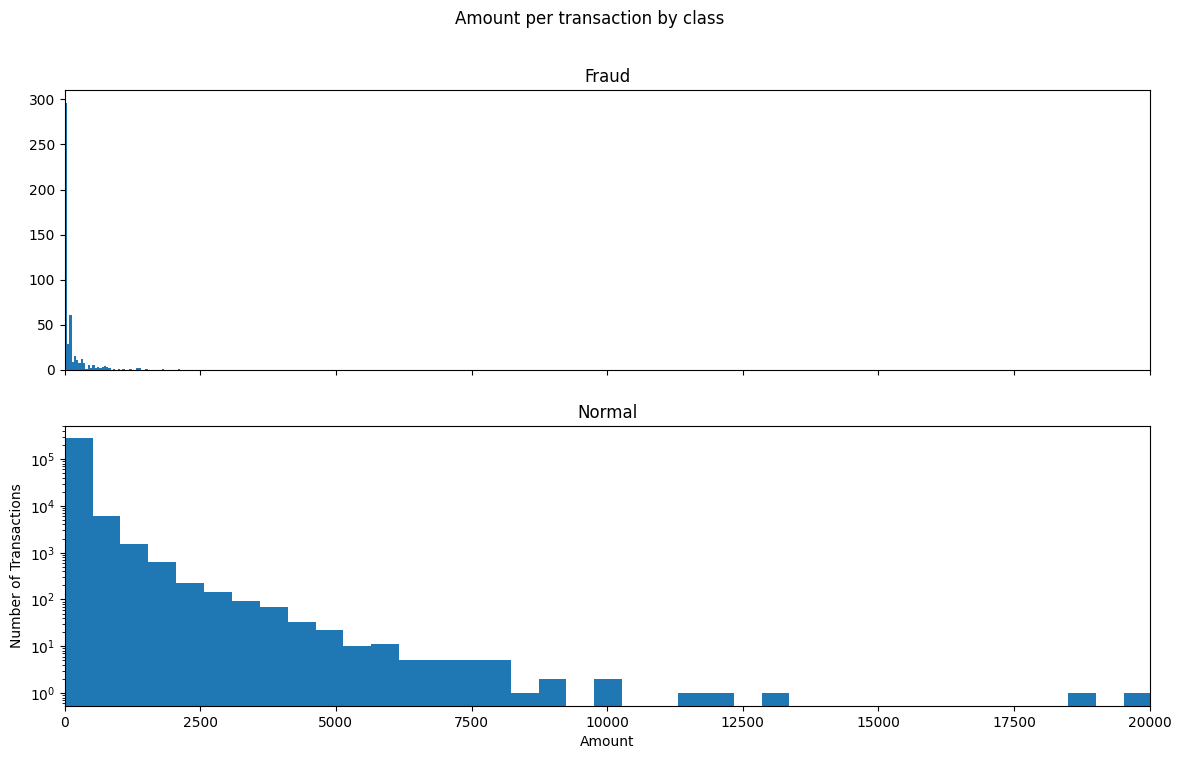

In [ ]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')
ax1.hist(Fraud.Amount, bins=50)
ax1.set_title('Fraud')
ax2.hist(Normal.Amount, bins=50)
ax2.set_title('Normal')
plt.xlabel('Amount')
plt.ylabel('Number of Transactions')
# sets the limit of x-axis unit from 0 to 20000
plt.xlim((0, 20000))
# make the y-axis unit in logarithmic scale
plt.yscale('log')
plt.show()

Now let's check how many fraudulent transaction occur in difference time frame

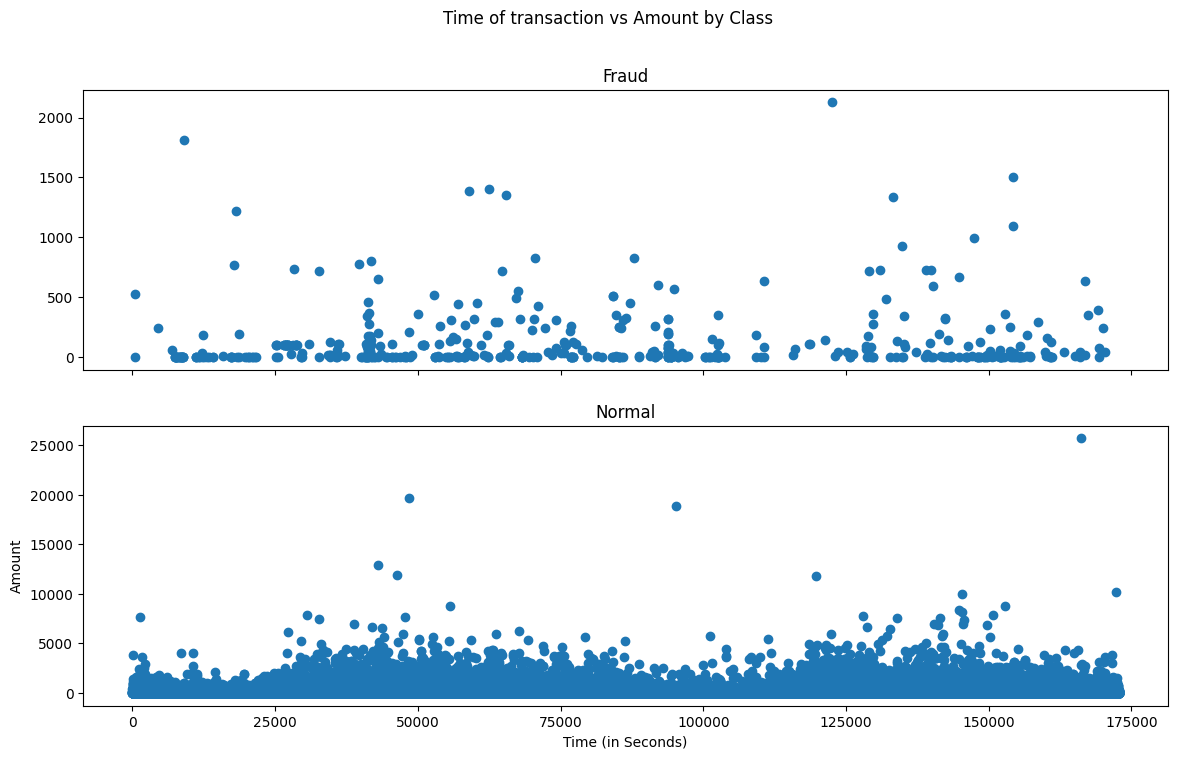

In [ ]:
# Create 2 graphs as 2 rows and 1 common column
# between below two graphs share x-axis as common
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle("Time of transaction vs Amount by Class")

# Plot time against amount for fraud transaction
ax1.scatter(Fraud.Time, Fraud.Amount)
ax1.set_title('Fraud')

# Plot time against amount for Normal transaction
ax2.scatter(Normal.Time, Normal.Amount)
ax2.set_title('Normal')

# Set X-axis label and y axis label and show the result
plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

## Data Sampling

In [ ]:

# Take a sample of data
data_sample = data.sample(frac=0.1, random_state=1)
# data_sample = data

data_sample.shape

(28481, 31)

In [ ]:
# Now we do the rest operation with this sample data to reduce processing
Fraud = data_sample[data_sample['Class']==1]
Valid = data_sample[data_sample['Class']==0]

# Find the ration of Outlier to Normal
outlier_fraction = len(Fraud)/float(len(Valid))

print(outlier_fraction)
print(len(Fraud))
print(len(Valid))

0.0017234102419808666
49
28432


In [ ]:
# Create independent and dependent features

# create a list of column names
columns = data_sample.columns.to_list()

# Store the variable we are predicting
target = "Class"

# Filter the columns to remove data we do not want
columns = [c for c in columns if c not in [target]]

# Define a random state
# state = np.random.RandomState(42)

X = data_sample[columns]
Y = data_sample[target]

# print(state)
print(columns)
print(X.shape)
print(Y.shape)

['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']
(28481, 30)
(28481,)


## Model Prediction

### K Means

#### Normalise the Data

#### Imports for KMeans

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

#### Normalize the attributes

In [ ]:
# Normalize the Data
scaler = StandardScaler()
X_norm = scaler.fit_transform(X)

####Identifying Optimum Number of Clusters

We identify this using *Elbow method*

In [ ]:
def optimise_k_means(data, max_k):
  means = []
  inertias = []

  for k in range(1, max_k):
    kmeans = KMeans(n_clusters=k, n_init='auto')
    kmeans.fit(data)

    means.append(k)
    inertias.append(kmeans.inertia_)

  # Generate the elbow plot
  fig = plt.subplots(figsize=(10, 5))
  plt.plot(means, inertias, 'o-')
  plt.xlabel('Number of Clusters')
  plt.ylabel('inertia')
  plt.grid(True)
  plt.show()

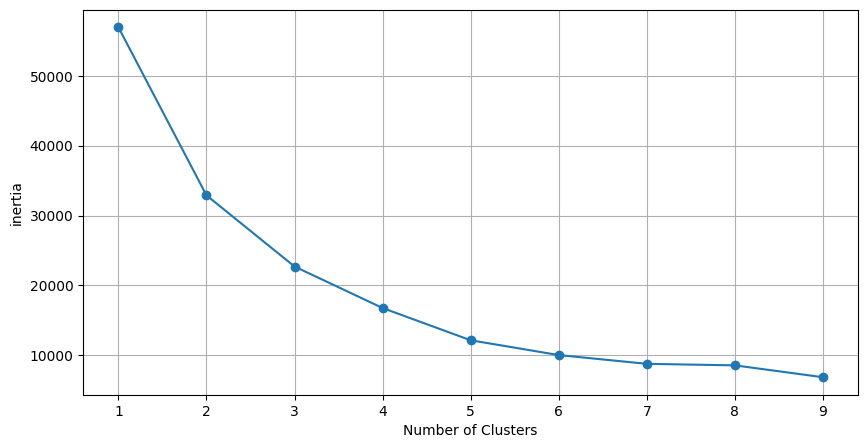

In [ ]:
optimise_k_means(X_norm[:,:2], 10)

#### Applying KMeans Clustering

In [ ]:
X = data.iloc[:, data.columns != 'Class'].drop(columns=['Time'])
y = data.iloc[:, data.columns == 'Class']

In [ ]:
X_normalised = scaler.fit_transform(X)

In [ ]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0).fit(X)
labels = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
np.unique(labels)

array([0, 1, 2, 3, 4], dtype=int32)

#### Calculate Z-Score

In [ ]:
# Calculate Distance to Centroids
distances = np.linalg.norm(X_normalised - kmeans.cluster_centers_[labels], axis=1)
distances

array([ 35.75136808,  36.28447534, 349.31342943, ...,  36.22339036,
        36.59821155, 349.92234805])

In [ ]:
# Compute Z-scores of the distances
mean_distance = np.mean(distances)
std_distance = np.std(distances)
z_scores = (distances - mean_distance) / std_distance


#### Find the Anomalies

In [ ]:
# Define a threshold for identifying anomalies
# Typically, Z-scores > 3 or < -3 are considered anomalies
# TODO: How to find this
threshold = 9

# Identify anomalies
anomalies = np.abs(z_scores) > threshold
anomaly_indices = np.where(anomalies)[0]

len(anomaly_indices)

591

In [ ]:

# Create an array where values at anomaly_indices are 1 and others are 0
y_pred = np.zeros(len(X), dtype=int)
y_pred[anomaly_indices] = 1

In [ ]:
y

Class
0           0
1           0
2           0
3           0
4           0
...       ...
284802      0
284803      0
284804      0
284805      0
284806      0

[284807 rows x 1 columns]

In [ ]:
# Convert to NumPy array
y_series = y['Class']

In [ ]:
# take the count of errors
n_errors = (y_pred != y_series).sum()
n_errors

1083

In [ ]:
print("Accuracy Score: ", accuracy_score(y, y_pred))

Accuracy Score:  0.9961974249228425


In [ ]:
print("Confusion Matrix: ")
print(confusion_matrix(y, y_pred))
print("Classification Report: ")
print(classification_report(y, y_pred))

Confusion Matrix: 
[[283724    591]
 [   492      0]]
Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.00      0.00      0.00       492

    accuracy                           1.00    284807
   macro avg       0.50      0.50      0.50    284807
weighted avg       1.00      1.00      1.00    284807



# KMeans 2

## Import

In [ ]:
import numpy as np
import pandas as pd
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from pylab import rcParams

rcParams['figure.figsize'] = 14, 8

# Answer to the Ultimate Question of Life, the Universe, and Everything
RANDOM_SEED = 42

LABELS = ["Normal", "Fraud"]

## Load Dataset

## Preprocess

In [ ]:
data.isnull().values.any()

False

In [ ]:
# Normalize the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_feature = scaler.fit_transform(data.drop('Class', axis=1))

scaled_df = pd.DataFrame(scaled_feature, columns=data.columns[:-1])

In [ ]:
scaled_df

Time        V1        V2        V3        V4        V5        V6  \
0      -1.996583 -0.694242 -0.044075  1.672773  0.973366 -0.245117  0.347068   
1      -1.996583  0.608496  0.161176  0.109797  0.316523  0.043483 -0.061820   
2      -1.996562 -0.693500 -0.811578  1.169468  0.268231 -0.364572  1.351454   
3      -1.996562 -0.493325 -0.112169  1.182516 -0.609727 -0.007469  0.936150   
4      -1.996541 -0.591330  0.531541  1.021412  0.284655 -0.295015  0.071999   
...          ...       ...       ...       ...       ...       ...       ...   
284802  1.641931 -6.065842  6.099286 -6.486245 -1.459641 -3.886611 -1.956690   
284803  1.641952 -0.374121 -0.033356  1.342145 -0.521651  0.629040  0.794446   
284804  1.641974  0.980024 -0.182434 -2.143205 -0.393984  1.905833  2.275262   
284805  1.641974 -0.122755  0.321250  0.463320  0.487192 -0.273836  0.468155   
284806  1.642058 -0.272331 -0.114899  0.463866 -0.357570 -0.009089 -0.487602   

              V7        V8        V9  ...       V20       V21       V22  \
0       0.193679  0.082637  0.331128  ...  0.326118 -0.024923  0.382854   
1      -0.063700  0.071253 -0.232494  ... -0.089611 -0.307377 -0.880077   
2       0.639776  0.207373 -1.378675  ...  0.680975  0.337632  1.063358   
3       0.192071  0.316018 -1.262503  ... -0.269855 -0.147443  0.007267   
4       0.479302 -0.226510  0.744326  ...  0.529939 -0.012839  1.100011   
...          ...       ...       ...  ...       ...       ...       ...   
284802 -3.975628  6.116573  1.742559  ...  1.914365  0.290602  0.154146   
284803  0.019667  0.246886  0.532299  ...  0.077330  0.291625  1.273781   
284804 -0.239939  0.593140  0.393630  ...  0.001811  0.315913  0.796788   
284805 -0.554672  0.568631  0.356887  ...  0.165300  0.361112  1.102451   
284806  1.274769 -0.347176  0.442532  ...  0.496739  0.355411  0.886149   

             V23       V24       V25       V26       V27       V28    Amount  
0      -0.176911  0.110507  0.246585 -0.392170  0.330892 -0.063781  0.244964  
1       0.162201 -0.561131  0.320694  0.261069 -0.022256  0.044608 -0.342475  
2       1.456320 -1.138092 -0.628537 -0.288447 -0.137137 -0.181021  1.160686  
3      -0.304777 -1.941027  1.241904 -0.460217  0.155396  0.186189  0.140534  
4      -0.220123  0.233250 -0.395202  1.041611  0.543620  0.651816 -0.073403  
...          ...       ...       ...       ...       ...       ...       ...  
284802  1.624574 -0.841000  2.756320  0.518500  2.337901  2.495529 -0.350151  
284803  0.019958 -1.677920 -1.163726 -0.819647  0.169641 -0.162164 -0.254117  
284804 -0.060053  1.056944  0.509797 -0.181182  0.011037 -0.080467 -0.081839  
284805 -0.261503  0.203428 -1.091855  1.133635  0.269604  0.316687 -0.313249  
284806  0.603365  0.014526 -0.908631 -1.696853 -0.005984  0.041350  0.514355  

[284807 rows x 30 columns]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

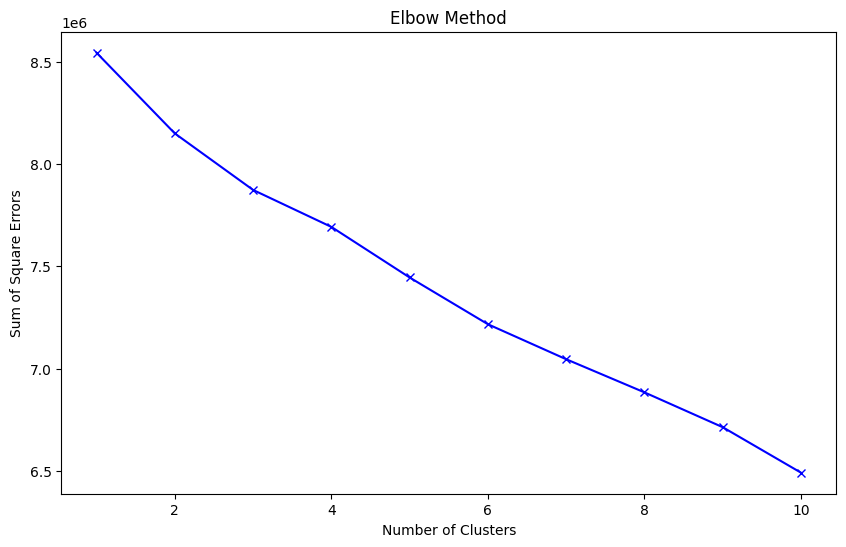

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Elbo method to find the optimal number of clusters
sse = []

k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_df)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(k_range, sse, 'bx-')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Square Errors')
plt.title('Elbow Method')
plt.show()

In [ ]:
optimal_cluster = 9

kmeans = KMeans(n_clusters=optimal_cluster, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
data.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V23       V24       V25       V26       V27  \
0  0.098698  0.363787  ... -0.110474  0.066928  0.128539 -0.189115  0.133558   
1  0.085102 -0.255425  ...  0.101288 -0.339846  0.167170  0.125895 -0.008983   
2  0.247676 -1.514654  ...  0.909412 -0.689281 -0.327642 -0.139097 -0.055353   
3  0.377436 -1.387024  ... -0.190321 -1.175575  0.647376 -0.221929  0.062723   
4 -0.270533  0.817739  ... -0.137458  0.141267 -0.206010  0.502292  0.219422   

        V28  Amount  Class  Cluster  Predicted  
0 -0.021053  149.62      0        1          0  
1  0.014724    2.69      0        3          0  
2 -0.059752  378.66      0        3          0  
3  0.061458  123.50      0        1          0  
4  0.215153   69.99      0        1          0  

[5 rows x 33 columns]

In [ ]:
np.unique(data['Cluster'])

array([0, 1, 2, 3, 4, 5, 6, 7, 8], dtype=int32)

In [ ]:
# Analyze the distribution of the 'Class' in each cluster
cluster_analysis = data.groupby('Cluster')['Class'].value_counts(normalize=True).unstack()
print(cluster_analysis)

Class           0         1
Cluster                    
0        0.997903  0.002097
1        0.999372  0.000628
2        0.995688  0.004312
3        0.999355  0.000645
4        0.164609  0.835391
5        0.999641  0.000359
6        0.998576  0.001424
7        0.999900  0.000100
8        0.990420  0.009580


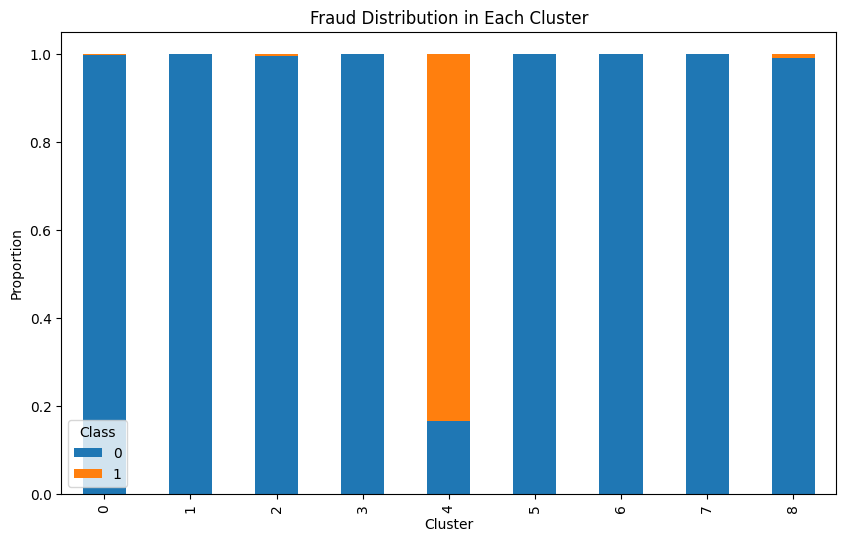

In [ ]:
# Plot the distribution
cluster_analysis.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Fraud Distribution in Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Proportion')
plt.show()

## Conclusion

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
# Assuming 'data' is your DataFrame and 'Class' is the true label column

# Assign predictions based on cluster 3 being fraudulent
data['Predicted'] = np.where(data['Cluster'] == 4, 1, 0)

In [ ]:
# True labels
true_labels = data['Class']

# Predicted labels
predicted_labels = data['Predicted']

In [ ]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Calculate classification report
class_report = classification_report(true_labels, predicted_labels)

# Display results
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Confusion Matrix:
[[284275     40]
 [   289    203]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.84      0.41      0.55       492

    accuracy                           1.00    284807
   macro avg       0.92      0.71      0.78    284807
weighted avg       1.00      1.00      1.00    284807



## LOF

# Import

In [ ]:
import numpy as np
import pandas as pd
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.neighbors import LocalOutlierFactor
from pylab import rcParams

rcParams['figure.figsize'] = 14, 8

# Answer to the Ultimate Question of Life, the Universe, and Everything
RANDOM_SEED = 42

LABELS = ["Normal", "Fraud"]

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Load dataset

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

# Data Analysis

In [ ]:
data.isnull().values.any()

False

In [ ]:
count_classes = pd.value_counts(data['Class'], sort=True)
count_classes

Class
0    284315
1       492
Name: count, dtype: int64

Text(0, 0.5, 'Fraquency')

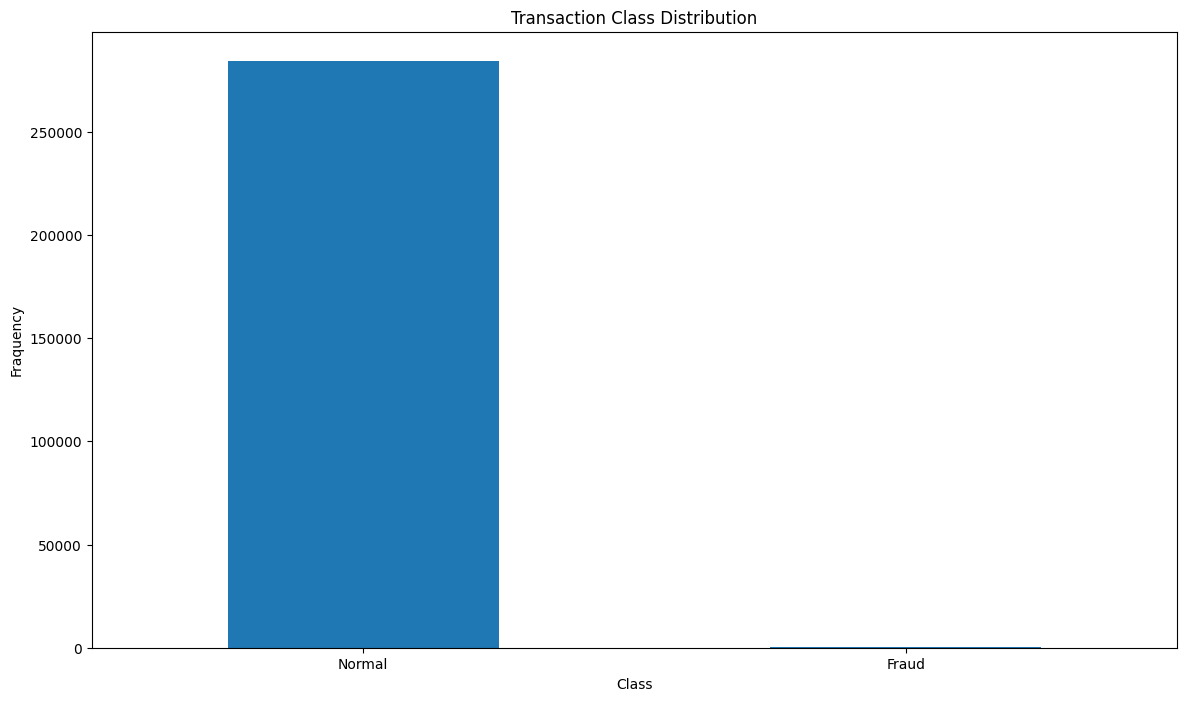

In [ ]:
count_classes.plot(kind="bar", rot=0)
plt.title("Transaction Class Distribution")
# Set labels on x-axis
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Fraquency")

In [ ]:
## separate the Fraud and the Normal dataset for future reference
Fraud = data[data['Class'] == 1]
Normal = data[data['Class'] == 0]

print(Fraud.shape, Normal.shape)

(492, 31) (284315, 31)


In [ ]:
# Statistics of Amount of Fraud Transactions
Fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [ ]:
# Statistics of Amount of Normal Transactions
Normal.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

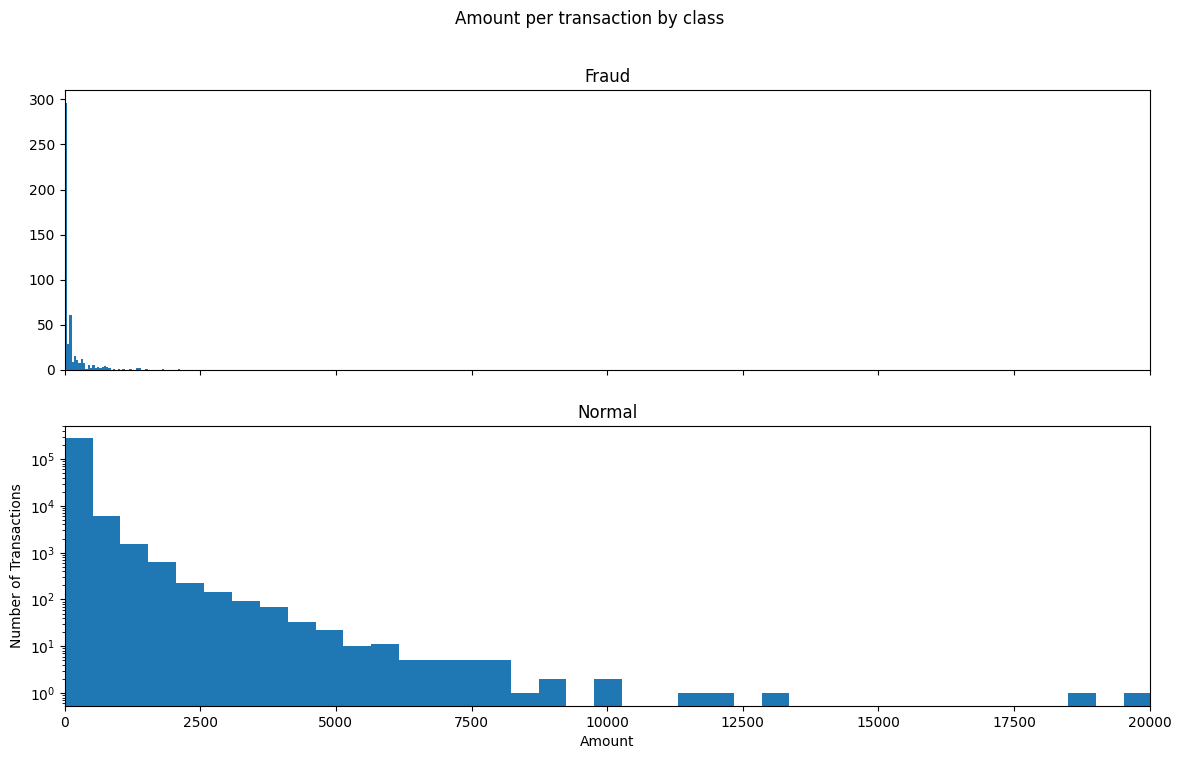

In [ ]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')
ax1.hist(Fraud.Amount, bins=50)
ax1.set_title('Fraud')
ax2.hist(Normal.Amount, bins=50)
ax2.set_title('Normal')
plt.xlabel('Amount')
plt.ylabel('Number of Transactions')
# sets the limit of x-axis unit from 0 to 20000
plt.xlim((0, 20000))
# make the y-axis unit in logarithmic scale
plt.yscale('log')
plt.show()

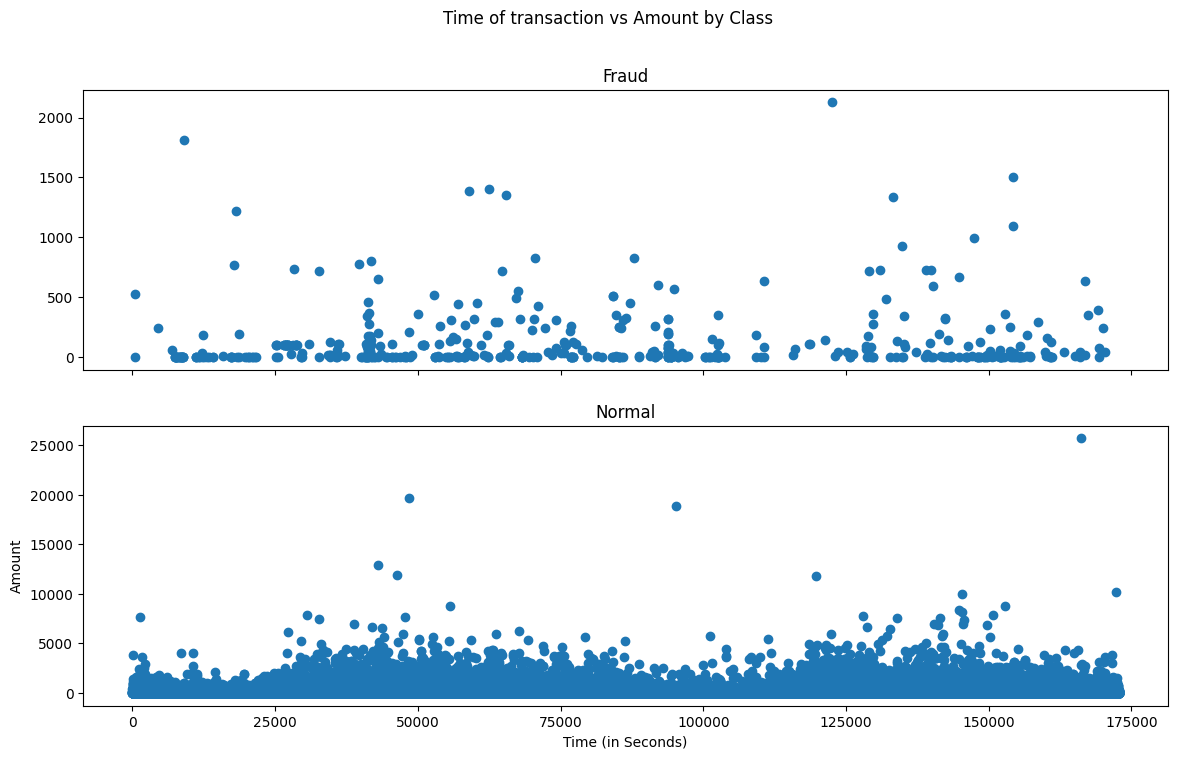

In [ ]:
# Create 2 graphs as 2 rows and 1 common column
# between below two graphs share x-axis as common
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle("Time of transaction vs Amount by Class")

# Plot time against amount for fraud transaction
ax1.scatter(Fraud.Time, Fraud.Amount)
ax1.set_title('Fraud')

# Plot time against amount for Normal transaction
ax2.scatter(Normal.Time, Normal.Amount)
ax2.set_title('Normal')

# Set X-axis label and y axis label and show the result
plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

# Data Sampling

In [ ]:
# Take a sample of data
data_sample = data.sample(frac=0.1, random_state=1)
# data_sample = data

data_sample.shape

(28481, 31)

In [ ]:
# Now we do the rest operation with this sample data to reduce processing
Fraud = data_sample[data_sample['Class']==1]
Valid = data_sample[data_sample['Class']==0]

# Find the ration of Outlier to Normal
outlier_fraction = len(Fraud)/float(len(Valid))

print(outlier_fraction)
print(len(Fraud))
print(len(Valid))

0.0017234102419808666
49
28432


In [ ]:
# Create independent and dependent features

# create a list of column names
columns = data_sample.columns.to_list()

# Store the variable we are predicting
target = "Class"

# Filter the columns to remove data we do not want
columns = [c for c in columns if c not in [target]]

# Define a random state
# state = np.random.RandomState(42)

X = data_sample[columns]
Y = data_sample[target]

# print(state)
print(columns)
print(X.shape)
print(Y.shape)

['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']
(28481, 30)
(28481,)


# LOF

In [ ]:
# Works just like K-nearest neighbor so n_neighbour parameter stands for no. of neighbors we have to search for a datapoint
# contamination parameter influences how aggressively the LOF algorithm identifies outliers
LOF_classifier = LocalOutlierFactor(n_neighbors=20, algorithm='auto', metric='minkowski',
                   p=2, metric_params=None, contamination=outlier_fraction)

In [ ]:
y_pred = LOF_classifier.fit_predict(X)
y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
# Higher the lower the value(keep in my values are negative) higher the chance of it being outlier
score_prediction = LOF_classifier.negative_outlier_factor_
score_prediction

array([-1.04009684, -1.01681044, -1.02971646, ..., -0.9980937 ,
       -1.05205114, -0.99057752])

In [ ]:
outlier_indices = np.where(y_pred == -1)[0]
print(len(outlier_indices))

50


In [ ]:
#Reshape the prediction values to 0 for Valid transactions , 1 for Fraud transactions
# !! CAREFUL RUN ONLY ONCE
y_pred[y_pred == 1] = 0
y_pred[y_pred == -1] = 1

n_errors = (y_pred != Y).sum()

print("Accuracy Score :", accuracy_score(Y,y_pred))
print("Confusion Matrix: ")
print(confusion_matrix(Y,y_pred))
print("Classification Report :")
print(classification_report(Y,y_pred))

Accuracy Score : 0.9965942207085425
Confusion Matrix: 
[[28383    49]
 [   48     1]]
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.02      0.02      0.02        49

    accuracy                           1.00     28481
   macro avg       0.51      0.51      0.51     28481
weighted avg       1.00      1.00      1.00     28481



## OneClassSVM

# SVM Method One

## Imports

In [ ]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.svm import OneClassSVM
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn import svm
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn
import itertools
%matplotlib inline

## Load Dataset

In [ ]:
df.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

## Visualising the data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
df.describe()

Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271e+00  1.237094e+00  1.194353e+00  1.098632e+00   
min   -1.137433e+02 -2.616051e+01 -4.355724e+01 -7.321672e+01 -1.343407e+01   
25%   -6.915971e-01 -7.682956e-01 -5.540759e-01 -2.086297e-01 -6.430976e-01   
50%   -5.433583e-02 -2.741871e-01  4.010308e-02  2.235804e-02 -5.142873e-02   
75%    6.119264e-01  3.985649e-01  5.704361e-01  3.273459e-01  5.971390e-01   
max    3.480167e+01  7.330163e+01  1.205895e+02  2.000721e+01  1.559499e+01   

       ...           V21           V22           V23           V24  \
count  ...  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   ...  1.654067e-16 -3.568593e-16  2.578648e-16  4.473266e-15   
std    ...  7.345240e-01  7.257016e-01  6.244603e-01  6.056471e-01   
min    ... -3.483038e+01 -1.093314e+01 -4.480774e+01 -2.836627e+00   
25%    ... -2.283949e-01 -5.423504e-01 -1.618463e-01 -3.545861e-01   
50%    ... -2.945017e-02  6.781943e-03 -1.119293e-02  4.097606e-02   
75%    ...  1.863772e-01  5.285536e-01  1.476421e-01  4.395266e-01   
max    ...  2.720284e+01  1.050309e+01  2.252841e+01  4.584549e+00   

                V25           V26           V27           V28         Amount  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  284807.000000   
mean   5.340915e-16  1.683437e-15 -3.660091e-16 -1.227390e-16      88.349619   
std    5.212781e-01  4.822270e-01  4.036325e-01  3.300833e-01     250.120109   
min   -1.029540e+01 -2.604551e+00 -2.256568e+01 -1.543008e+01       0.000000   
25%   -3.171451e-01 -3.269839e-01 -7.083953e-02 -5.295979e-02       5.600000   
50%    1.659350e-02 -5.213911e-02  1.342146e-03  1.124383e-02      22.000000   
75%    3.507156e-01  2.409522e-01  9.104512e-02  7.827995e-02      77.165000   
max    7.519589e+00  3.517346e+00  3.161220e+01  3.384781e+01   25691.160000   

               Class  
count  284807.000000  
mean        0.001727  
std         0.041527  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.000000  

[8 rows x 31 columns]

In [ ]:
df_fraud = df[df['Class'] == 1] # Recovery of fraud data

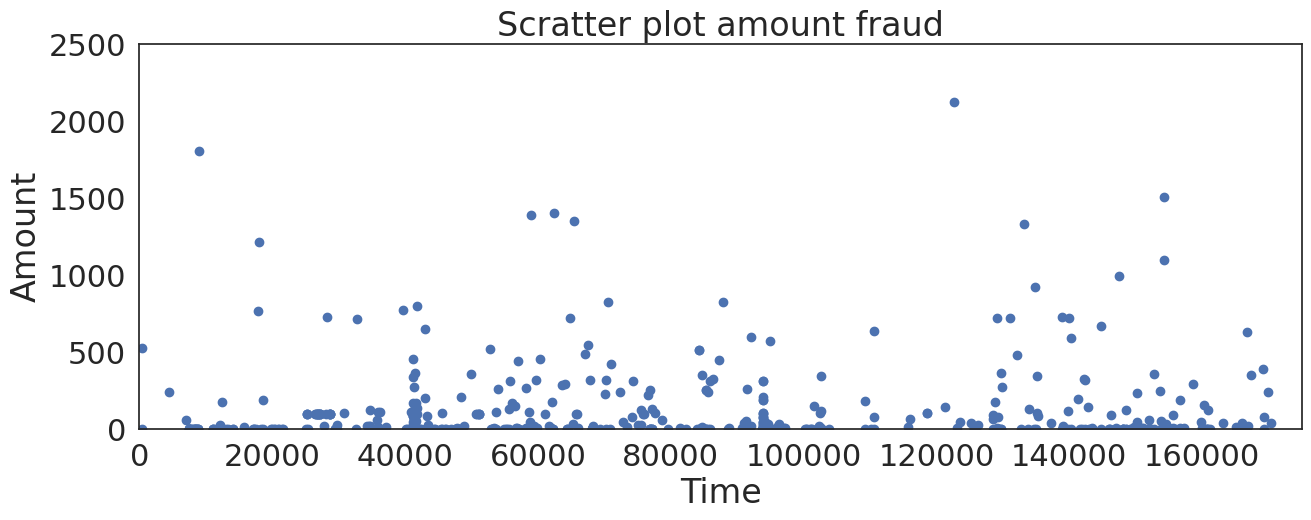

In [ ]:
plt.figure(figsize=(15,5))
plt.scatter(df_fraud['Time'], df_fraud['Amount']) # Display fraud amounts according to their time
plt.title('Scratter plot amount fraud')
plt.xlabel('Time')
plt.ylabel('Amount')
plt.xlim([0,175000])
plt.ylim([0,2500])
plt.show()

In [ ]:
nb_big_fraud = df_fraud[df_fraud['Amount'] > 1000].shape[0]
print(f'There are only {nb_big_fraud} frauds where the amount was bigger than 1000 over {df_fraud.shape[0]} frauds')

There are only 9 frauds where the amount was bigger than 1000 over 492 frauds


## Checking for unbalanced or balanced data

In [ ]:
print(f'There are only {len(df_fraud)}  frauds in the original dataset, even though there are {len(df[df.Class==0])} normal in the dataset.')

There are only 492  frauds in the original dataset, even though there are 284315 normal in the dataset.


## Correlation of features

In [ ]:
df_corr = df.corr()

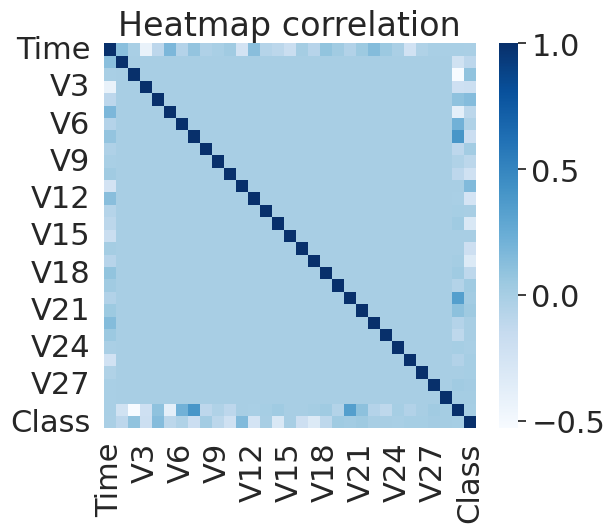

In [ ]:
plt.figure(figsize=(6,5))
seaborn.heatmap(df_corr, cmap='Blues')
seaborn.set(font_scale=2,style='white')

plt.title('Heatmap correlation')
plt.show()

From the above heat map we can easily conclude that there are very few correlated features in it . This waves or points towards the presence of a PCA being applied on this .

## Function of Confusion Matrix

In [ ]:
class_names=np.array(['0','1']) # Binary label

In [ ]:
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## Data formatting and Scaling

In [ ]:
# Assuming 'Class' is the label column with 1 for fraud and 0 for normal transactions
X = data.drop(columns=['Class'])
y = data['Class']

In [ ]:
from sklearn.preprocessing import StandardScaler

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Train and test split

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [ ]:
print(f'There are {X_train.shape[0]} samples in the training set and {X_test.shape[0]} samples in the test set.')

There are 199364 samples in the training set and 85443 samples in the test set.


In [ ]:
len(y_test[y_test == 1])

136

## Applying one class SVM

In [ ]:
# Train One-Class SVM on normal transactions only
X_train_normal = X_train[y_train == 0]

In [ ]:
# Initialise OneClassSVM class
ocsvm = OneClassSVM(kernel='rbf', nu=0.01, gamma='auto')

This takes almost 2 minutes

In [ ]:
# Fiting the data
ocsvm.fit(X_train_normal)

OneClassSVM(gamma='auto', nu=0.01)

In [ ]:
# Predict on the test set
y_pred = ocsvm.predict(X_scaled)

In [ ]:
# Map predictions to 0 for normal and 1 for anomaly to match the original labels
y_pred = [1 if x == -1 else 0 for x in y_pred]

## Conclusion

In [ ]:
anomalies_count = sum(y_pred)
print("Number of anomalies predicted:", anomalies_count)

Number of anomalies predicted: 3503


In [ ]:
# Generate the confusion matrix
cm = confusion_matrix(y, y_pred)

In [ ]:
print("Classification Report: ")
print(classification_report(y, y_pred))

Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.99      0.99    284315
           1       0.12      0.83      0.20       492

    accuracy                           0.99    284807
   macro avg       0.56      0.91      0.60    284807
weighted avg       1.00      0.99      0.99    284807



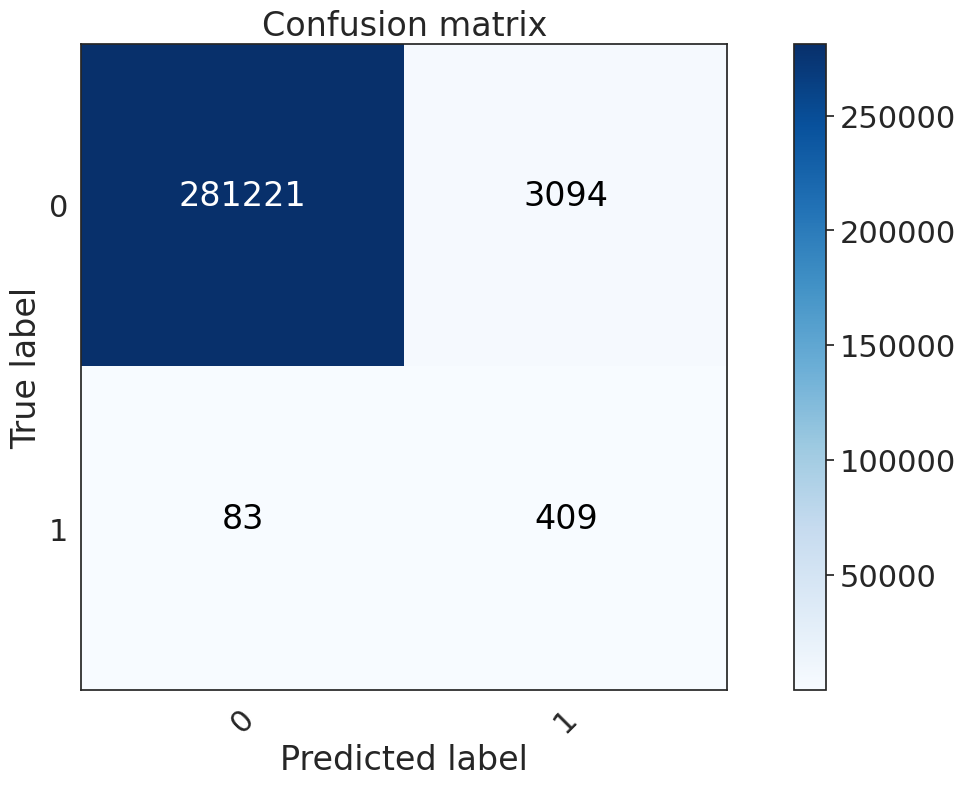

In [ ]:
plot_confusion_matrix(cm,class_names)

## PCA

# Principal Component Analysis

## Import

In [ ]:
# Importing necessary libraries
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

## Load Dataset

## Data preprocessing

In [ ]:
s = data["Class"].value_counts()
s.iloc[1], s.iloc[0]

(492, 284315)

In [ ]:
# Feature data
# TODO: Should copy all the values in before removing Class and Time
X = data.copy()

# classification for later measurements
y = data["Class"]

# Scale all feature vectors
Std = StandardScaler()
Std.fit(X)
X = Std.transform(X)

## Apply PCA

### Training

In [ ]:
# Construstion of PCA space
"""Fits X_train in PCA model
X_train_PCA is a new representation of X_train in the principal component space."""
X_train_PCA = pca.fit_transform(X_train)

"""Converts the numpy array X_train_PCA back into a pandas DataFrame.
The index=X_train.index ensures that the new DataFrame maintains the same row indices as the original X_train"""
X_train_PCA = pd.DataFrame(data=X_train_PCA, index=X_train.index)

In [ ]:
# Reconstruction of original dataframe space from PCA dataframe
"""This step transforms the data back from the principal component space to
the original feature space using the inverse of the PCA transformation"""
X_train_PCA_inverse = pca.inverse_transform(X_train_PCA)

"""Converts the numpy array X_train_PCA_inverse back into a pandas DataFrame.
The index=X_train.index ensures that the new DataFrame maintains the same row
indices as the original X_train"""
X_train_PCA_inverse = pd.DataFrame(data=X_train_PCA_inverse, index=X_train.index)

In [ ]:
def scatterPlot(xDF, yDF, algoName):
    tempDF = pd.DataFrame(data=xDF.loc[:, 0:1], index=xDF.index)
    tempDF = pd.concat((tempDF, yDF), axis=1, join="inner")
    tempDF.columns = ["First Vector", "Second Vector", "Label"]
    sns.lmplot(x="First Vector", y="Second Vector", hue="Label", data=tempDF, fit_reg=False, legend=False)
    ax = plt.gca()
    ax.set_title("Separation of Observations using " + algoName)
    ax.legend(loc = "upper right")

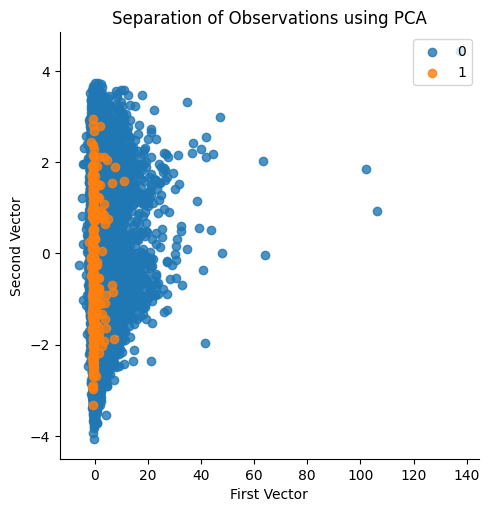

In [ ]:
scatterPlot(X_train_PCA, y_train, "PCA")

## Applying PCA with 28 components and reconstructing them

In [ ]:
# X includes the class and time
# Reducing to 2 dimensions for visualization
pca = PCA(n_components=28)

In [ ]:
X_pca = pca.fit_transform(X)

In [ ]:
# Reconstructing the dataset
X_reconstructed = pca.inverse_transform(X_pca)

## Calculate the reconstruction error and visualize them

In [ ]:
reconstruction_error = np.sum(np.square(X - X_reconstructed), axis=1)

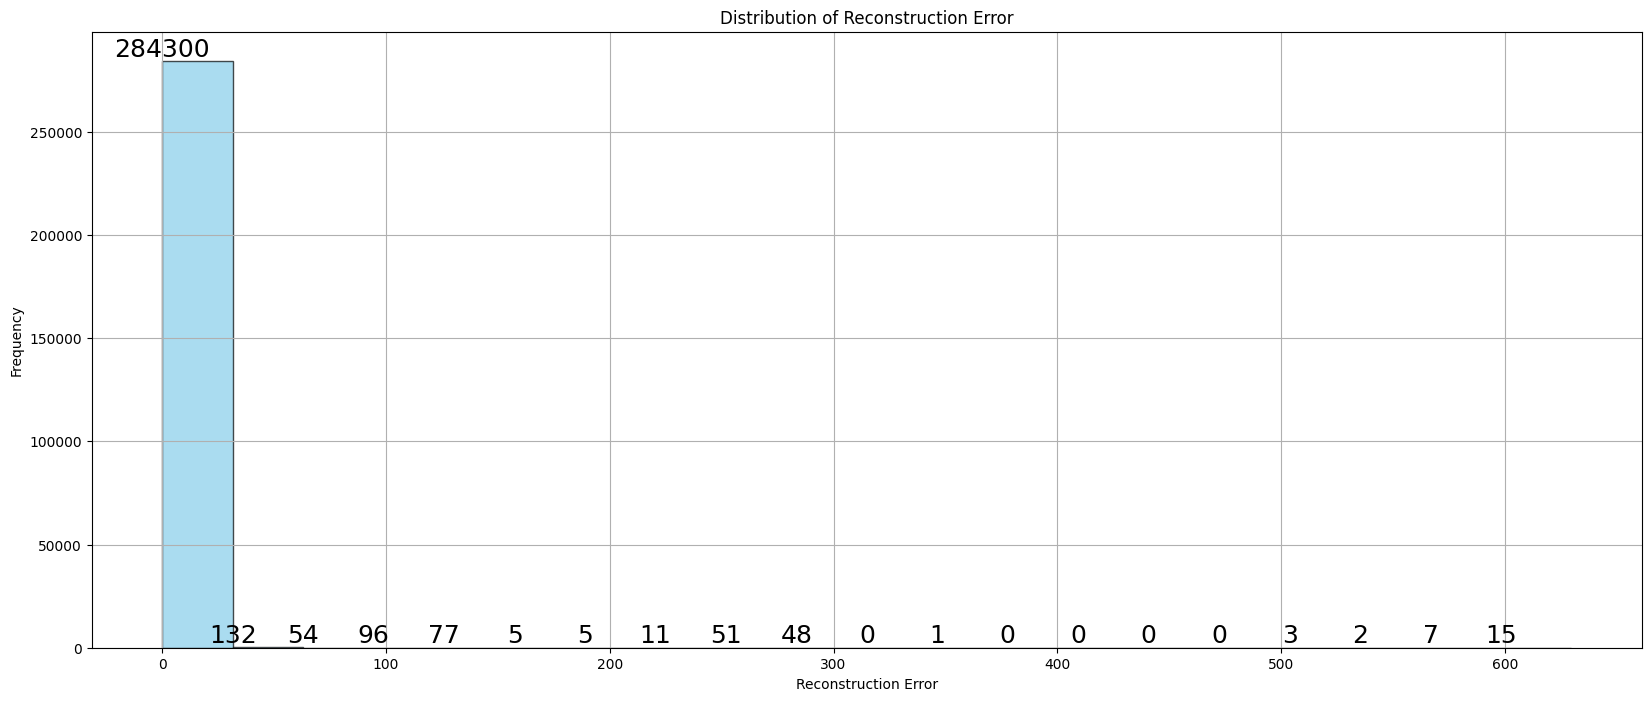

In [ ]:
# Visualizing the reconstruction error
plt.figure(figsize=(20, 8))
counts, bins, _ = plt.hist(reconstruction_error, bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('Reconstruction Error')
plt.ylabel('Frequency')
plt.title('Distribution of Reconstruction Error')
plt.grid(True)
# Annotate each bin with the count
for i in range(len(counts)):
    plt.text(bins[i], counts[i], str(int(counts[i])), ha='center', va='bottom', fontsize = 18)
plt.show()

## Finding anomalies

In [ ]:
threshold = np.percentile(reconstruction_error, 99.8)  # Adjust percentile as needed
anomalies = X[reconstruction_error > threshold]
print("Number of anomalies:", len(anomalies))
print("Anomalies:")
print(anomalies)

Number of anomalies: 570
Anomalies:
[[-1.98944439  0.25695816  0.56323015 ...  0.66645536 -0.34523322
  -0.04159898]
 [-1.98927592 -0.78178235  0.84758436 ...  0.61370982  0.46250013
  -0.04159898]
 [-1.98803351 -1.180495    1.18209005 ... -0.43406056 -0.35322939
  24.0390519 ]
 ...
 [ 1.56959742 -0.34520105  0.68210633 ...  0.58882664 -0.04181846
  24.0390519 ]
 [ 1.58254804 -1.58975021  0.35478844 ... -0.76859627  0.62630172
  24.0390519 ]
 [ 1.59059217  1.01699283  0.09597005 ... -0.04637872 -0.18319079
  24.0390519 ]]


## Evaluation of our anomalies

In [ ]:
# Identifying anomalies
anomalies_indices = np.where(reconstruction_error > threshold)[0]
anomalies_indices

array([   460,    472,    541,    623,   4920,   6329,   6331,   6334,
         6336,   6338,   6427,   6446,   6472,   6529,   6609,   6641,
         6734,   6774,   6820,   6870,   6971,   8296,   8312,   8335,
         8610,   8615,   8617,   8972,   9035,   9179,   9252,   9487,
         9509,   9643,  10204,  10456,  10484,  10497,  10498,  10568,
        10620,  10630,  10681,  10690,  10783,  10801,  10891,  10897,
        10906,  11343,  11710,  11841,  11880,  12030,  12070,  12108,
        12156,  12229,  12261,  12325,  12369,  12468,  12922,  12938,
        13394,  13405,  13499,  13617,  13624,  13725,  13833,  13942,
        14026,  14104,  14170,  14197,  14211,  14338,  14920,  15166,
        15204,  15225,  15451,  15476,  15506,  15539,  15566,  15736,
        15751,  15781,  15810,  16110,  16415,  16780,  16851,  16863,
        17317,  17322,  17366,  17407,  17453,  17480,  17592,  17916,
        18125,  18150,  18466,  18472,  18649,  18773,  18809,  19145,
      

In [ ]:
normal = 0
fraud = 0
for i in anomalies_indices:
    if data.iloc[i]["Class"] == 0:
        normal = normal + 1
    else:
        fraud = fraud + 1
print(f"Among {len(anomalies)} found {fraud} of them are actually Anomalies (TP) while {normal} are missclassified (FP)")

Among 570 found 410 of them are actually Anomalies (TP) while 160 are missclassified (FP)


In [ ]:
Precision = fraud / (normal + fraud)
Recall = fraud/s.iloc[1]

In [ ]:
print("Precession: ", Precision)
print("Recall: ", Recall)

Precession:  0.7192982456140351
Recall:  0.8333333333333334


## Summary

Inference
We have 284807 data points in our dataset, and 492 transactions are fraudulent. We consider these 492 transactions to be anomalous. Upon using Principal Component Analysis (PCA), we detected 570 records as anomalous. This is done based on reconstruction error. Of those 570 data points, 410 were actually fraudulent, i.e., True Positives and 160 were normal, i.e., False positives. With highly imbalanced data and performing unsupervised learning techniques, we got a precision of 71.92 and detected almost 83% of fraudulent transactions.

Also read: Unraveling Data Anomalies in Machine Learning

Pros of Using Principal Component Analysis (PCA) for Anomaly Detection
Dimensionality Reduction: PCA can help reduce the data’s dimensionality while retaining most of the variance. This can be useful for simplifying complex data and highlighting important features.
Noise Reduction: PCA can help reduce the impact of noise in the data by focusing on the principal components that capture the most significant variations. While low-variance features will be excluded, features with noise will have larger variance; hence, PCA helps reduce this Noise.
PCA’s Dimensionality: While anomalies can be considered noise, PCA’s dimensionality reduction and noise reduction benefits are still advantageous for anomaly detection. By reducing dimensionality, PCA simplifies data representation, aiding in identifying anomalies as deviations from normal patterns in the reduced-dimensional space. Additionally, focusing on principal components helps prioritize features capturing the most significant variations, enhancing anomaly detection sensitivity to genuine deviations amidst noise. Thus, despite anomalies being a form of noise, PCA’s capabilities optimize anomaly detection by emphasizing important features and simplifying data representation.
Visual Inspection: When reducing data to two or three dimensions (principal components), you can visualize the data and anomalies in a scatter plot, which might provide insights.
Cons of Using Principal Component Analysis (PCA) for Anomaly Detection
Computation Time: PCA involves matrix operations such as eigendecomposition or singular value decomposition (SVD), which can be computationally intensive, especially for large datasets with high dimensions. The time complexity of PCA is typically cubic or quadratic with respect to the number of features or samples, making it less scalable for very large datasets.
Memory Requirements: PCA may require storing the entire dataset and its covariance matrix in memory, which can be memory-intensive for large datasets. This can lead to issues with memory constraints, especially on systems with limited memory resources.
Linear Transformation: PCA is a linear transformation technique. PCA might not effectively distinguish if anomalies don’t exhibit linear relationships with the principal components. Example: When considering fuel cars in general there is an inverse correlation between fuels and speed. This is captured well with PCA whereas when cars become hybrid or electric there is no linear relationship between fuel and speed, in this case PCA does not capture relationships well.
Distribution Assumptions: PCA assumes that the data follows a Gaussian distribution. Anomalies can distort the distribution and impact the quality of PCA.
Threshold Selection: Defining a threshold for detecting anomalies based on the residual errors (distance between original and reconstructed data) can be subjective and challenging.
High Dimensionality Requirement: PCA tends to be more effective in high-dimensional data. When you only have a few features, other methods might work better.
Key Takeaways
By reducing the dimensionality of high-dimensional datasets, PCA simplifies data representation and highlights important features for anomaly detection
PCA can be used for highly imbalanced data, by emphasizing features that differentiate anomalies from normal instances.
Using a real-world dataset, such as credit card fraud detection, demonstrates the practical application of PCA-based anomaly detection techniques. This application showcases how PCA can be used to identify anomalies and detect fraudulent activities effectively.
Reconstruction error, calculated from the difference between original and reconstructed data points, is a metric for identifying anomalies. Higher reconstruction errors indicate potential anomalies, enabling the detection of fraudulent or abnormal behavior in the dataset.
Conclusion
PCA is more effective for local anomalies that exhibit linear relationships with the principal components of the data. It can be useful when anomalies are small deviations from the normal data’s distribution and are related to the underlying structure captured by PCA. It’s often used as a preprocessing step for anomaly detection when dealing with high-dimensional data.

For certain types of anomalies, such as those with non-linear relationships or when the anomalies are significantly different from the normal data, other techniques like isolation forests, one-class SVMs, or autoencoders might be more suitable.

In summary, while PCA can be used for anomaly detection, it’s important to consider the characteristics of your data and the types of anomalies you are trying to detect. PCA might work well in some cases but might not be the best choice for all anomaly detection scenarios

## Subspace Outlier Detection

# Import

In [ ]:
!pip install pyod

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.8/163.8 kB 2.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyod: filename=pyod-2.0.1-py3-none-any.whl size=193267 sha256=4bf0637e7eb1b3ece07768a6e17bbe481e8c0a0cfce0d0cd84e4b42ab6a7cd07
  Stored in directory: /root/.cache/pip/wheels/94/75/88/b853cf33b0053b0a001dca55b74d515048b7656e736364eb57
Successfully built pyod


In [ ]:
import pandas as pd
from pyod.models.sod import SOD
from sklearn.metrics import classification_report, confusion_matrix

# Load Dataset

In [ ]:
# Separate features and labels
X = data.drop(['Class'], axis=1)
y = data['Class']

# Sampling

Sampling is required to reduce the processing time

# Apply SOD for Anomaly Detection

In [ ]:
# Initialize the SOD model
sod = SOD(contamination=0.0017)

In [ ]:
# Fit the model on the data
sod.fit(X)

In [ ]:
# Predict the anomaly scores
# Higher scores indicate more abnormality
y_scores = sod.decision_function(X)

In [ ]:
# Predict the binary labels (0 for normal, 1 for anomalous)
y_pred = sod.predict(X)

In [ ]:
# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y, y_pred))

print("\nClassification Report:")
print(classification_report(y, y_pred))